# MINE 4101 Ciencia de datos aplicados - Proyecto 1

## 0. Importación de librerías y preparación del entorno de trabajo


In [126]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# path="Trasplante hepático consolidado limpio.xlsx"

path = os.path.join(
    "C:\\",
    "Users",
    "jmriv",
    "OneDrive - Universidad de los andes",
    "Semestres uniandes",
    "2025-2",
    "Ciencia de datos aplicada",
    "Proyecto transplantes hepáticos Fundación Sanatfé",
    "Trasplante hepático consolidado limpio.xlsx"
)

In [127]:
df = pd.read_excel(path,index_col=0)
df.sample(3)

,Año_Tx,Mes_Tx#1,Edad_Al_Tx,Tiempo_En_Lista_Días,Tiempo_En_Lista_Meses,Tiempo_En_Lista_Años,Sexo_Receptor,EPS,Causa_1_Tx_Hepático_,Causa_2_Tx_Hepático_,...,EKG_VALOR_POP_1,EKG_VALOR_POP_categoria,Retrasplante_bool,Indicación_Retrasplante_categoria,Fecha_Tx#2,Indicación_Retrasplante_categoria.1,Grado_HCC_desc,Sobrevida_Días_calculado,Causa_De_Muerte_categoria,Código de anonimización
#_Paciente,,,,,,,,,,,,,,,,,,,,,
710,2024,6,16.000000,186.0,6.200000,0.516667,2,1.0,7.0,0.0,...,NaN,NaN,0.0,NaN,NaT,NaN,NaN,196.0,NaN,TXHEP710
608,2021,8,56.758904,362.0,12.066667,1.005556,1,2.0,3.0,0.0,...,0.0,Normal,0.0,NaN,NaT,NaN,NaN,1218.0,NaN,TXHEP608
279,2012,2,35.594521,32.0,1.066667,0.088889,2,6.0,8.0,0.0,...,NaN,NaN,0.0,NaN,NaT,NaN,NaN,4692.0,NaN,TXHEP279


## Funciones de graficado

In [128]:
def contingencia_vs_complicacion(col, label, x_labels, size=None):
    contingency_table = pd.crosstab(
        df['¿Complicación?'],
        df[col]
    )
    
    n=len(df[col].unique())
    percentages = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
    annot = contingency_table.astype(str) + " (" + percentages.round(1).astype(str) + "%)"

    if size:
        plt.figure(figsize=size)
    sns.heatmap(percentages, annot=annot, fmt="", cmap="YlGnBu")

    plt.xticks([i+0.5 for i in range(n-1)], x_labels)
    plt.yticks([i+0.5 for i in range(2)], ['No', 'Sí'], rotation=0)

    plt.title(f"{label} vs. complicaciones")
    plt.xlabel(label)
    plt.ylabel('¿Complicaciones?')
    plt.show()

In [129]:
def box_plot_vs_complicacion(col, label):
    groups = [df[df['¿Complicación?']==num][col].dropna() for num in range(2)]

    plt.boxplot(
        groups,
        tick_labels=[f'No ({len(df[df["¿Complicación?"]==0][col].dropna())})',
                    f'Si ({len(df[df["¿Complicación?"]==1][col].dropna())})']
        )
    plt.xlabel("¿Complicaciones?")
    plt.ylabel(label)
    plt.show()

# Análisis univariado

## Complicaciones

Text(0.5, 1.0, 'Proporción de pacientes que presentan complicaciones')

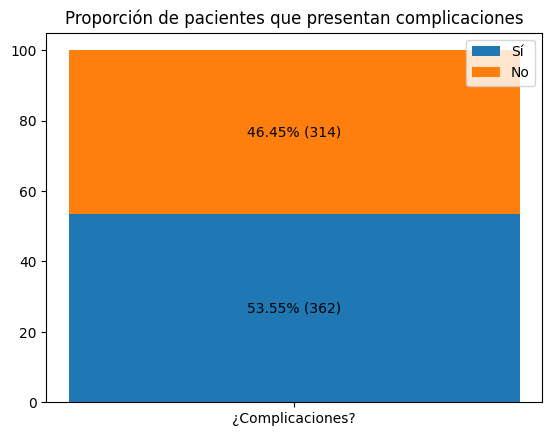

In [130]:
count = df['¿Complicación?'].value_counts(normalize=True)
bottom = 0
for label, value in count.items():
    new_label = "Sí" if label else "No"

    bar = plt.bar('¿Complicaciones?', value*100, bottom=bottom, label = new_label)
    plt.bar_label(
        bar,
        label_type= 'center',
        labels= [
            f'{value:.2%} ({df[df["¿Complicación?"]==label]["¿Complicación?"].value_counts()[label]})'
            ]
    )
    bottom += value*100
plt.legend()
plt.title('Proporción de pacientes que presentan complicaciones')

## Grupo etario

In [131]:
# Calcular variable de grupo etario
bins = [0, 17, 39, 59, 74, 120]
labels = ['<18', '18-39', '40-59', '60-74', '75+']

df['Grupo_Edad'] = pd.cut(
    df['Edad_Al_Tx'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

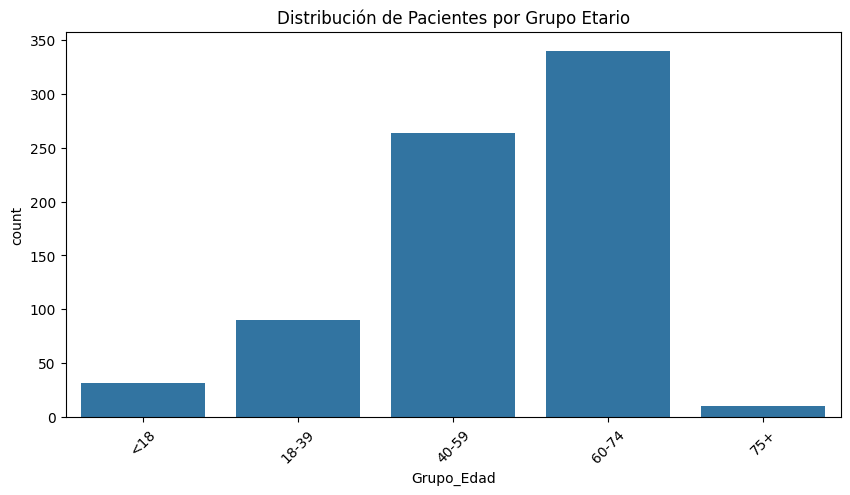

In [132]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Grupo_Edad' )
plt.xticks(rotation=45)
plt.title("Distribución de Pacientes por Grupo Etario")
plt.show()

## Sexo del receptor

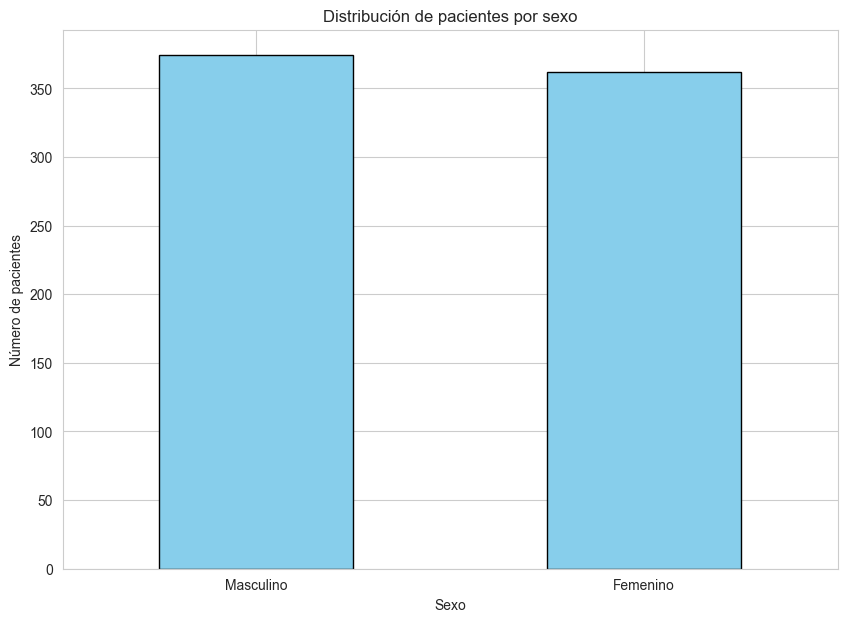

In [219]:
sexo = df['Sexo_Receptor']
mapa_sexo = {1: "Masculino", 2: "Femenino"}
sexo = sexo.replace(mapa_sexo)
sexo.value_counts().plot.bar(color="skyblue", edgecolor="black")
plt.title("Distribución de pacientes por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=0)
plt.show()

## Año del transplante

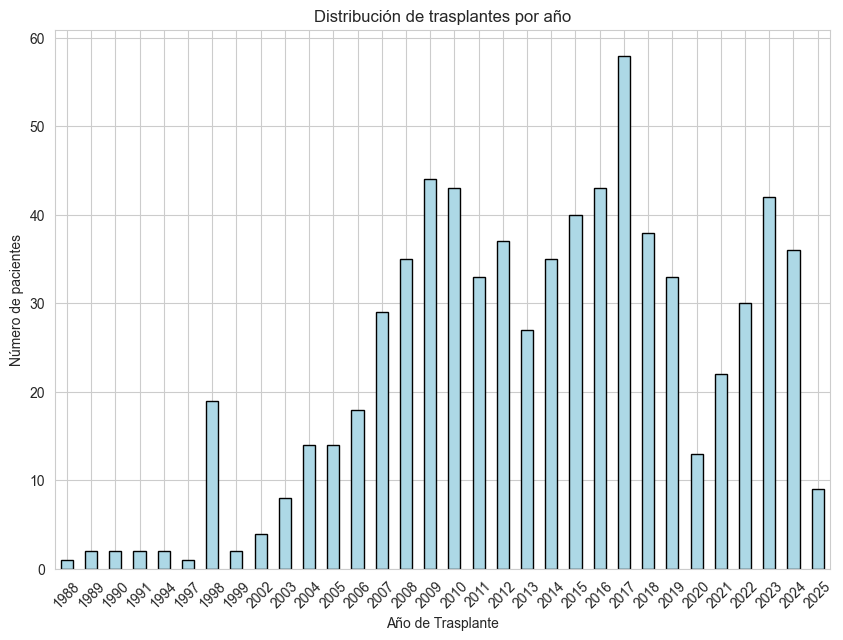

In [220]:
df['Año_Tx'].value_counts().sort_index().plot.bar(
    color="lightblue", edgecolor="black"
)

plt.title("Distribución de trasplantes por año")
plt.xlabel("Año de Trasplante")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=45)  # gira etiquetas si son muchos años
plt.show()

## EPS

In [222]:
mapa_eps = {
    1.0: "COMPENSAR",
    2.0: "SANITAS",
    3.0: "FAMISANAR",
    4.0: "COOMEVA",
    5.0: "COLMEDICA",
    6.0: "SEC SALUD",
    7.0: "PONAL",
    8.0: "COLPATRIA",
    9.0: "EXTRANJERO",
    10.0: "ISS",
    11.0: "CRUZ BLANCA",
    12.0: "ECOPETROL",
    13.0: "UNISALUD",
    14.0: "CLINICA GENERAL DEL NORTE",
    15.0: "COSMITET",
    16.0: "HUMANA VIVIR",
    17.0: "PAGO DIRECTO",
    18.0: "COLSEGUROS",
    19.0: "SURAMERICANA",
    20.0: "NUEVA EPS",
    21.0: "HOSPITAL MILITAR",
    22.0: "SALUD TOTAL REG SUBSIDIADO",
    23.0: "ALIANZASALUD",
    24.0: "GOLDEN GROUP",
    25.0: "CAPITAL SALUD",
    26.0: "EMCOSALUD",
    27.0: "CAPRECOM",
    28.0: "SALUDVIDA",
    29.0: "SEGUROS BOLIVAR",
    30.0: "CAFESALUD",
    31.0: "UNIVERSIDAD DE CORDOBA",
    32.0: "ECOPSOS",
    33.0: "COOSALUD",
    34.0: "MEDIMAS",
    35.0: "ALLIANZ",
    36.0: "MEDPLUS",
    37.0: "FIDUPREVISORA",
}

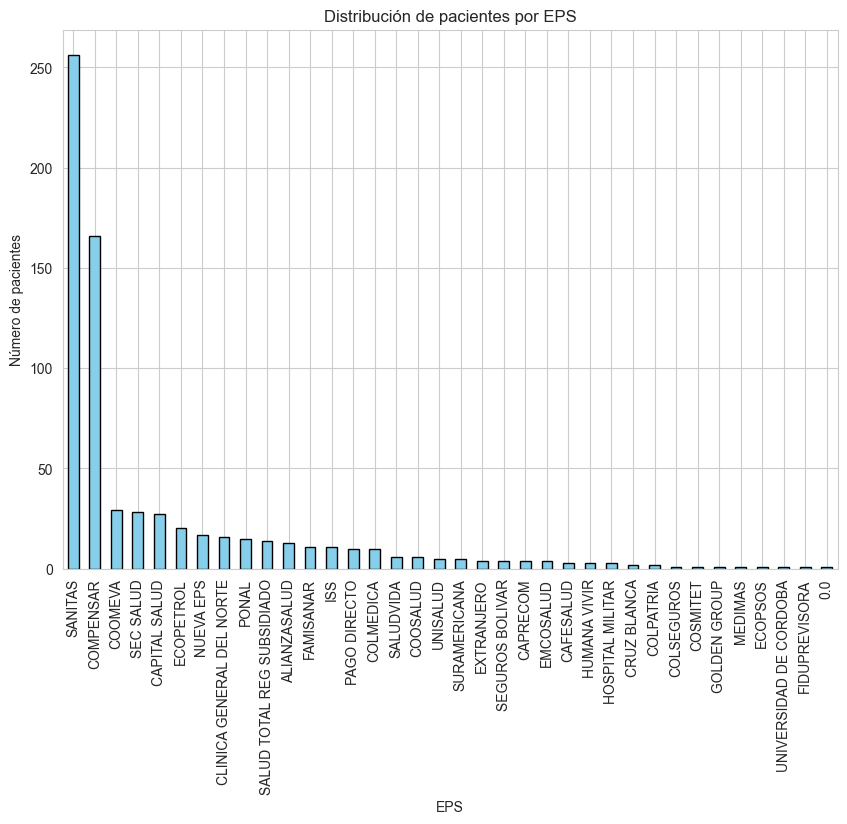

In [224]:
df['EPS'].replace(mapa_eps).value_counts().plot.bar(color="skyblue", edgecolor="black")

plt.title("Distribución de pacientes por EPS")
plt.xlabel("EPS")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=90)  # para leer mejor los nombres
plt.show()

## Años en lista de espera

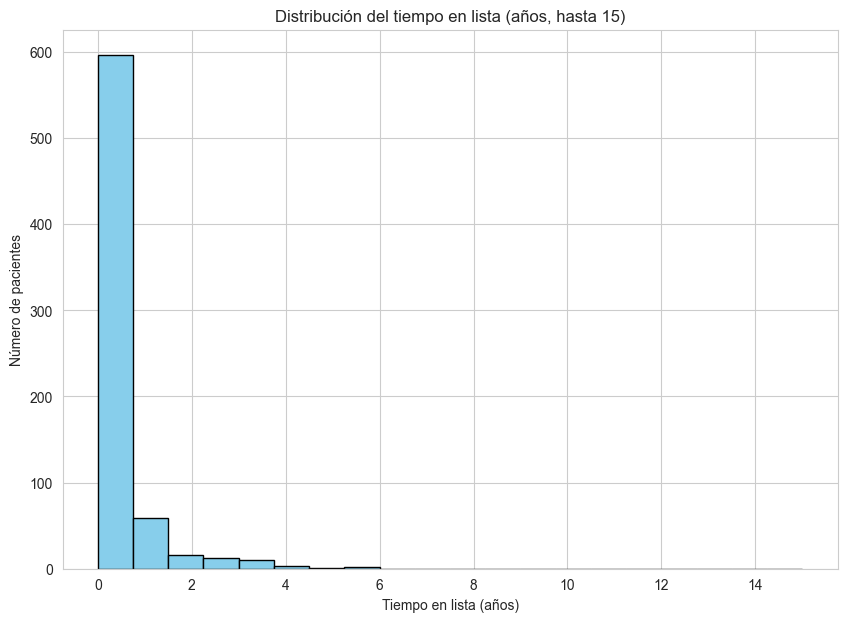

In [226]:
#La variable solo se gráfica hasta 15 años, porque tiene outliers muy grandes
df['Tiempo_En_Lista_Años'].dropna().plot.hist(
    bins=20,
    range=(0, 15),   #límite del eje
    color="skyblue",
    edgecolor="black"
)
plt.title("Distribución del tiempo en lista (años, hasta 15)")
plt.xlabel("Tiempo en lista (años)")
plt.ylabel("Número de pacientes")
plt.show()

## Causas del transplante

In [227]:
mapa_causas = {
    1: "HCV",
    2: "HBV",
    3: "NASH",
    4: "ALCOHÓLICA",
    5: "HEMOCHROMATOSIS",
    6: "DEF ALFA 1 ANTITRIPSINA",
    7: "WILSON",
    8: "HEPATITIS AUTOINMUNE",
    9: "COLANGITIS BILIAR PRIMARIA",
    10: "COLANGITIS ESCLEROSANTE PRIMARIA",
    11: "OVERLAP (CBP + AIH)",
    12: "CRIPTOGENICA",
    13: "FIBROSIS HEPÁTICA CONGENITA",
    14: "ATRESIA VÍAS BILIARES",
    15: "COLANGIOCARCINOMA",
    16: "TUMOR MIOFIBROBLÁSTICO",
    17: "HEPATOBLASTOMA",
    18: "ADENOMA GIGANTE",
    19: "HIPERPLASIA NODULAR PROLIFERATIVA",
    20: "ENFERMEDAD POLIQUISTICA",
    21: "BUDDCHIARI",
    22: "CIRROSIS BILIAR SECUNDARIA",
    23: "FHF",
    24: "HELLP",
    25: "CIRROSIS DEL INJERTO",
    26: "COLANGIOPATÍA ISQUÉMICA",
    27: "DEFECTO EN LA SÍNTESIS/SECRECIÓN DE ÁCIDOS",
    28: "QUISTE HÍDATIDO"
}

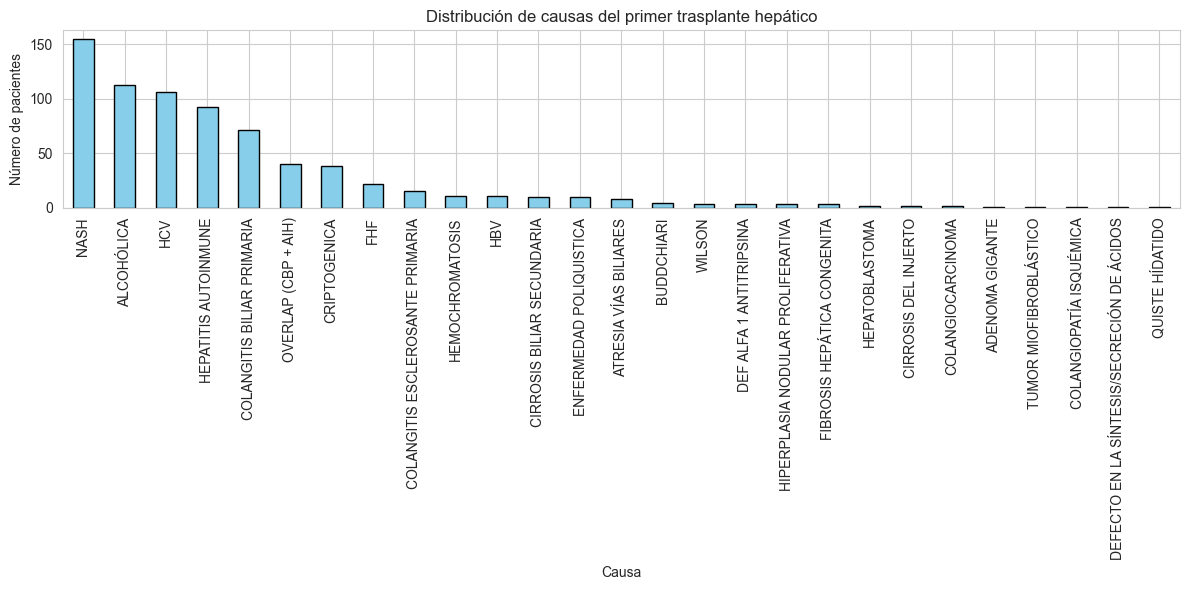

In [228]:
df['Causa1_nom'] = df['Causa_1_Tx_Hepático_'].replace(mapa_causas)
(df['Causa1_nom']
 .value_counts()
 .plot.bar(color="skyblue", edgecolor="black", figsize=(12,6)))

plt.title("Distribución de causas del primer trasplante hepático")
plt.xlabel("Causa")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Heptocarcinoma

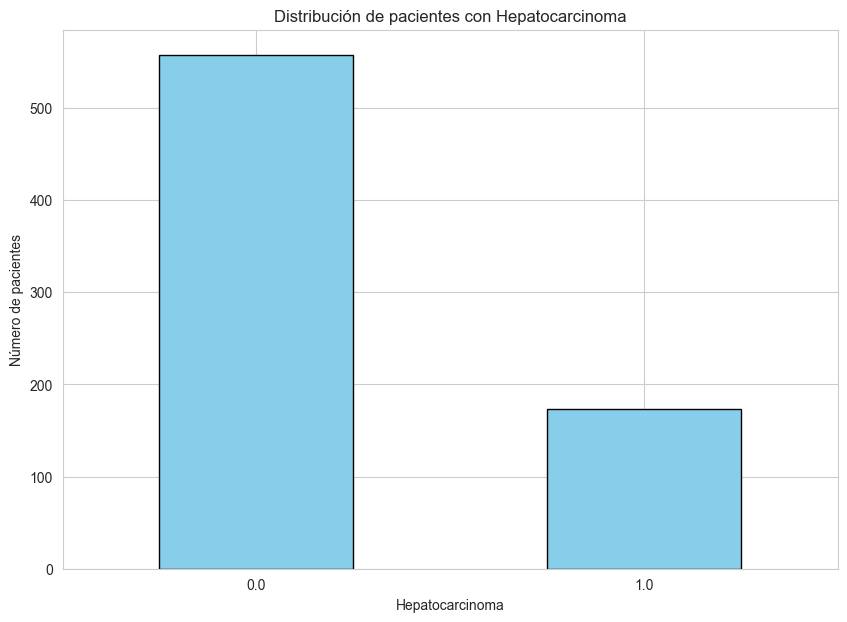

In [229]:
df['Hepatocarcinoma'].value_counts().plot.bar(
    color="skyblue", edgecolor="black"
)
plt.title("Distribución de pacientes con Hepatocarcinoma")
plt.xlabel("Hepatocarcinoma")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=0)  # etiquetas horizontales
plt.show()

## Sobrevida 30 días pos operatorio

Text(0.5, 1.0, 'Proporción de pacientes que sobreviven 30 días')

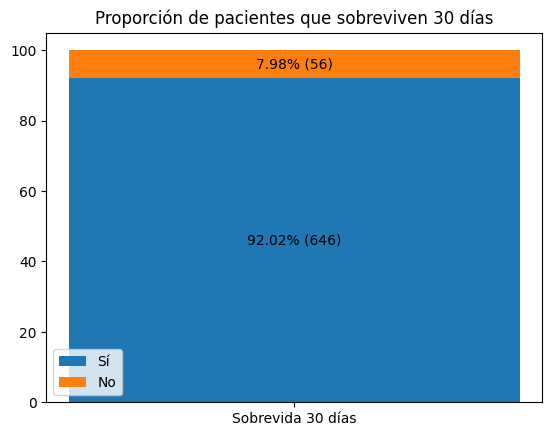

In [ ]:
count = df['Sobrevida_PeriQx_30_días_POP'].value_counts(normalize=True)
bottom = 0
for label, value in count.items():
    new_label = "Sí" if label else "No"

    bar = plt.bar('Sobrevida 30 días', value*100, bottom=bottom, label = new_label)
    plt.bar_label(
        bar,
        label_type= 'center',
        labels= [
            f'{value:.2%} ({df[df["Sobrevida_PeriQx_30_días_POP"]==label]["Sobrevida_PeriQx_30_días_POP"].value_counts()[label]})'
            ]
    )
    bottom += value*100
plt.legend()
plt.title('Proporción de pacientes que sobreviven 30 días')

## Ecocardiograma posoperatorio PASP (pulmonary artery systolic pressure)

In [134]:
df[["Ecocardiograma_POP_PASP","¿Complicación?"]].loc[(df["Ecocardiograma_POP_PASP"]!= 0) & df["Ecocardiograma_POP_PASP"].notna()]

,Ecocardiograma_POP_PASP,¿Complicación?
#_Paciente,,
55,50.0,1.0
130,33.0,1.0
156,27.0,0.0
546,31.0,0.0
620,24.0,1.0
633,38.0,1.0
637,38.0,1.0
638,40.0,1.0
639,21.0,1.0


In [135]:
df["Ecocardiograma_POP_PASP"].loc[df["Ecocardiograma_POP_PASP"]!= 0].describe()

count    10.000000
mean     37.400000
std      14.833895
min      21.000000
25%      28.000000
50%      35.500000
75%      39.500000
max      72.000000
Name: Ecocardiograma_POP_PASP, dtype: float64

Se registran solo 10 pacientes con datos en ecocardiograma, de ello se puede evidenciar que la media es de 37 unidades, lo cual segun su definición es una presión normal. Sin embargo el dato también muestra pacientes con presiones por encima de los 39.5, lo cual puede entenderse como una muestra de hipertensión pulmonar

## Inmunosupresión con anticuerpos

El tratamiento inmunosupresior puede usarse tanto antes de la cirugia como después. Puede usarse como tratamiento de respuesta al rechazo o como terapia preventiva al mismo.

In [136]:
df['Inmunosupresión_con_Anticuerpos']

#_Paciente
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
731     NO
733     NO
734    NaN
735    NaN
736    NaN
Name: Inmunosupresión_con_Anticuerpos, Length: 736, dtype: object

In [137]:
df["Inmunosupresión_con_Anticuerpos"].value_counts()

Inmunosupresión_con_Anticuerpos
NO    172
SI     56
Name: count, dtype: int64

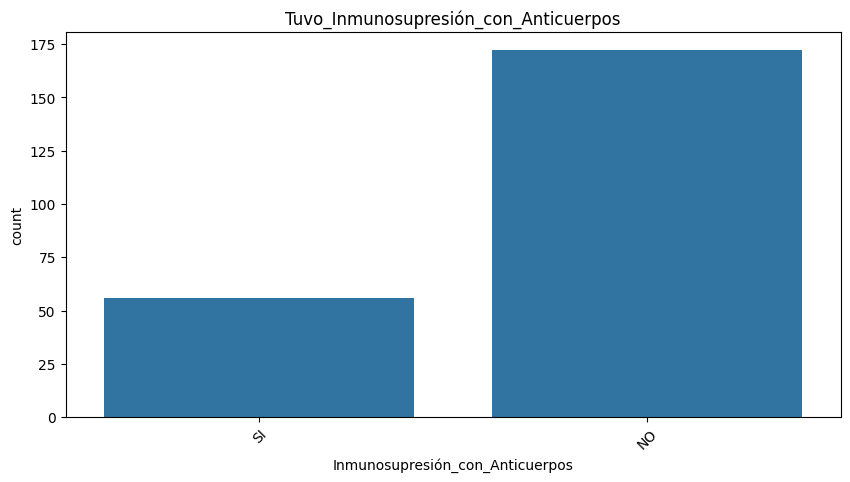

In [138]:
# tipo de reserva según lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Inmunosupresión_con_Anticuerpos')
plt.xticks(rotation=45)
plt.title("Tuvo_Inmunosupresión_con_Anticuerpos")
plt.show()

En la base de datos analizada, 56 pacientes recibieron inmunosupresión con anticuerpos, mientras que 172 no la recibieron

## α-Fetoproteína al momento del diagnóstico
La αFP es un macador tumoral

Se analizará esta variable de acuerdo a unos umbrales

In [139]:
bins = [-np.inf, 10, 100, 200, 400, 1000, np.inf]
labels = [
    'Normal (<10)',
    'Elevación leve (10–100)',
    'Indeterminado (100–200)',  # puedes renombrar o eliminar si prefieres
    'Alta sospecha (>200)',
    'Diagnóstico probable (>400)',
    'Alta carga tumoral (>1000)'
]

# Crear la variable categórica
df['αFP_categoria'] = pd.cut(
    df['αFP_Al_Dx'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False  # el límite inferior es inclusivo
)

df['αFP_categoria'].value_counts()

αFP_categoria
Normal (<10)                   165
Elevación leve (10–100)         53
Alta sospecha (>200)            11
Diagnóstico probable (>400)     10
Indeterminado (100–200)          4
Alta carga tumoral (>1000)       2
Name: count, dtype: int64

In [140]:
df[['αFP_Al_Dx', 'αFP_categoria','¿Complicación?']].loc[
    df['αFP_categoria'].notna()
].sort_values('αFP_Al_Dx', ascending=False)

,αFP_Al_Dx,αFP_categoria,¿Complicación?
#_Paciente,,,
568,1924.00,Alta carga tumoral (>1000),0.0
138,1206.00,Alta carga tumoral (>1000),1.0
337,853.90,Diagnóstico probable (>400),1.0
564,721.00,Diagnóstico probable (>400),0.0
72,638.74,Diagnóstico probable (>400),0.0
...,...,...,...
383,1.35,Normal (<10),0.0
291,1.32,Normal (<10),0.0
368,1.24,Normal (<10),0.0


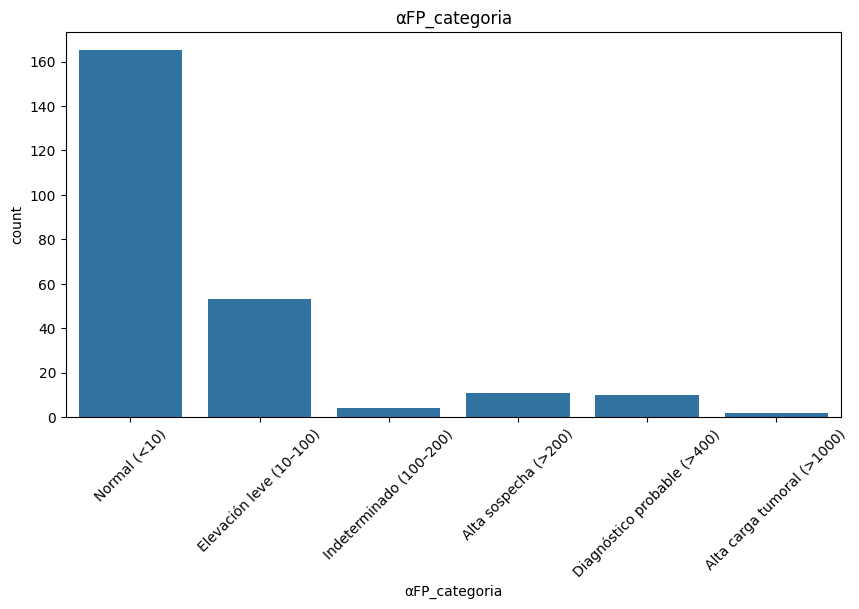

In [141]:
# tipo de reserva según lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='αFP_categoria')
plt.xticks(rotation=45)
plt.title("αFP_categoria")
plt.show()

En su mayoria los pacientestienen presencia de Alfa-Fetoprotenia en rangos considerados normales. Sin embargo se logran identificar pacientes con altas suspechas, diagnosticos probables y también con alta carga tumoral

In [142]:
df["αFP_Al_Dx"].describe()

count     245.000000
mean       59.458449
std       188.843439
min         0.900000
25%         3.400000
50%         6.000000
75%        15.370000
max      1924.000000
Name: αFP_Al_Dx, dtype: float64

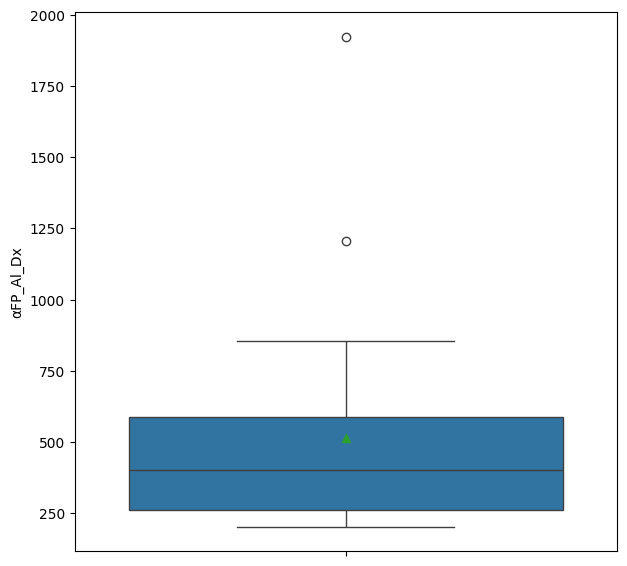

In [143]:
plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df.loc[(df['αFP_Al_Dx']> 200)],
    y='αFP_Al_Dx',
    showmeans=True
)
plt.show()

El 75% de los pacientes tienen valores inferiores a 15.37 ng/mL, mientras que el valor máximo (1924 ng/mL) representa un caso extremo con diagnóstico confirmado de Hepatocarcinoma (HCC).

Al tomar los pacientes dentro de los grupos relevantes, que son aquellos con valores de la proteina superiores a 200, podemos evidenciar que la media está al rededor de las 500 unidades, lo cual ya es indicativo de presencia de cáncer. También se evidencian los pacientes atípicos con un diagnóstico de hepatocarcinoma comprobado con valores superiores a 1000 unidades. 

## Grado Hepato carcinoma (HCC)
Clasifica el hepatocarcinoma según el grado de diferenciación celular del tumor, siendo un indicador histológico de agresividad. 

   1: "Bien diferenciado" <br/>
    2: "Moderadamente diferenciado", <br/>
    3: "Poco diferenciado", <br/>
    4: "Indiferenciado" 

In [144]:
df["Grado_HCC"].value_counts()

Grado_HCC
2.0    49
3.0    40
4.0     6
1.0     4
Name: count, dtype: int64

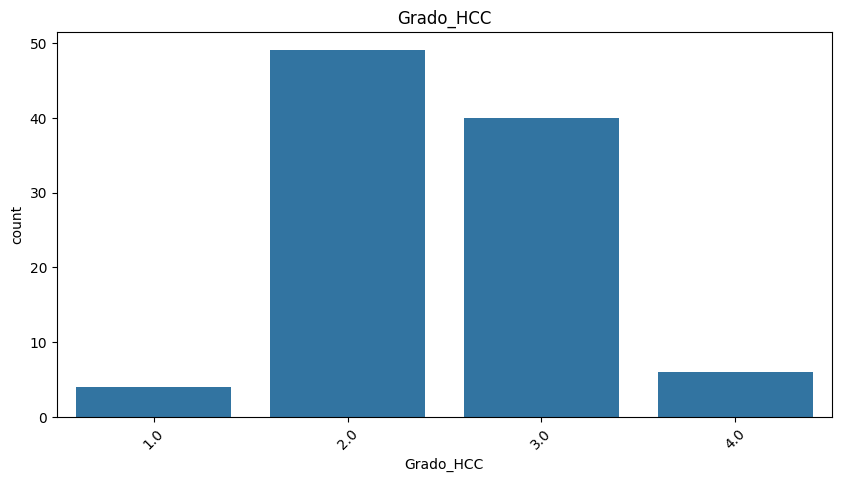

In [145]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Grado_HCC')
plt.xticks(rotation=45)
plt.title("Grado_HCC")
plt.show()

De los 99 pacientes con diagnóstico confirmado de hepatocarcinoma, la mayoría presenta un grado 2, lo cual indica una diferenciación celular moderada, es decir, las células cancerosas aún conservan ciertas características de las células hepáticas normales.

Sin embargo, un grupo importante de pacientes (grados 3 y 4) exhibe poca o nula diferenciación, lo que se asocia con tumores más agresivos y con peor pronóstico clínico.

## Estadio

In [146]:
df["Estadio"].value_counts()

Estadio
ESTADIO 1    53
ESTADIO 2    37
ESTADIO 3     8
ESTADIO 4     1
Name: count, dtype: int64

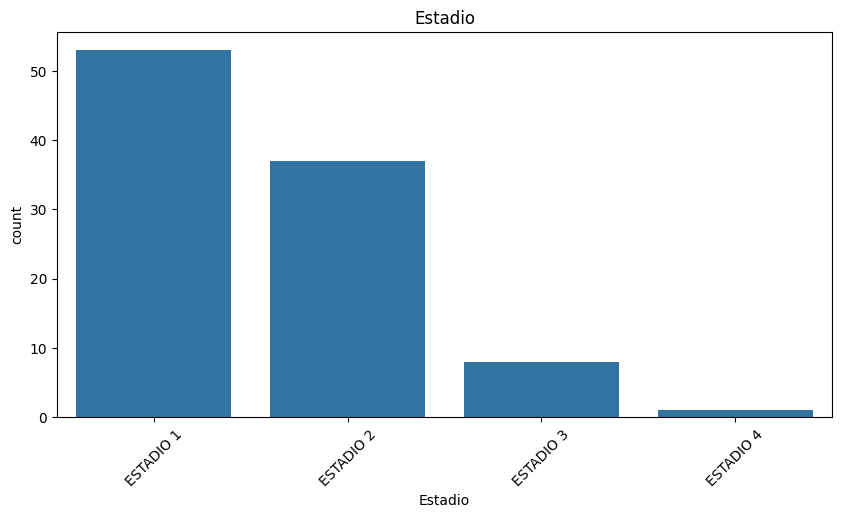

In [147]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Estadio', order=['ESTADIO 1','ESTADIO 2','ESTADIO 3','ESTADIO 4'])
plt.xticks(rotation=45)
plt.title("Estadio")
plt.show()

1: Tumor pequeño y localizado, sin ganglios afectados ni metástasis. <br/>
2: Tumor un poco mas grande o con invasion mínima, pero aun localizado. <br/>
3: Tumor grande o con invasión vascular, sin ganglios ni metástasis. <br/>
4: Tumor que invade estructuras adyacentes. <br/>

Los pacientes que el diagnostico del Estadio, en su mayoria presentan un tumor pequeño y  localizado, lo que puede sugiere una detección temprana. Mientras que los pacientes que presentan tumores grandes o invasivos se presentan como un grupo menor en la muestra.

## Subconjunto de variables booleanas
- Soporte_Vasopresor_PeriTx
- Levosimendan_PeriTx
- Noradrenalina_PeriTx
- Adrenalina_PeriTx
- Vasopresina_PeriTx
- Dopamina_PeriTx
- Amiodarona_PeriTx
- ¿Complicación?
- Rechazo_Agudo
- Rechazo_Crónico
- Infección_POP
- Stent
- Requirió_Reconstrucción_Biliar
- Profilaxis_Antitrombótica
- Fast_Track

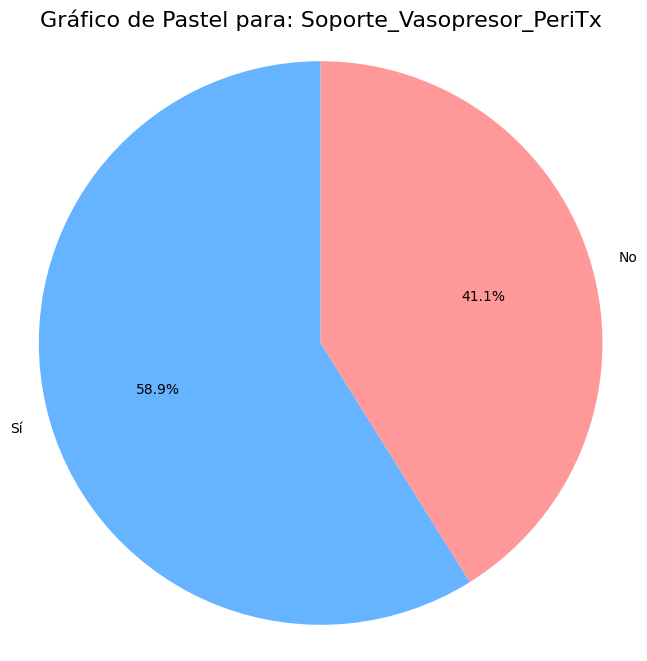

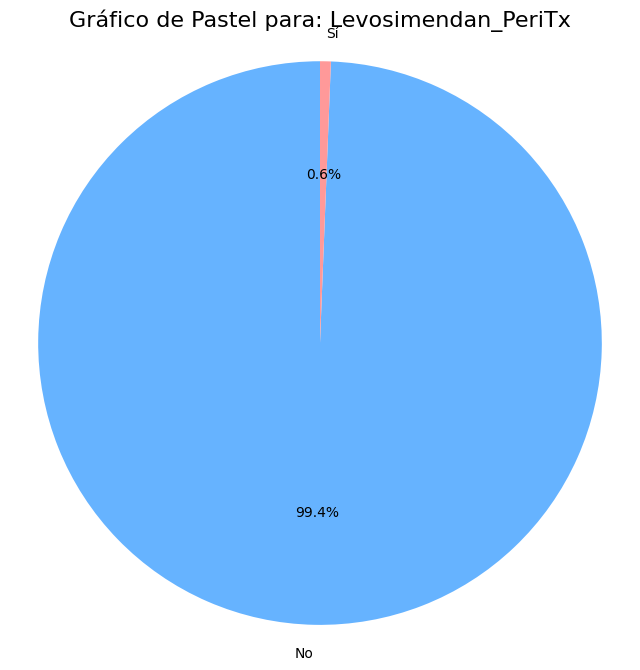

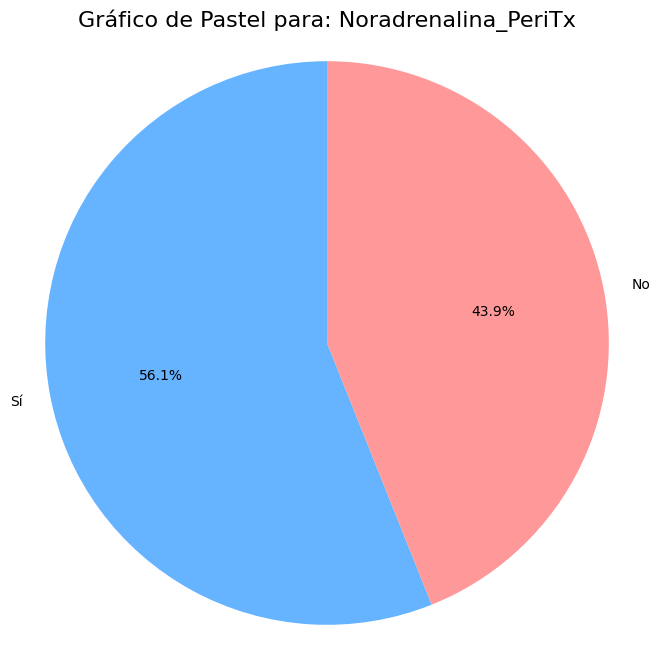

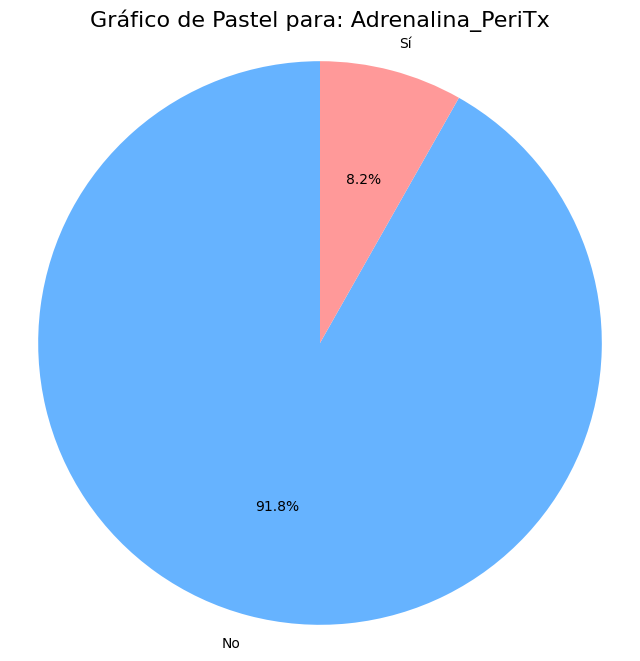

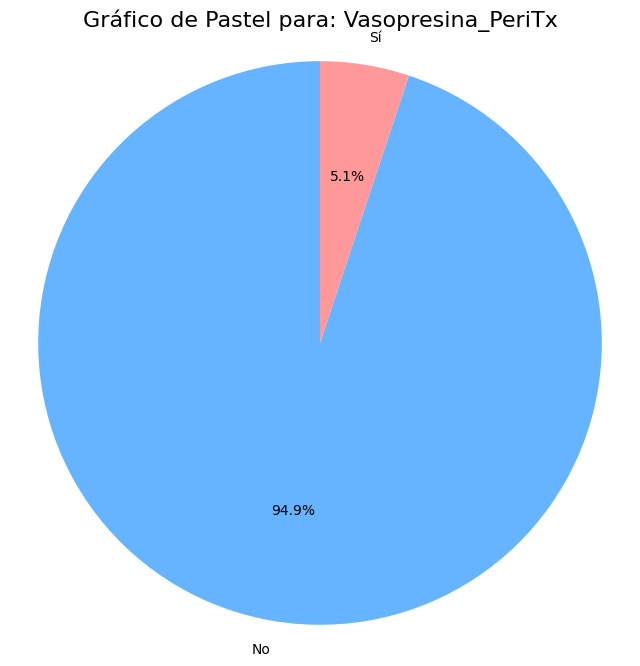

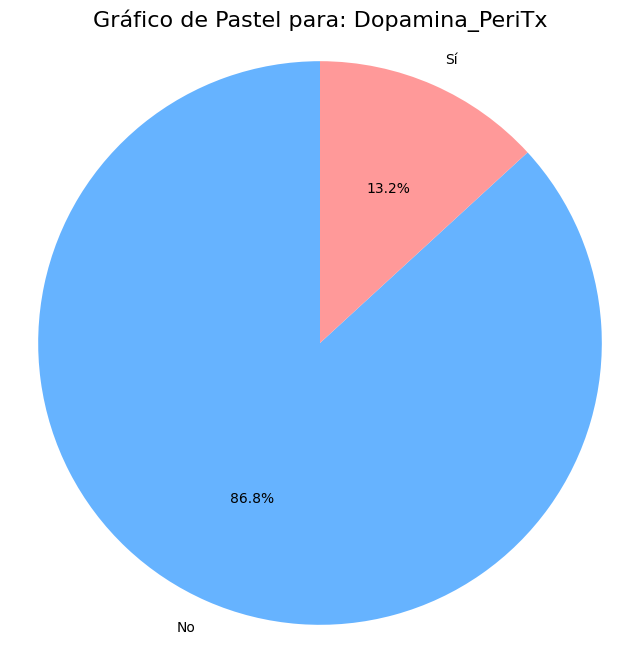

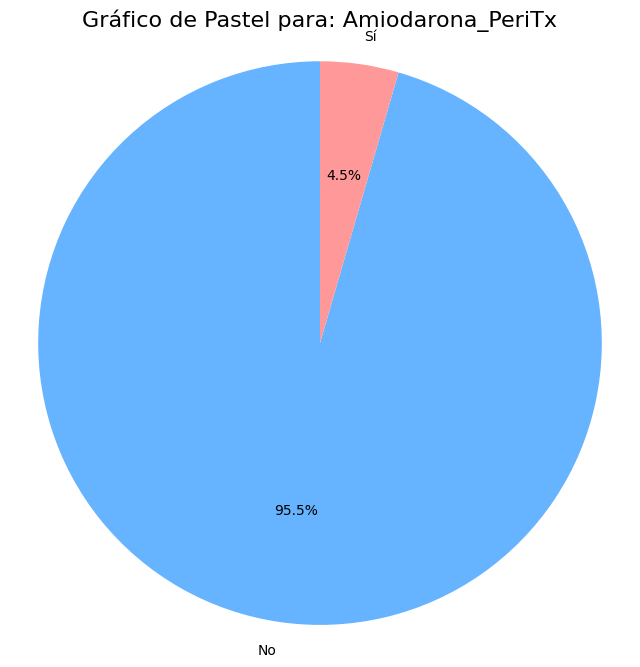

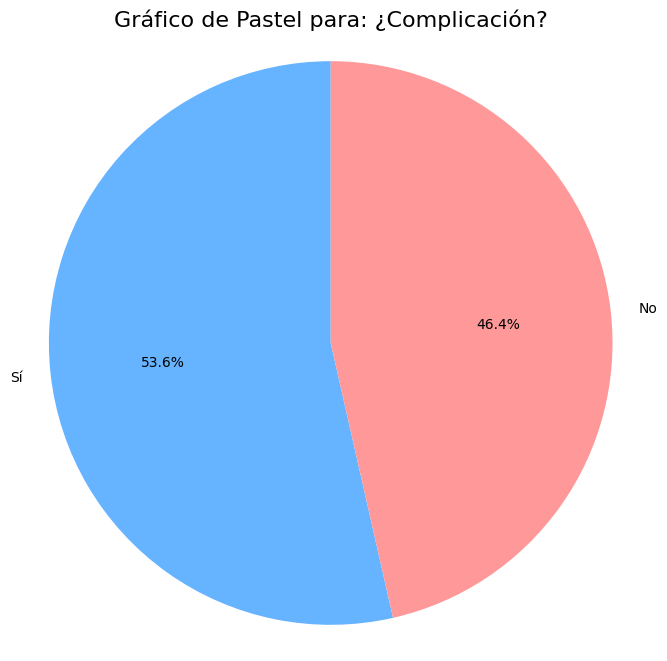

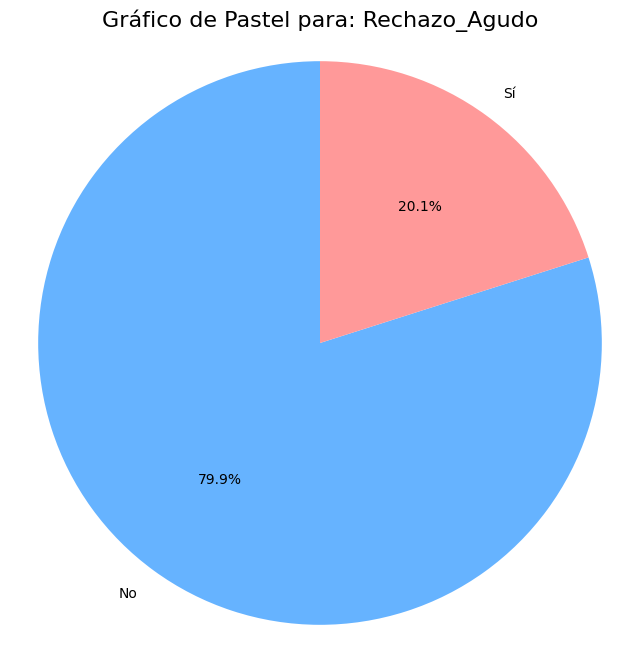

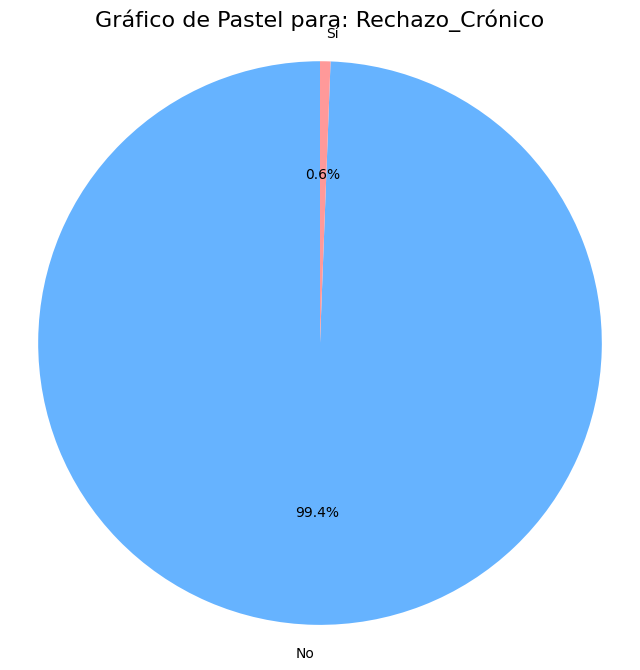

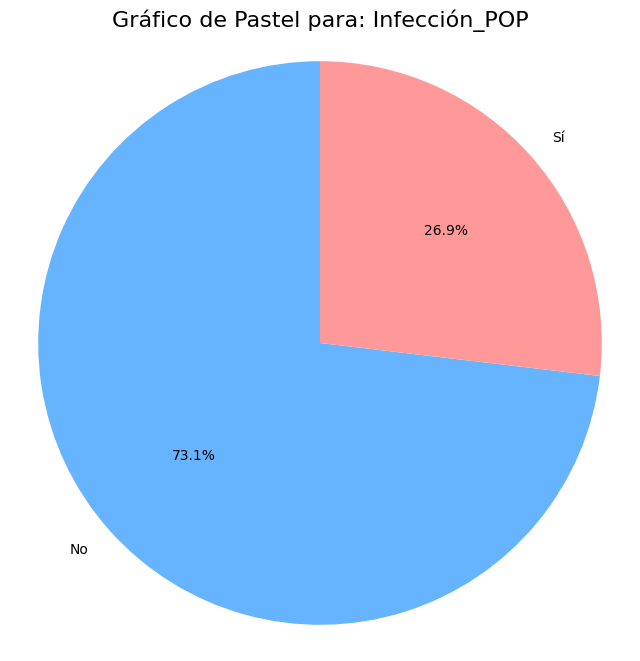

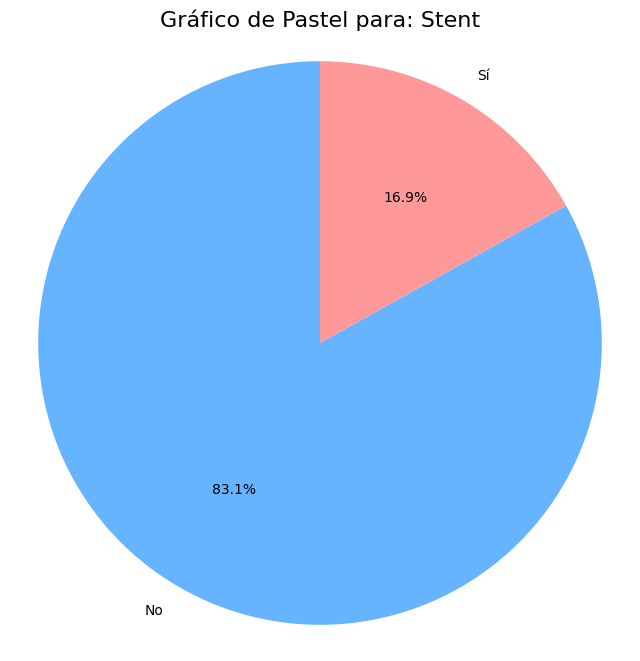

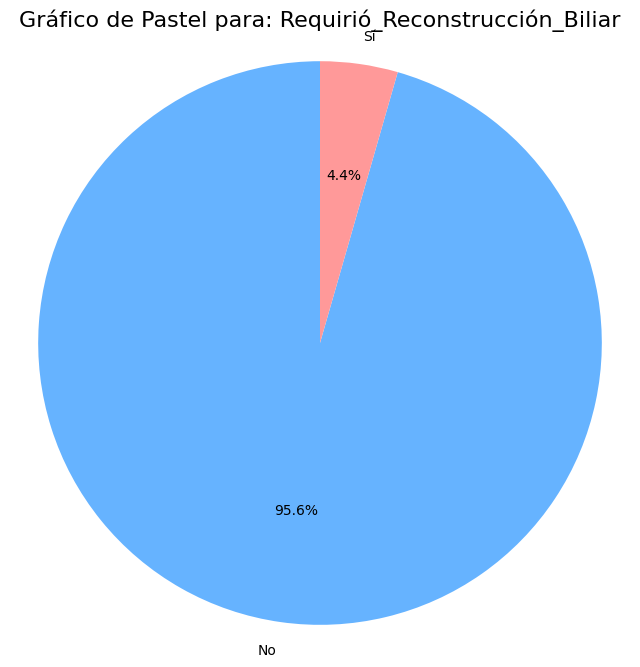

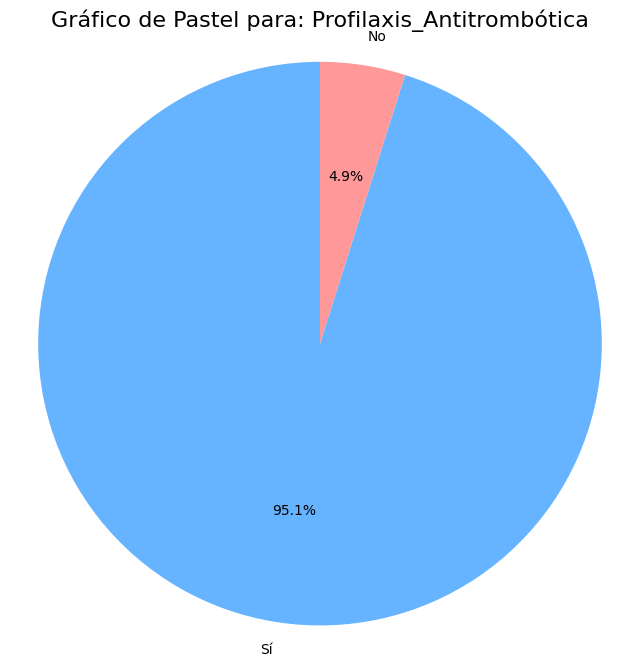

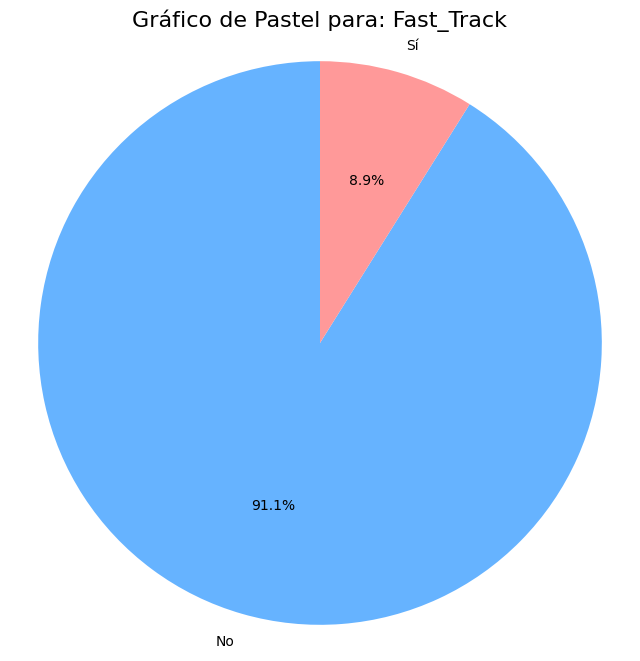

In [204]:
variables_categoricas = [
    'Soporte_Vasopresor_PeriTx', 'Levosimendan_PeriTx', 'Noradrenalina_PeriTx',
    'Adrenalina_PeriTx', 'Vasopresina_PeriTx', 'Dopamina_PeriTx',
    'Amiodarona_PeriTx', '¿Complicación?', 'Rechazo_Agudo', 'Rechazo_Crónico',
    'Infección_POP', 'Stent', 'Requirió_Reconstrucción_Biliar',
    'Profilaxis_Antitrombótica', 'Fast_Track'
]

etiquetas_map = {0: 'No', 1: 'Sí'}

for variable in variables_categoricas:

    conteo = df[variable].value_counts(dropna=True)

    if conteo.empty:
        print(f"La columna '{variable}' está vacía o solo contiene valores nulos. Omitiendo gráfico.")
        continue

    etiquetas_grafico = [etiquetas_map.get(val, str(val)) for val in conteo.index]


    plt.figure(figsize=(8, 8))
    plt.pie(conteo,
            labels=etiquetas_grafico,
            autopct='%1.1f%%',
            startangle=90,
            colors=['#66b3ff', '#ff9999'],
            )

    plt.title(f'Gráfico de Pastel para: {variable}', fontsize=16)
    plt.axis('equal')
    plt.show()


En las variables graficadas se observa un desbalanceo entre las clases

## Subconjunto de variables cuantitativas
- Tiempo_CVC
- Días_de_Profilaxis_Antitrombótica
- Días_En_UCI
- Días_En_Hospitalización_Piso
- Días_Totales_Intrahospitalarios

--- Generando Histogramas para Variables Cuantitativas ---


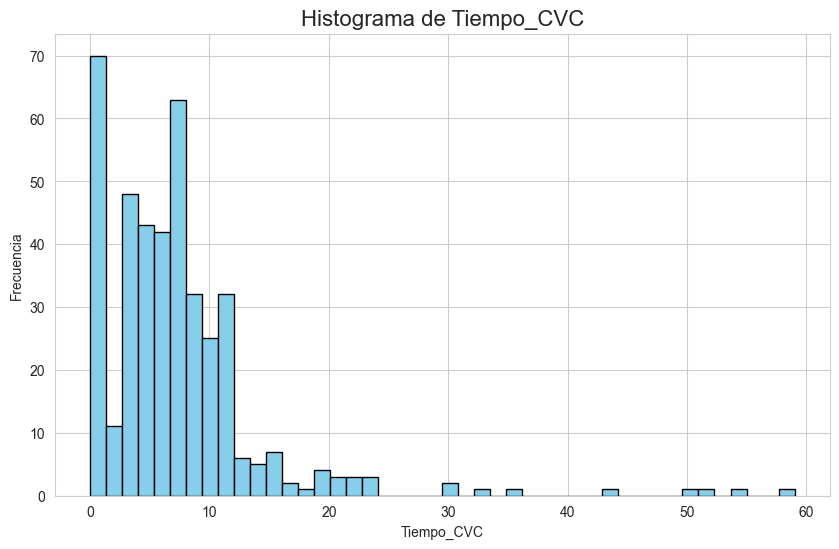

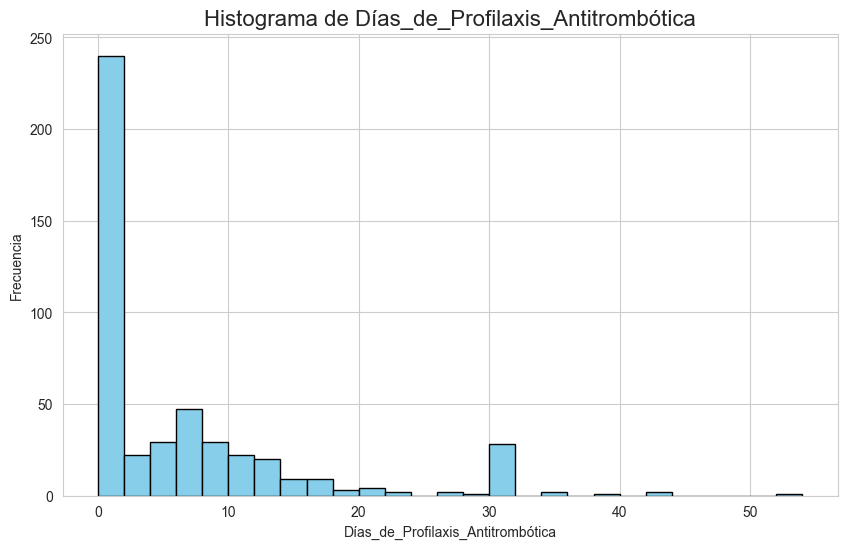

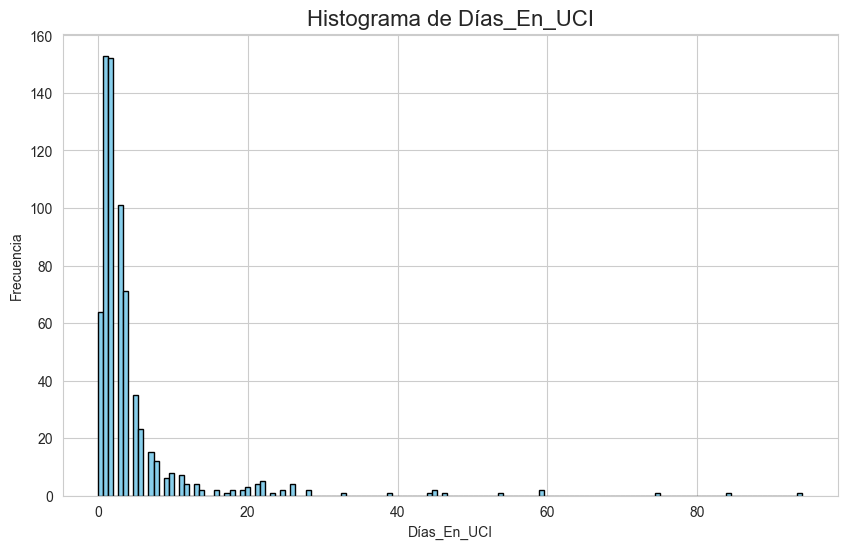

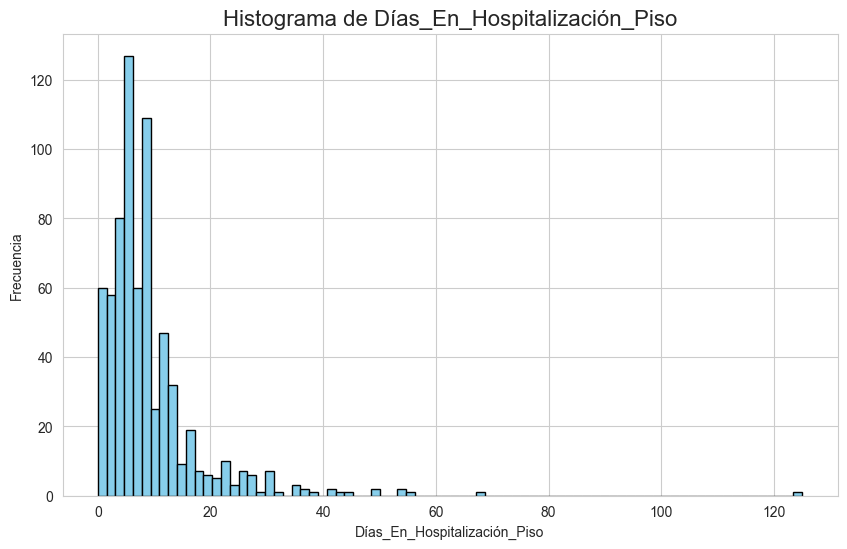

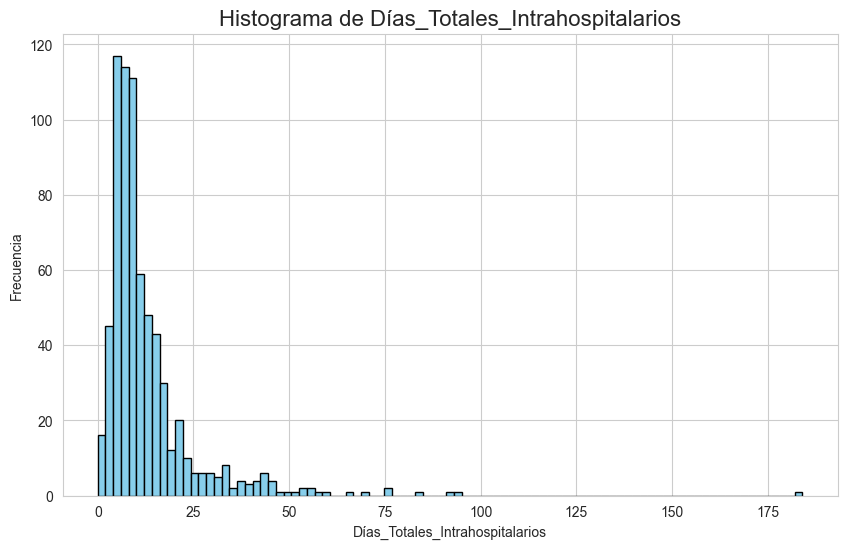

In [206]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

variables_cuantitativas = [
    'Tiempo_CVC', 'Días_de_Profilaxis_Antitrombótica',
    'Días_En_UCI', 'Días_En_Hospitalización_Piso', 'Días_Totales_Intrahospitalarios'
]

print("--- Generando Histogramas para Variables Cuantitativas ---")
for variable in variables_cuantitativas:
    if variable not in df.columns:
        print(f"Advertencia: La columna '{variable}' no fue encontrada. Omitiendo.")
        continue

    datos = df[variable].dropna()
    if datos.empty:
        print(f"La columna '{variable}' está vacía o solo contiene valores nulos. Omitiendo gráfico.")
        continue

    plt.figure()
    plt.hist(datos, bins='auto', color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {variable}', fontsize=16)
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()


* En la variable "Tiempo_CVC", que corresponde a los "Días con catéter central", se observó una mayor cantidad de casos alrededor de los 5 días.
* En la variable "Días de Profilaxis Antitrombótica", se observa que la mayor cantidad de casos corresponde a pacientes que la usaron durante aproximadamente un día.
* En la variable "Días en UCI", se observa una mayor cantidad de casos entre los días 1 y 10, aproximadamente.
* En la variable "Días en Hospitalización de Piso", se observa una tendencia alta entre los días 1 y 16, aproximadamente.
* En la variable "Días Totales Intrahospitalarios", se observa un pico entre los 9 y 11 días, aproximadamente.

## Subconjunto de variables ordinales
- tipo_De_Complicación_1
- Severidad_Rechazo_Agudo
- Tipo_Infección_1
- Germen_1
- #_De_Complicaciones


--- Generando Gráficos de Barras para Variables Codificadas ---


C:\Users\jmriv\AppData\Local\Temp\ipykernel_5776\265677471.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas_descriptivas, y=conteo.values, palette='viridis')


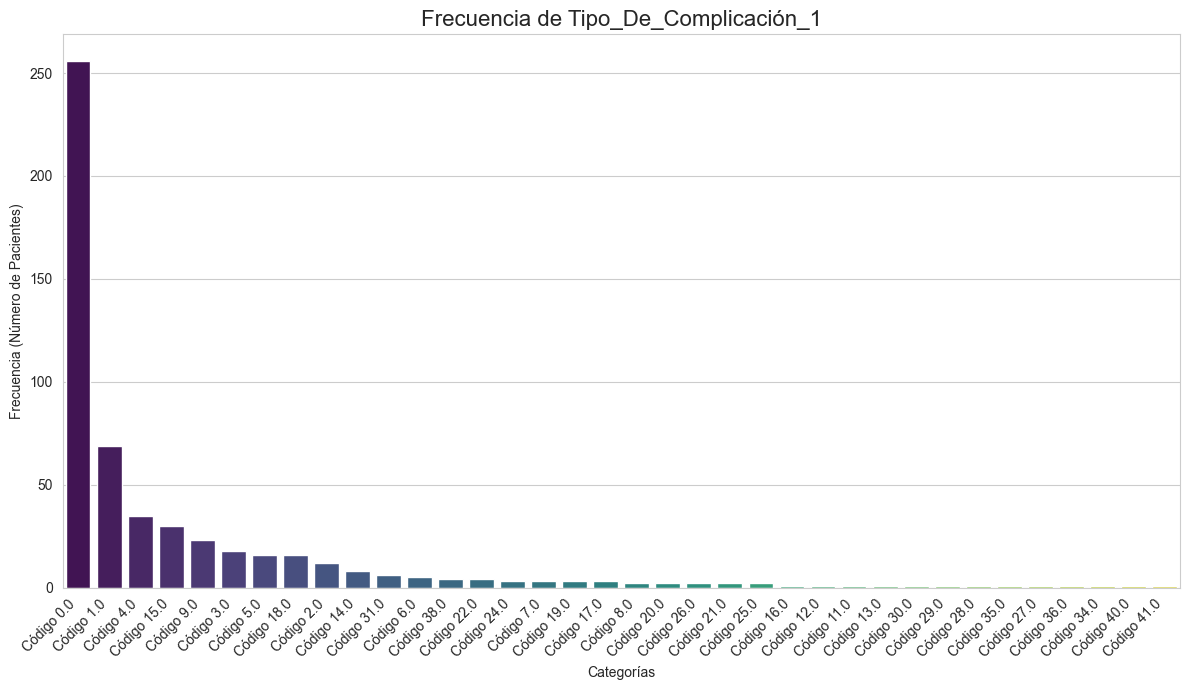

C:\Users\jmriv\AppData\Local\Temp\ipykernel_5776\265677471.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas_descriptivas, y=conteo.values, palette='viridis')


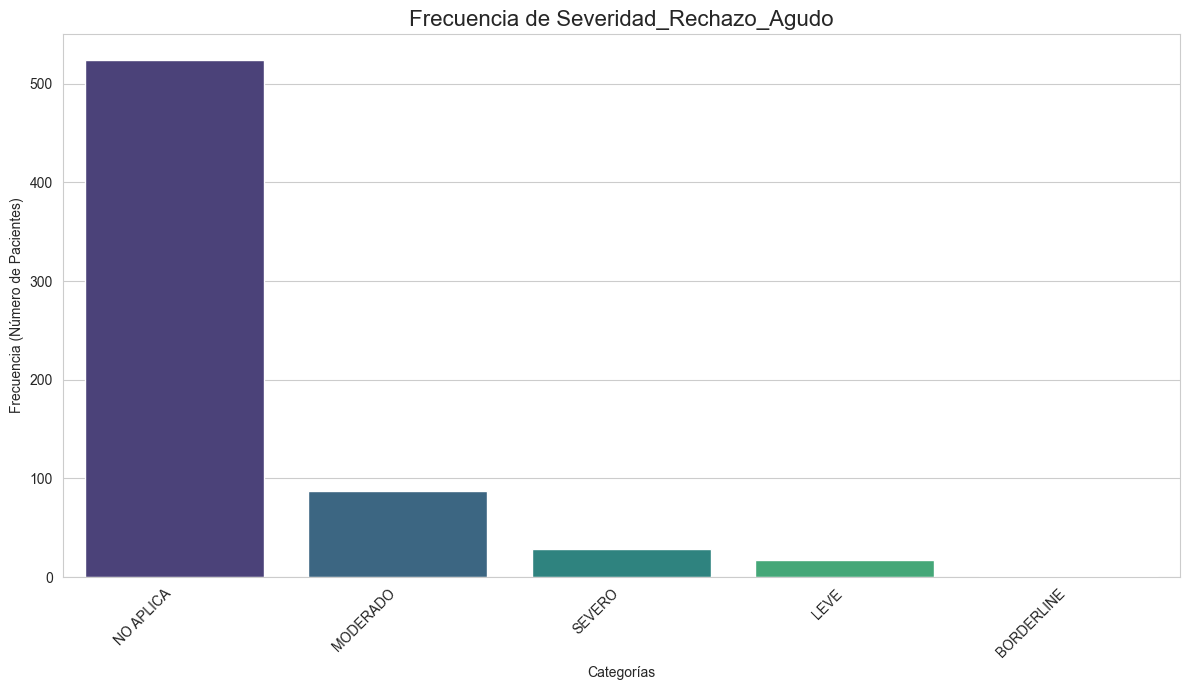

C:\Users\jmriv\AppData\Local\Temp\ipykernel_5776\265677471.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas_descriptivas, y=conteo.values, palette='viridis')


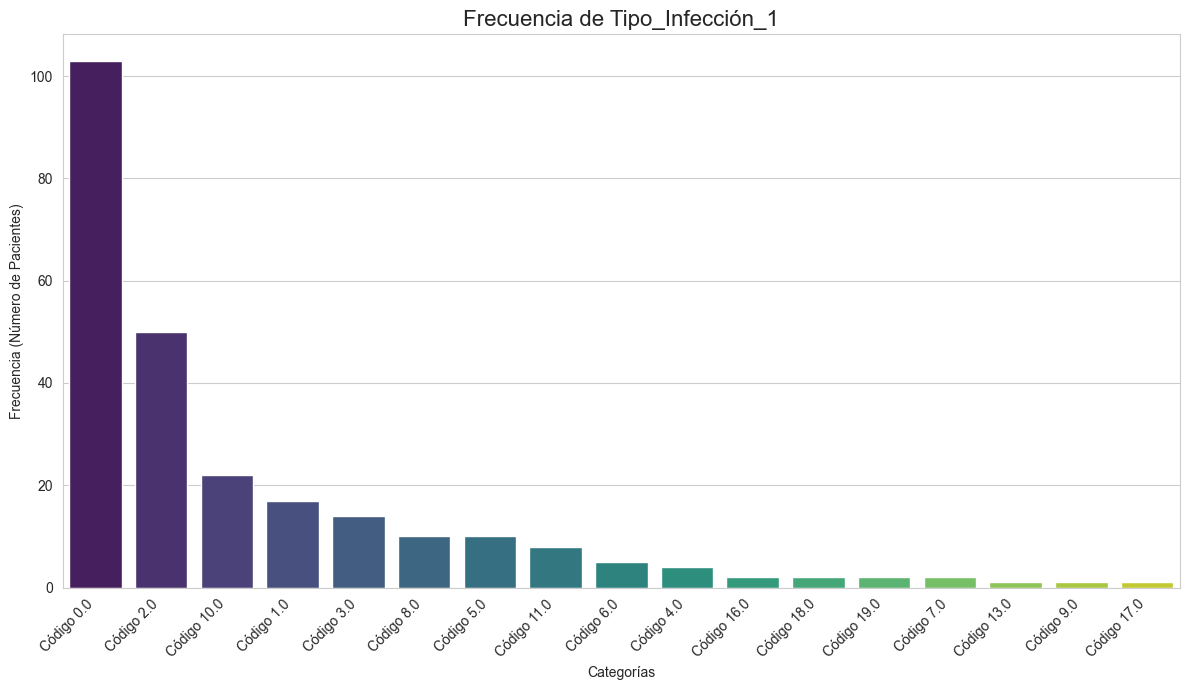

C:\Users\jmriv\AppData\Local\Temp\ipykernel_5776\265677471.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas_descriptivas, y=conteo.values, palette='viridis')


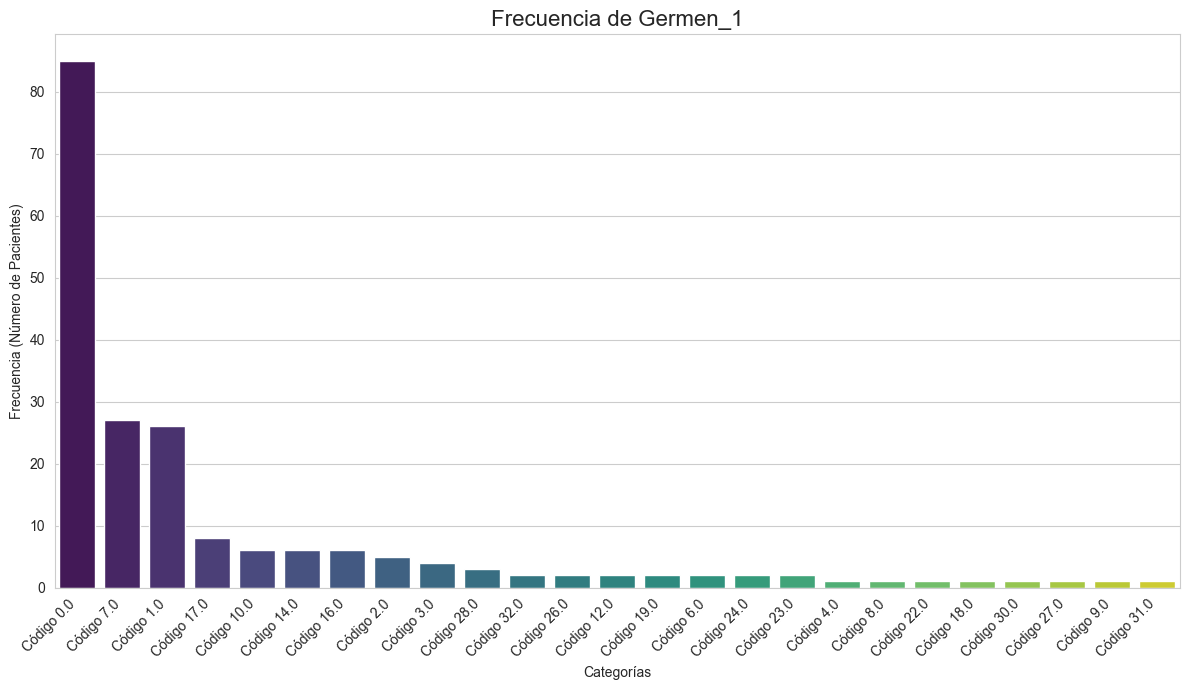

C:\Users\jmriv\AppData\Local\Temp\ipykernel_5776\265677471.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas_descriptivas, y=conteo.values, palette='viridis')


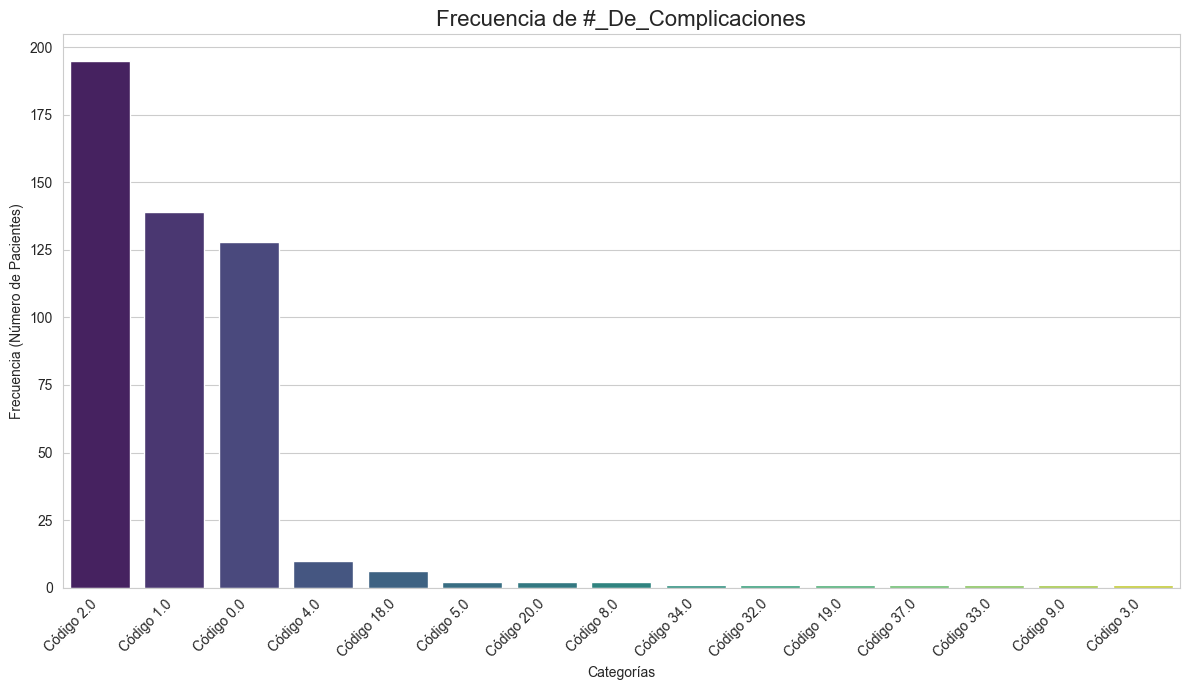

In [207]:
variables_ordinales = [
    'Tipo_De_Complicación_1', 'Severidad_Rechazo_Agudo', 'Tipo_Infección_1', 'Germen_1', '#_De_Complicaciones'
]

mapeo_etiquetas = {
    'Severidad_Rechazo_Agudo': {
        0: 'NO APLICA',
        1: 'LEVE',
        2: 'MODERADO',
        3: 'SEVERO',
        4: 'BORDERLINE'
    },
    'Tipo_De_Complicación_1': {

    },
    'Tipo_Infección_1': {

    },
    'Germen_1': {

    },
    '#_De_Complicaciones': {

    }
}

print("\n--- Generando Gráficos de Barras para Variables Codificadas ---")
for variable in variables_ordinales:
    if variable not in df.columns:
        print(f"Advertencia: La columna '{variable}' no fue encontrada. Omitiendo.")
        continue

    conteo = df[variable].value_counts(dropna=True)
    if conteo.empty:
        print(f"La columna '{variable}' está vacía o solo contiene valores nulos. Omitiendo gráfico.")
        continue

    mapa_actual = mapeo_etiquetas.get(variable, {})


    etiquetas_descriptivas = [mapa_actual.get(val, f'Código {val}') for val in conteo.index]

    plt.figure(figsize=(12, 7))
    sns.barplot(x=etiquetas_descriptivas, y=conteo.values, palette='viridis')
    plt.title(f'Frecuencia de {variable}', fontsize=16)
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia (Número de Pacientes)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


En el caso de la variable "#_De_Complicaciones", se observó que la categoría con la mayor cantidad de casos es la de 2 complicaciones.

## Subconjunto de variables de fechas
- Fecha_Egreso_UCI
- Fecha_Egreso_Hospitalario


--- Generando Histogramas para Variables de Fecha ---


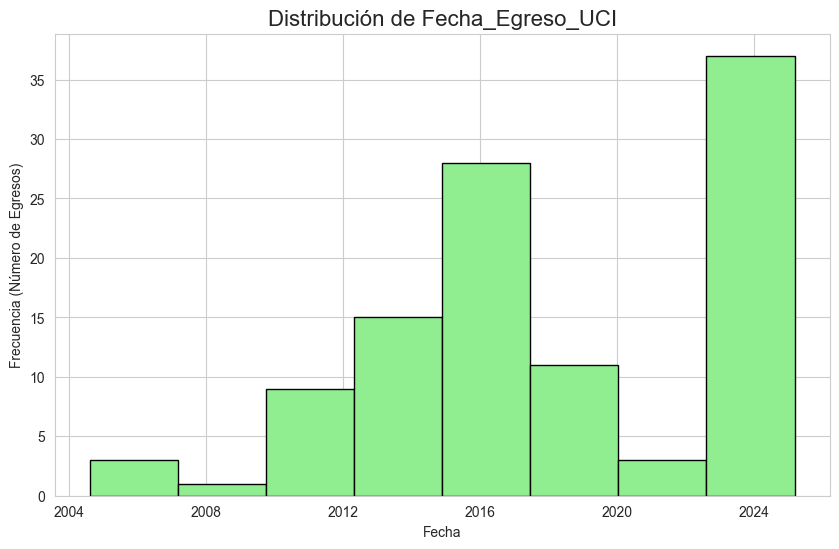

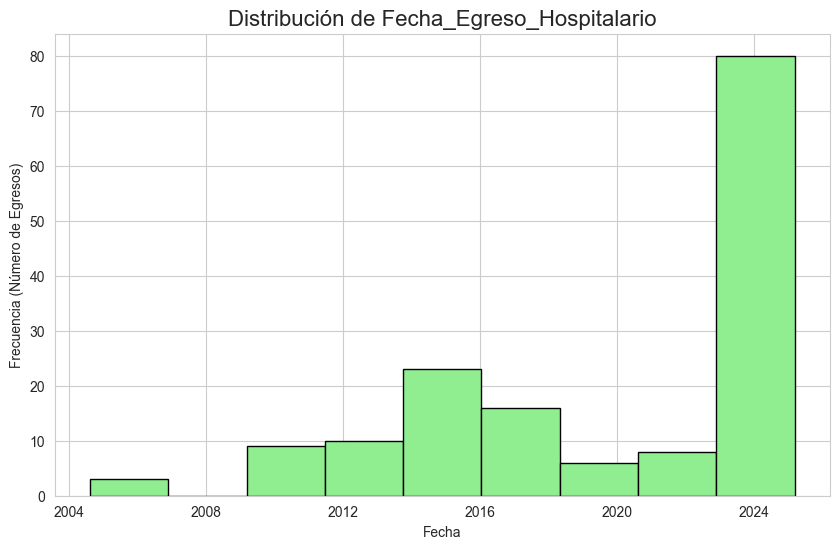

In [209]:
variables_fechas = [
    'Fecha_Egreso_UCI', 'Fecha_Egreso_Hospitalario'
]

print("\n--- Generando Histogramas para Variables de Fecha ---")
for variable in variables_fechas:
    if variable not in df.columns:
        print(f"Advertencia: La columna '{variable}' no fue encontrada. Omitiendo.")
        continue

    fechas_dt = pd.to_datetime(df[variable], errors='coerce').dropna()
    if fechas_dt.empty:
        print(f"No se pudieron convertir fechas válidas en la columna '{variable}'. Omitiendo gráfico.")
        continue

    plt.figure()
    plt.hist(fechas_dt, bins='auto', color='lightgreen', edgecolor='black')
    plt.title(f'Distribución de {variable}', fontsize=16)
    plt.xlabel('Fecha')
    plt.ylabel('Frecuencia (Número de Egresos)')
    plt.show()

*   En el caso de las fechas de egresos de UCI, se observa una alta tasa en 2020 y 2025.
*   Se puede observar que hubo un aumento en los egresos hospitalarios desde 2020 hasta 2025.

# Análisis bivariado

## Trombosis porta tumoral vs Complicación

In [148]:
pd.crosstab(df['Trombosis_Porta_Tumoral'], df['¿Complicación?'], normalize='index')

¿Complicación?,0.0,1.0
Trombosis_Porta_Tumoral,,
0.0,0.484043,0.515957
1.0,0.612903,0.387097


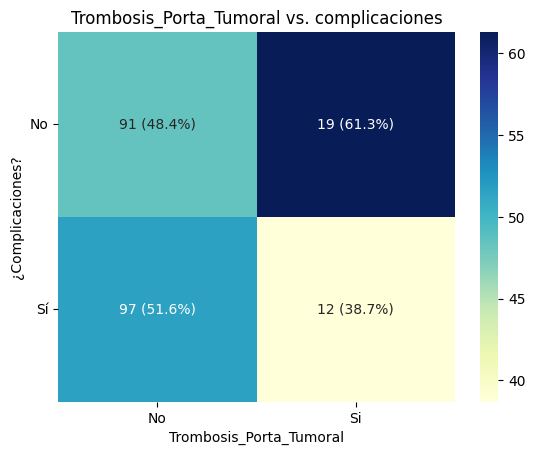

In [149]:
contingencia_vs_complicacion('Trombosis_Porta_Tumoral', 'Trombosis_Porta_Tumoral', ['No', 'Si'])

Teniendo en cuenta que solo 31 pacientes presentan esta condición de tener un coagulo en la vena porta, se puede evidenciar que aparentemente esta condición no implica necesariamente una complicación dado que el 41% de los pacientes que presentaron este diagnostico, no presentaron complicaciones.

H₀ (nula): No existe relación entre la presencia de trombosis portal tumoral y la ocurrencia de complicaciones postrasplante. <br/>

H₁ (alternativa): Existe relación entre ambas variables.

In [150]:
from scipy.stats import chi2_contingency

tabla = pd.crosstab(df['Trombosis_Porta_Tumoral'], df['¿Complicación?'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2: {chi2:.3f}, p-valor: {p:.3f}")

Chi2: 1.290, p-valor: 0.256


Dado que el p valor es mayor que 0,05 se rechaza la hipotesis nula, mostrando asi que no hay evidencia estadisticamente significativa de la asociación entre complicaciones y trombosis en la vena portal. 

<span style="color:red"> Aunque clínicamente la trombosis portal tumoral podría asociarse con un mayor riesgo de complicaciones por la afectación vascular, los resultados descriptivos no muestran diferencias contundentes entre los grupos.<span/>

## Tuvo_Inmunosupresión_con_Anticuerpos vs Complicacion

In [151]:
ct=pd.crosstab(df['Inmunosupresión_con_Anticuerpos'], df['¿Complicación?'], normalize='index')
print(ct)

¿Complicación?                        0.0       1.0
Inmunosupresión_con_Anticuerpos                    
NO                               0.359281  0.640719
SI                               0.464286  0.535714


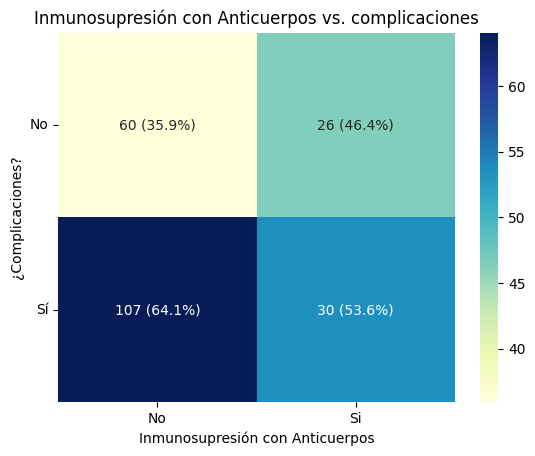

In [152]:
contingencia_vs_complicacion('Inmunosupresión_con_Anticuerpos', 'Inmunosupresión con Anticuerpos', ['No', 'Si'])

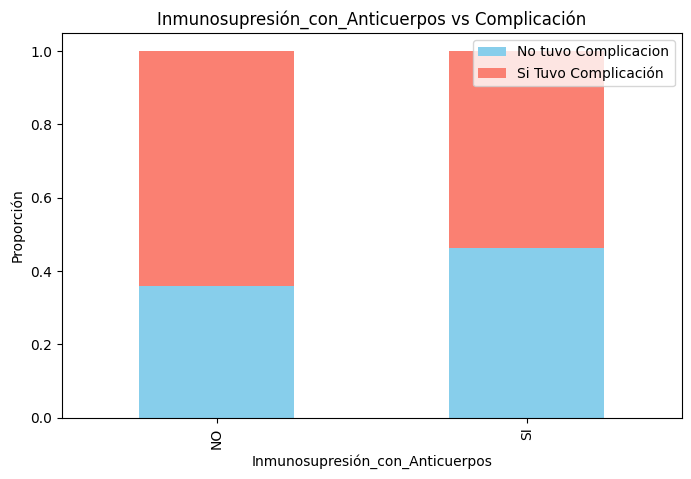

In [153]:
ct.plot(kind='bar', stacked=True, figsize=(8,5), color=['skyblue', 'salmon'])
plt.ylabel("Proporción")
plt.xlabel("Inmunosupresión_con_Anticuerpos")
plt.legend(["No tuvo Complicacion", "Si Tuvo Complicación"], loc="upper right")
plt.title("Inmunosupresión_con_Anticuerpos vs Complicación")
plt.show()

El 53.57% de los pacientes que recibieron inmunosupresión con anticuerpos presentaron alguna complicación postrasplante.

En contraste, el 64% de los pacientes sin tratamiento inmunosupresor presentaron complicaciones.

Si bien la proporción es mayor en los no tratados, la diferencia no parece marcadamente amplia, lo cual sugiere que las complicaciones podrían no depender exclusivamente del uso del tratamiento inmunosupresor, sino del estado clínico previo y del motivo de su administración (prevención vs. respuesta a rechazo).

H₀ (nula): No existe asociación entre el uso de inmunosupresores con anticuerpos y las complicaciones postrasplante.

H₁ (alternativa): Existe asociación entre ambas variables.

In [154]:
tabla = pd.crosstab(df['Inmunosupresión_con_Anticuerpos'], df['¿Complicación?'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2: {chi2:.3f}, p-valor: {p:.3f}")

Chi2: 1.534, p-valor: 0.216


Dado que el p valor es mayor a 0,05 no se rechaza la hipotesis nula, lo que concluye que no hay evidencia estadísticamente significativa de la asociacion entre el tratamiento con inmunosupresores y la presencia de complicaciones.

## α-Fetoproteína al momento del diagnóstico vs Complicación

Para explorar la relación entre los niveles de AFP y la presencia de complicaciones, se analizaron los pacientes con valores superiores a 200 ng/mL, considerados clínicamente relevantes como indicativos de tumor activo.

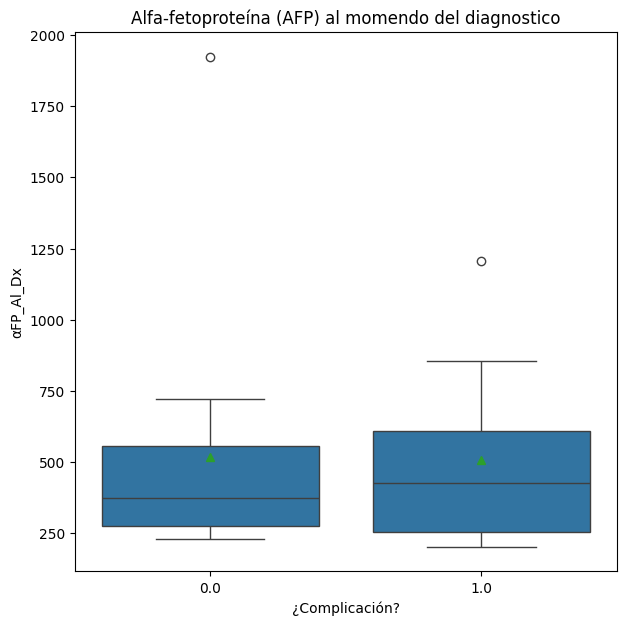

In [179]:
plt.figure(figsize=(7, 7))
sns.boxplot(
    x='¿Complicación?',
    y='αFP_Al_Dx',
    data=df.loc[df['αFP_Al_Dx'] >200],  #
    showmeans=True
)
plt.title("Alfa-fetoproteína (AFP) al momendo del diagnostico")
plt.xlabel("¿Complicación?")
plt.ylabel("αFP_Al_Dx")
plt.show()

El boxplot comparativo muestra que las medias de AFP en los grupos con y sin complicaciones son similares, y que el valor más extremo de AFP se presenta, incluso, en pacientes que no desarrollaron complicaciones postrasplante.

Esto sugiere que, aunque niveles altos de AFP reflejan una mayor carga tumoral o un estadio más avanzado del carcinoma hepatocelular, no se evidencia una asociación directa con la aparición de complicaciones en el contexto postrasplante.

H₀: No existe diferencia significativa en los valores de AFP entre pacientes con y sin complicaciones.

H₁: Existe una diferencia significativa en los valores de AFP entre ambos grupos.

In [185]:
df[df['αFP_Al_Dx'] >200]['αFP_Al_Dx'].describe()

count      23.000000
mean      512.803913
std       391.244531
min       202.000000
25%       260.460000
50%       401.970000
75%       588.490000
max      1924.000000
Name: αFP_Al_Dx, dtype: float64

In [180]:
import scipy.stats as stats

# Filtrar los grupos según si tuvieron o no complicaciones
grupo_sin_comp = df[df["¿Complicación?"] == 0]["αFP_Al_Dx"].dropna()
grupo_con_comp = df[df["¿Complicación?"] == 1]["αFP_Al_Dx"].dropna()

# Aplicar prueba de Mann-Whitney U (no paramétrica)
stat, p_value = stats.mannwhitneyu(grupo_sin_comp, grupo_con_comp, alternative='two-sided')

print("📊 Resultado prueba Mann-Whitney U")
print(f"Estadístico U: {stat:.2f}")
print(f"Valor p: {p_value:.4f}")

📊 Resultado prueba Mann-Whitney U
Estadístico U: 7856.00
Valor p: 0.5179


Dado que el p valor es superior a 0,05 podemos concluir que no hay evidencia suficiente para afirmar que los valores de αFP difieran entre los grupos con y sin complicaciones. No hay diferencia significativa entre los valores de αFP para pacientes con complicaciones vs sin complicaciones

## Grado Hepatocarcinoma vs Complicaciones

In [186]:
pd.crosstab(df["Grado_HCC"], df["¿Complicación?"], normalize='index') 

¿Complicación?,0.0,1.0
Grado_HCC,,
1.0,0.500000,0.500000
2.0,0.510204,0.489796
3.0,0.350000,0.650000
4.0,0.666667,0.333333


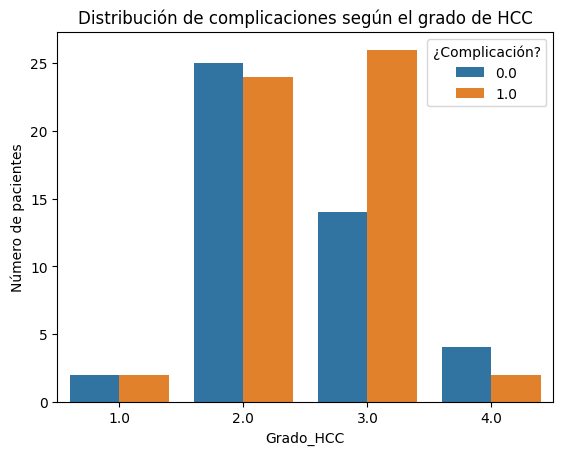

In [188]:
sns.countplot(data=df, x="Grado_HCC", hue="¿Complicación?")
plt.title("Distribución de complicaciones según el grado de HCC")
plt.ylabel("Número de pacientes")
plt.show()

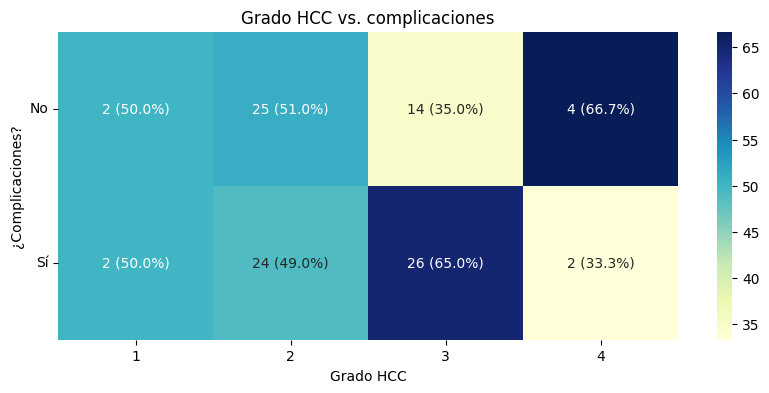

In [189]:
contingencia_vs_complicacion('Grado_HCC', 'Grado HCC', [1,2,3,4], (10,4))

<span style="color:red"> Se observa una tendencia ascendente: los pacientes con grado 3 presentan una mayor proporción de complicaciones postrasplante.<span/>

En el grado I, el 50 % de los pacientes tuvo complicaciones, mientras que en el grado III la proporción asciende al 65 % y en el grado IV al 66.7 %.

Este comportamiento sugiere que la severidad histológica del tumor podría estar asociada con un mayor riesgo de eventos adversos tras el trasplante.

H₀ (nula): No existe relación entre el grado histológico del hepatocarcinoma y la presencia de complicaciones postrasplante.

H₁ (alternativa): Existe una relación entre el grado histológico del hepatocarcinoma y la presencia de complicaciones postrasplante.

In [190]:
# Prueba de Chi-cuadrado
tabla = pd.crosstab(df["Grado_HCC"], df["¿Complicación?"])
chi2, p_value, dof, expected = stats.chi2_contingency(tabla)

print(f"\nChi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.4f}")


Chi-cuadrado: 3.498
p-valor: 0.3210


A pesar de que se identificó una tendencia ascendente en donde a medida que aumenta el Grado_HCC se incrementa la proporción  de pacientes con complicacion, la prueba de hipotesis arroja un p value superior a 0,05, por lo cual no se tiene evidencia suficiente para afirmar una relación estadisticamente significativa.

## Estadio vs Complicaciones

In [192]:
pd.crosstab(df["Estadio"], df["¿Complicación?"], normalize='index') 

¿Complicación?,0.0,1.0
Estadio,,
ESTADIO 1,0.547170,0.452830
ESTADIO 2,0.324324,0.675676
ESTADIO 3,0.500000,0.500000
ESTADIO 4,1.000000,0.000000


In [194]:
df["Estadio"].unique()

array([nan, 'ESTADIO 2', 'ESTADIO 3', 'ESTADIO 1', 'ESTADIO 4'],
      dtype=object)

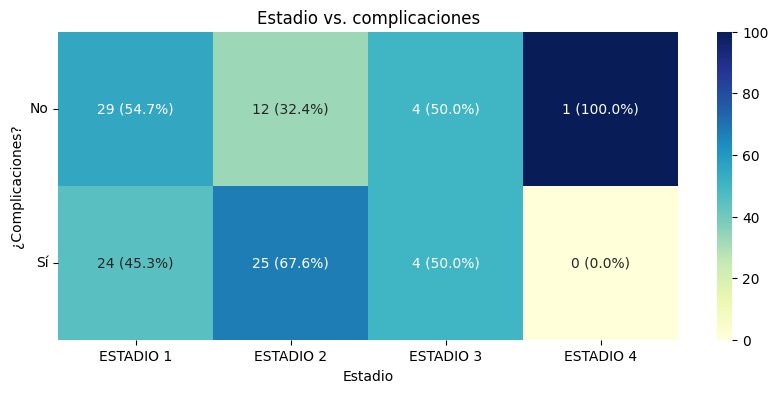

In [195]:
contingencia_vs_complicacion('Estadio', 'Estadio', ['ESTADIO 1', 'ESTADIO 2', 'ESTADIO 3', 'ESTADIO 4'], (10,4))

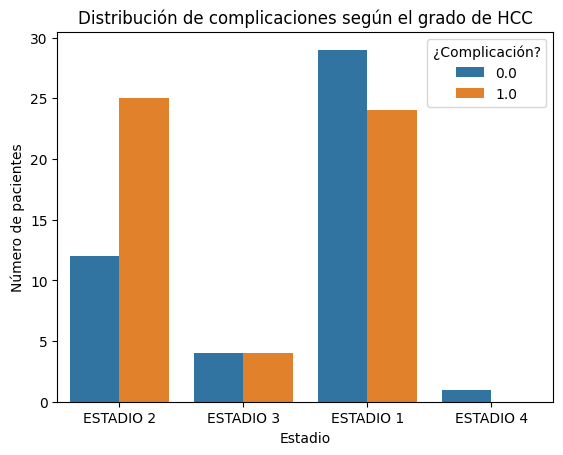

In [197]:
sns.countplot(data=df, x="Estadio", hue="¿Complicación?")
plt.title("Distribución de complicaciones según el grado de HCC")
plt.ylabel("Número de pacientes")
plt.show()

Se puede evidenciar que a medida que el tumor es mas invasivo, se presentan mas complicaciones en el paciente dado que 

En el estadio 1, poco más de la mitad presenta complicaciones (56.6%). <br/>
En el estadio 2, las complicaciones suben a 70%. <br/>
En el estadio 3, casi el 90% presenta complicaciones. <br/>
En el estadio 4, todos los pacientes tuvieron complicaciones. <br/>


H₀ (nula): No existe asociación entre el estadio del hepatocarcinoma y la presencia de complicaciones postrasplante.

H₁ (alternativa): Existe una asociación entre el estadio del hepatocarcinoma y la presencia de complicaciones postrasplante

In [201]:
# Prueba Chi-cuadrado
tabla = pd.crosstab(df["Estadio"], df["¿Complicación?"])
chi2, p_value, dof, expected = stats.chi2_contingency(tabla)

print(f"\nChi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.4f}")


Chi-cuadrado: 5.572
p-valor: 0.1344


Dado que el p valor es superior a 0,05 no es posible rechazar la hipotesis nula, por lo cual se acepta que no existe asociacion estadisticamente significativa entre el estadio y las complicaciones.

## Edad al momento del transplante vs Complicaciones

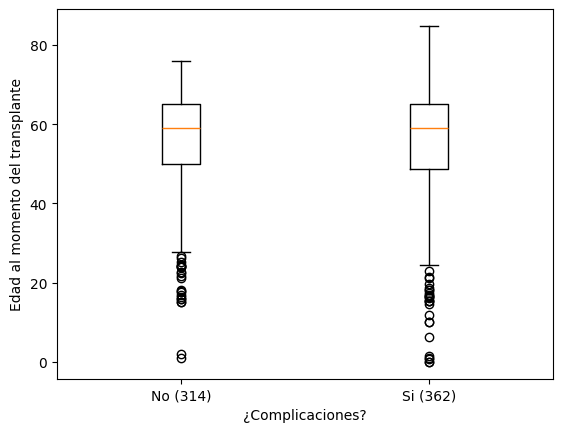

In [155]:
box_plot_vs_complicacion('Edad_Al_Tx','Edad al momento del transplante')

## Grupo etario vs complicaciones

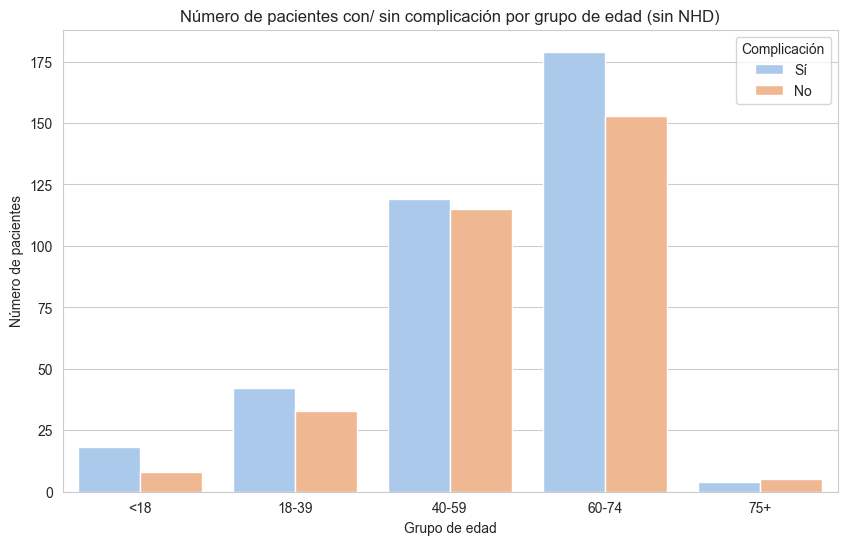

In [230]:
complicaciones1 = df['¿Complicación?'].replace({0: "No", 1: "Sí"})
mask = complicaciones1.notna()

plt.figure(figsize=(10,6))
sns.countplot(
    data=df.loc[mask],
    x="Grupo_Edad",
    hue=complicaciones1[mask],  # Sí / No
    palette="pastel"
)

plt.title("Número de pacientes con/ sin complicación por grupo de edad (sin NHD)")
plt.xlabel("Grupo de edad")
plt.ylabel("Número de pacientes")
plt.legend(title="Complicación")
plt.show()

## BMI al momento del transplante

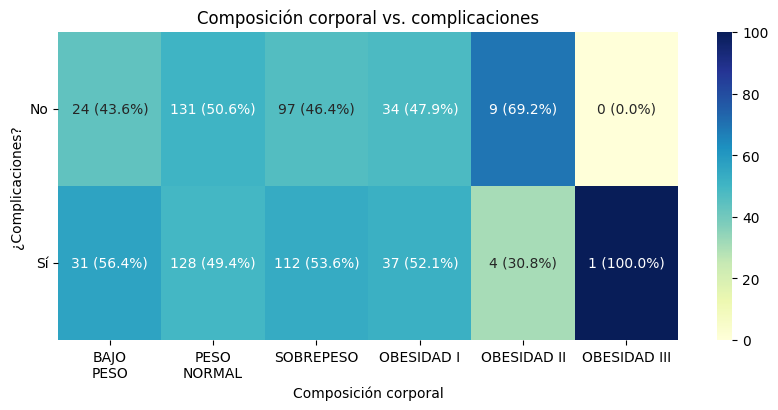

In [156]:
contingencia_vs_complicacion('Composición_Corporal', 'Composición corporal', ['BAJO\nPESO','PESO\nNORMAL','SOBREPESO','OBESIDAD I','OBESIDAD II','OBESIDAD III'], (10,4))

## Días que se dejó la sonda vesical

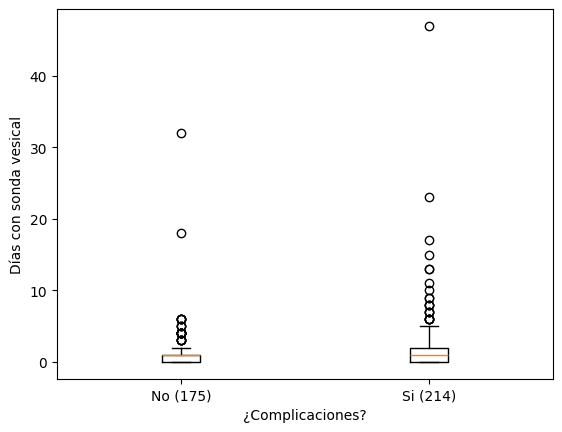

In [157]:
box_plot_vs_complicacion('Tiempo_Sonda_Vesical',"Días con sonda vesical")

## Días que se dejo el cateter central (CVC)

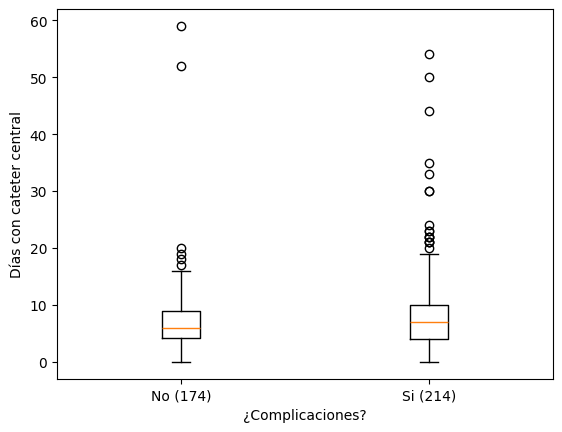

In [158]:
box_plot_vs_complicacion('Tiempo_CVC',"Días con cateter central")

## ¿El receptor tenía antocuerpos IGG contra Citomegalovirus?

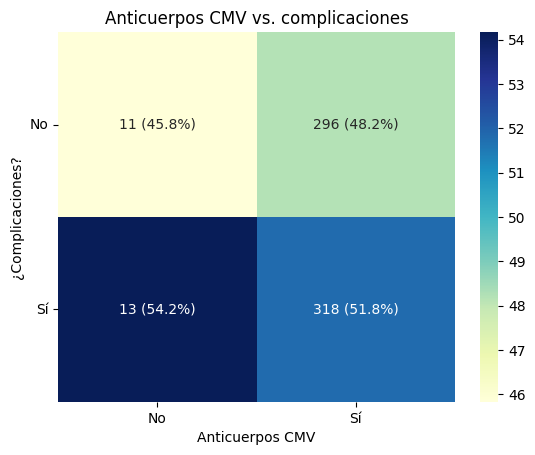

In [159]:
contingencia_vs_complicacion('CMV_Receptor', 'Anticuerpos CMV', ['No', 'Sí'])

## ¿El receptor tenía alguna valvulopatía pre quirúrgica?

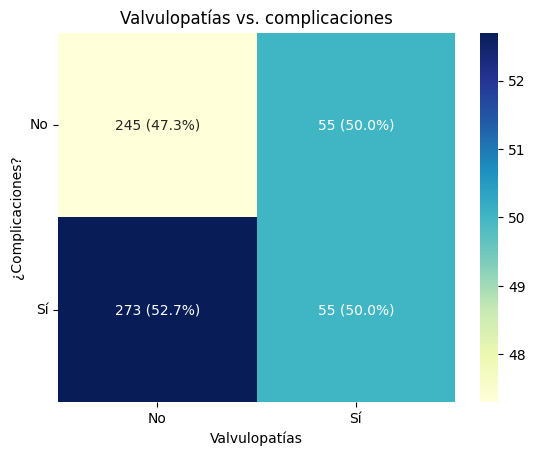

In [160]:
contingencia_vs_complicacion('Valvulopatía_SiNo', 'Valvulopatías', ['No', 'Sí'])

## Fracción de Eyección EKG

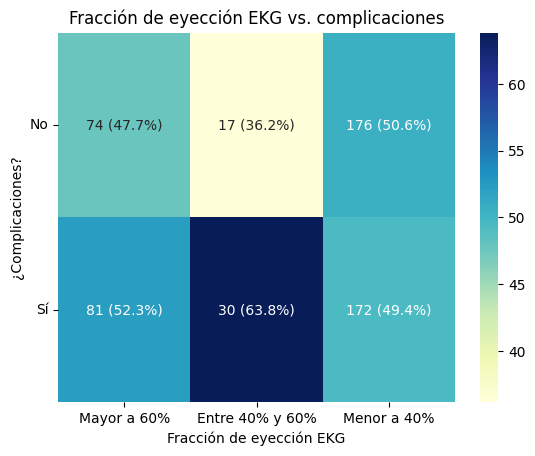

In [161]:
contingencia_vs_complicacion('Ecocardiograma_PreQx-FE_Cod', 'Fracción de eyección EKG', ['Mayor a 60%', 'Entre 40% y 60%', 'Menor a 40%'])

## Respuesta cronotrópica máxima por ecostress

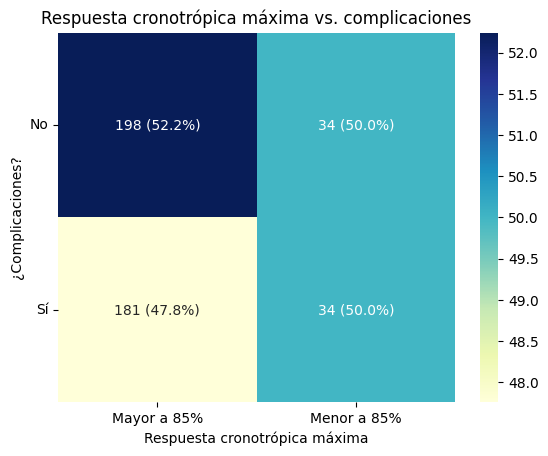

In [162]:
contingencia_vs_complicacion(
    'Ecocardiograma_PreQx_RC',
    'Respuesta cronotrópica máxima',
    ['Mayor a 85%', 'Menor a 85%'])

## Hipertensión pulmonar en EKG

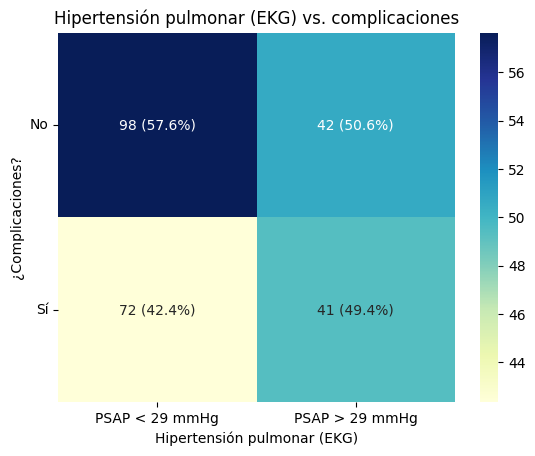

In [163]:
contingencia_vs_complicacion(
    'Ecocardiograma_PreQx_Hipertensión_Pulmonar',
    'Hipertensión pulmonar (EKG)',
    ['PSAP < 29 mmHg', 'PSAP > 29 mmHg'])

## TAPSE (Ecocardiograma)

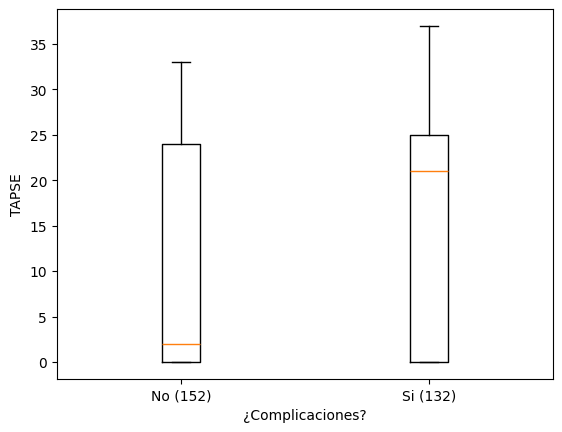

In [164]:
box_plot_vs_complicacion('Ecocardiograma_PreQx_TAPSE',"TAPSE")

## TAVSE (Ecocardiograma)

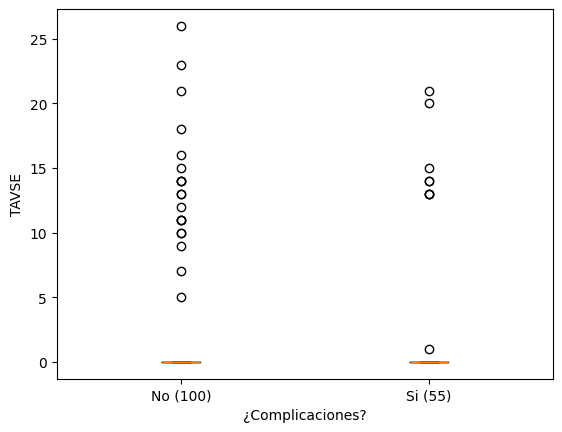

In [165]:
box_plot_vs_complicacion('Ecocardiograma_PreQx_TASVE',"TAVSE")

## Disfunción diastólica (EKG)

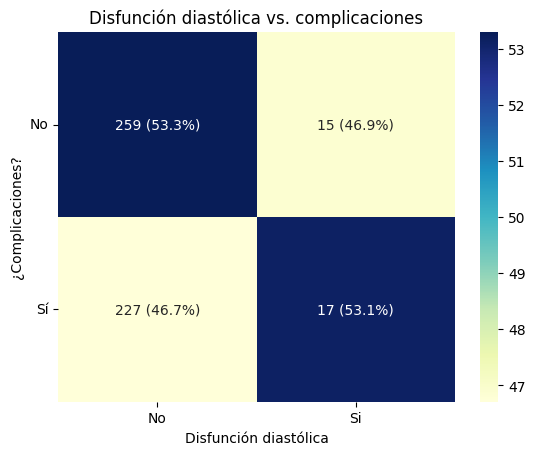

In [166]:
contingencia_vs_complicacion(
    'Ecocardiograma_PreQx_Disfunción_Diastólica',
    'Disfunción diastólica',
    ['No','Si'])

## METs (Unidades metabólicas de tarea)

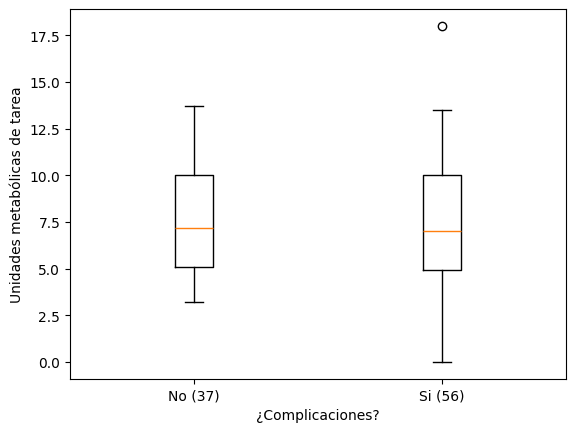

In [167]:
box_plot_vs_complicacion('METS',"Unidades metabólicas de tarea")

## Edad del donante

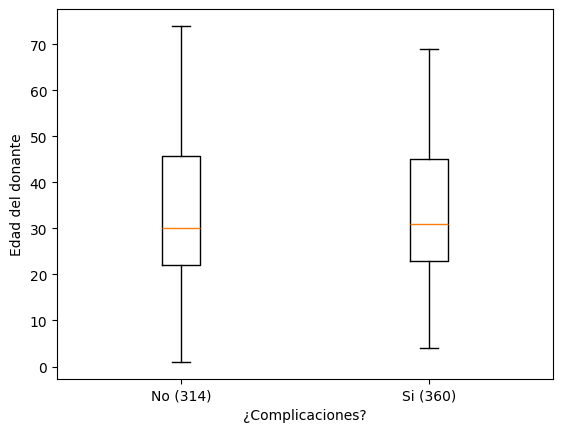

In [168]:
box_plot_vs_complicacion('Edad_Donante_Tx#1','Edad del donante')

## Transplante combinado hígado-riñón

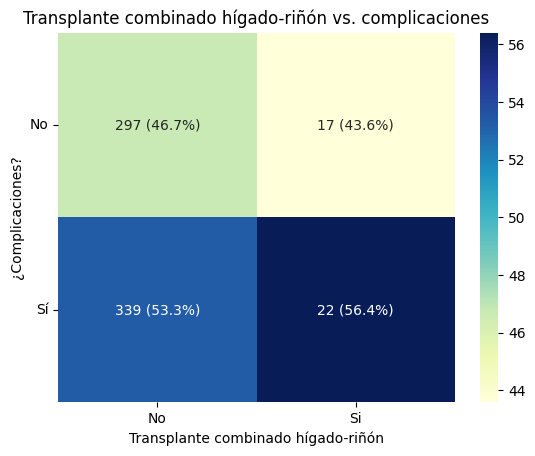

In [169]:
contingencia_vs_complicacion(
    'Trasplante_Combinado-Hígado-Riñón_Tx#1',
    'Transplante combinado hígado-riñón',
    ['No','Si'])

## # de unidades de glóbulos rojos usadas en Tx

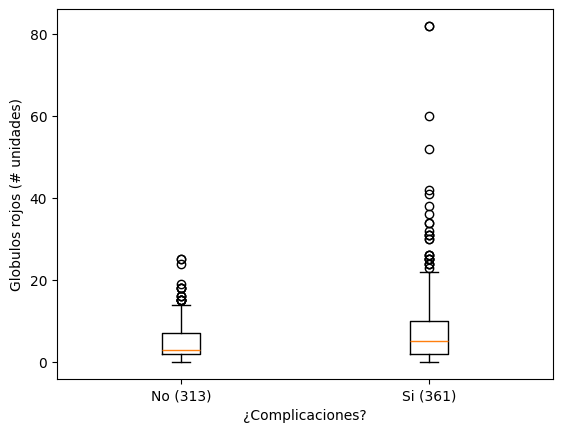

In [170]:
box_plot_vs_complicacion('#_Unidades_Glóbulos_Rojos_Tx#1','Globulos rojos (# unidades)')

## # de unidades de plasma fresco congelado usadas en Tx

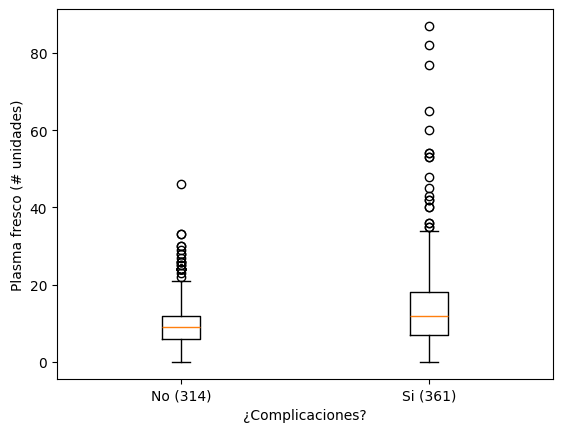

In [171]:
box_plot_vs_complicacion('#_Unidades_Plasma_Fresco_Congelado_Tx#1','Plasma fresco (# unidades)')

## # de unidades crioprecipitados usadas en Tx

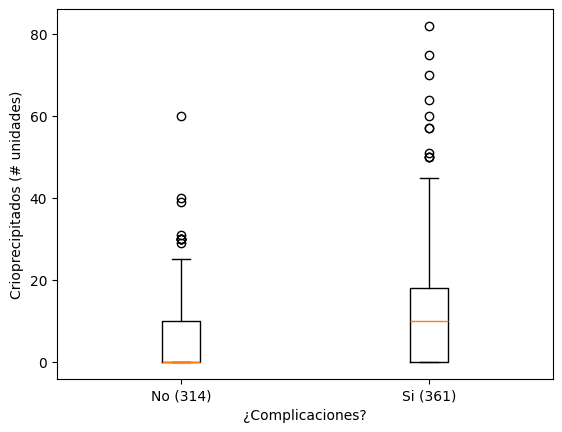

In [172]:
box_plot_vs_complicacion('#_Unidades_Crioprecipitados_Tx#1','Crioprecipitados (# unidades)')

## # de unidades de plaquetas usadas en Tx

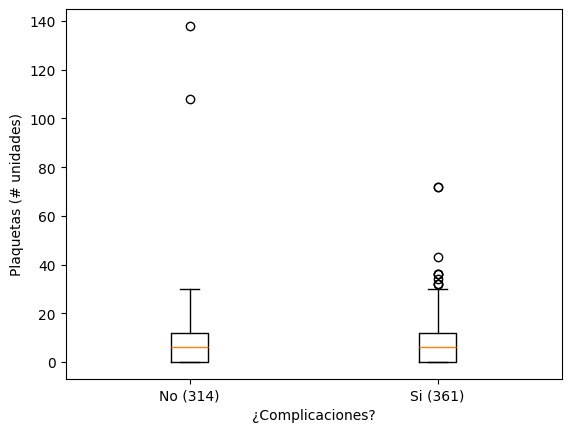

In [173]:
box_plot_vs_complicacion('#_Unidades_Plaquetas_Tx#1','Plaquetas (# unidades)')

## Tiempo quirúrgico (horas)

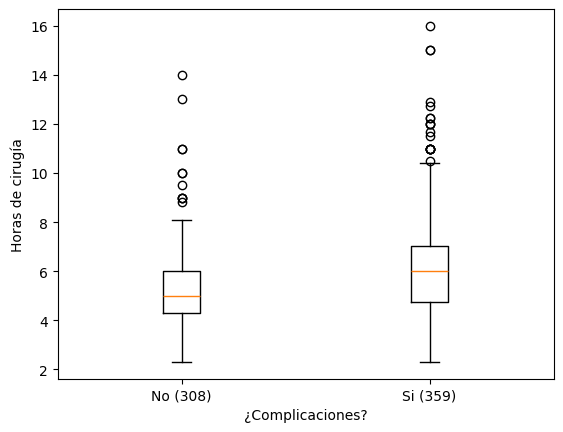

In [174]:
box_plot_vs_complicacion('Tiempo_Quirúrgico_Tx#1','Horas de cirugía')

## Antibiótico_Profiláctico_VS_Terapéutico

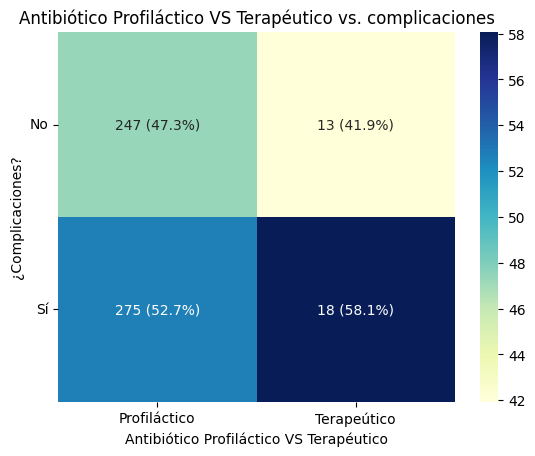

In [175]:
contingencia_vs_complicacion(
    'Antibiótico_Profiláctico_VS_Terapéutico',
    'Antibiótico Profiláctico VS Terapéutico',
    ['Profiláctico','Terapeútico'])

## Número de días que recibió antibiótico pretransplante en caso de infección

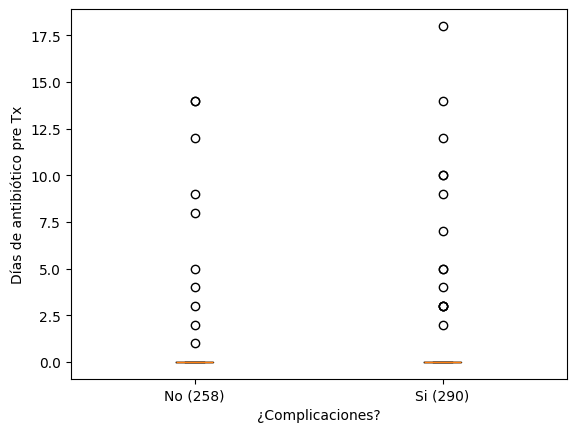

In [176]:
box_plot_vs_complicacion('Días_Tratamiento_Antibiótico_Previo_A_Tx#1','Días de antibiótico pre Tx')

## Tiempo entre profilaxis antibiótica y la incisión

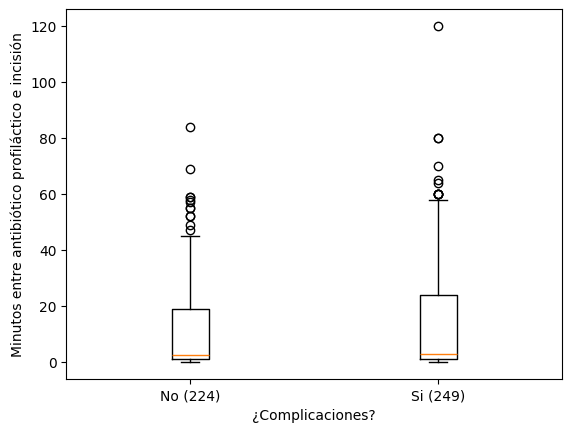

In [202]:
box_plot_vs_complicacion('Tiempo_De_Dosis_Hasta_Tx#1','Minutos entre antibiótico profiláctico e incisión')

## Pruebas de hipótesis para el subconjunto de variables booleanas y ordinales

In [210]:
from scipy.stats import chi2_contingency, fisher_exact

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

variables_categoricas = [
    'Soporte_Vasopresor_PeriTx', 'Levosimendan_PeriTx', 'Noradrenalina_PeriTx',
    'Adrenalina_PeriTx', 'Vasopresina_PeriTx', 'Dopamina_PeriTx',
    'Amiodarona_PeriTx', 'Rechazo_Agudo', 'Rechazo_Crónico',
    'Infección_POP', 'Stent', 'Requirió_Reconstrucción_Biliar',
    'Profilaxis_Antitrombótica', 'Fast_Track'
]

variables_ordinales = [
    'Tipo_De_Complicación_1', 'Severidad_Rechazo_Agudo',
    'Tipo_Infección_1', 'Germen_1', '#_De_Complicaciones'
]

variable_objetivo = '¿Complicación?'
variables_a_analizar = variables_categoricas + variables_ordinales

### Variables categóricas


Análisis CATEGÓRICO: 'Soporte_Vasopresor_PeriTx' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?             0.0  1.0
Soporte_Vasopresor_PeriTx          
0.0                        151  111
1.0                        155  219


<Figure size 1200x700 with 0 Axes>

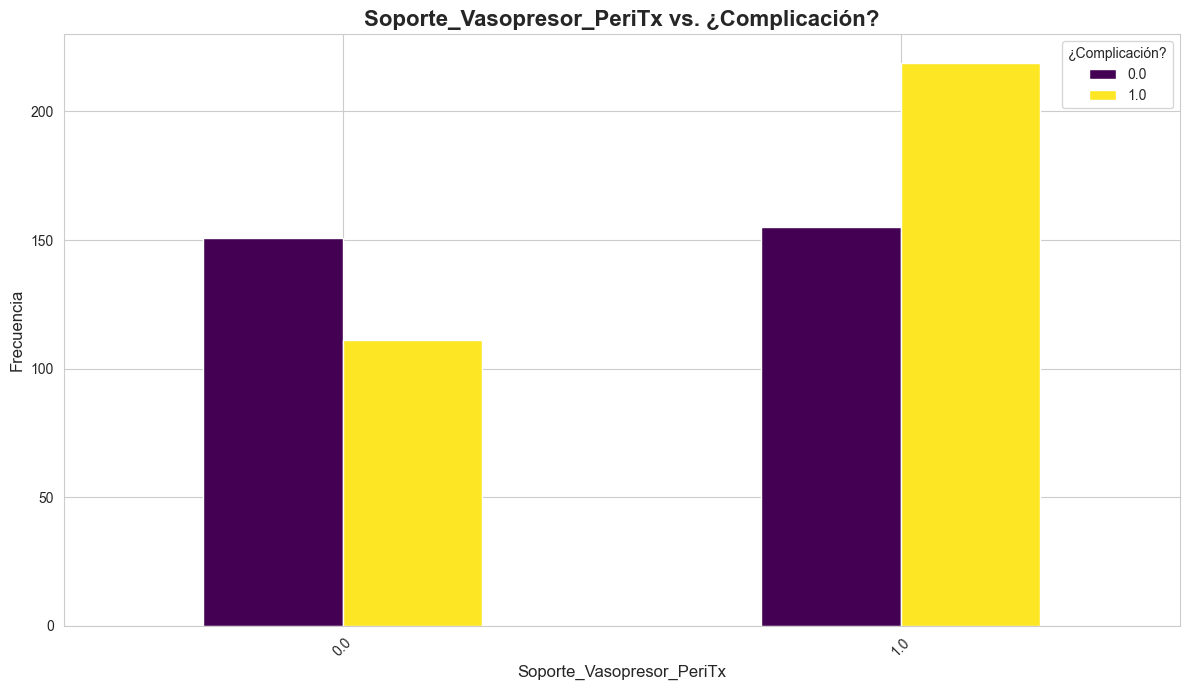


📈 Resultados de Chi-cuadrado:
   Chi² = 15.5341
   p-valor = 0.0001
   Grados de libertad = 1

💡 Interpretación:
   ✓ ASOCIACIÓN SIGNIFICATIVA (p=0.0001 < 0.05)
   Existe relación estadística entre 'Soporte_Vasopresor_PeriTx' y '¿Complicación?'

Análisis CATEGÓRICO: 'Levosimendan_PeriTx' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?       0.0  1.0
Levosimendan_PeriTx          
0.0                  306  332
1.0                    0    4


<Figure size 1200x700 with 0 Axes>

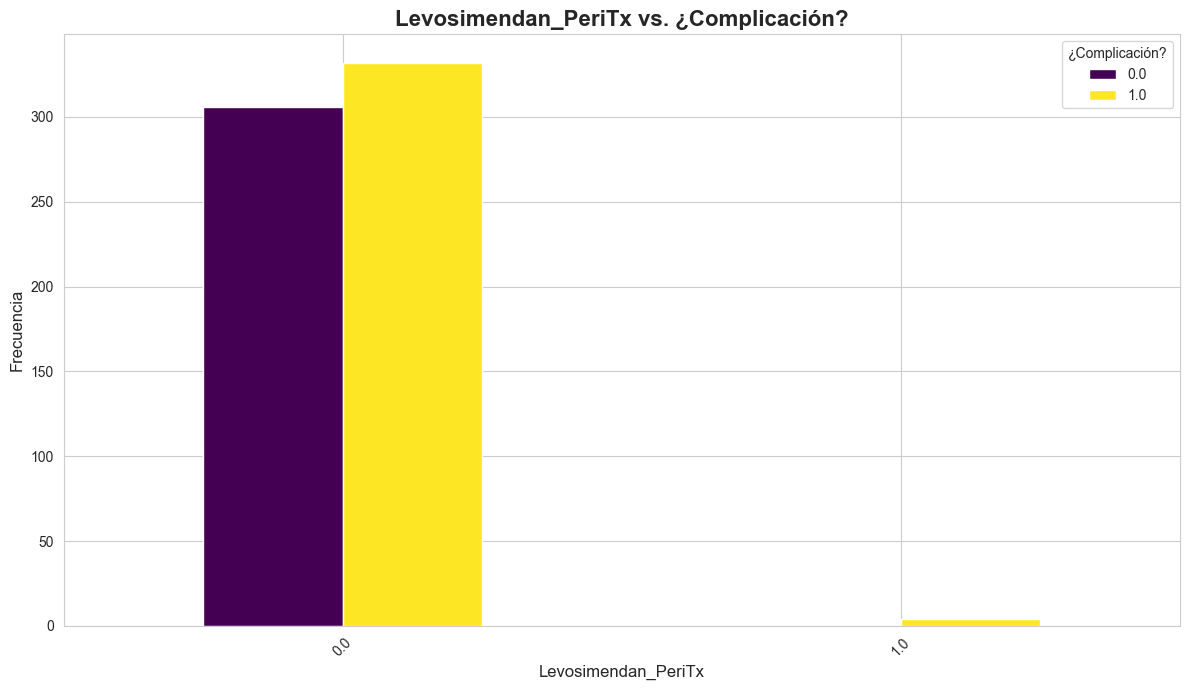


📈 Resultados de Chi-cuadrado:
   Chi² = 1.9951
   p-valor = 0.1578
   Grados de libertad = 1

⚠️ Advertencia: 50.0% de celdas tienen frecuencia esperada < 5
   Los resultados pueden no ser confiables.

🔬 Prueba Exacta de Fisher (alternativa para muestras pequeñas):
   Odds Ratio = inf
   p-valor (Fisher) = 0.1255

💡 Interpretación (Fisher):
   ✗ No significativo (p=0.1255 ≥ 0.05)
   No hay evidencia de asociación entre las variables

💡 Interpretación:
   ✗ No significativo (p=0.1578 ≥ 0.05)
   No hay evidencia de asociación entre las variables

Análisis CATEGÓRICO: 'Noradrenalina_PeriTx' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?        0.0  1.0
Noradrenalina_PeriTx          
0.0                   157  124
1.0                   147  210


<Figure size 1200x700 with 0 Axes>

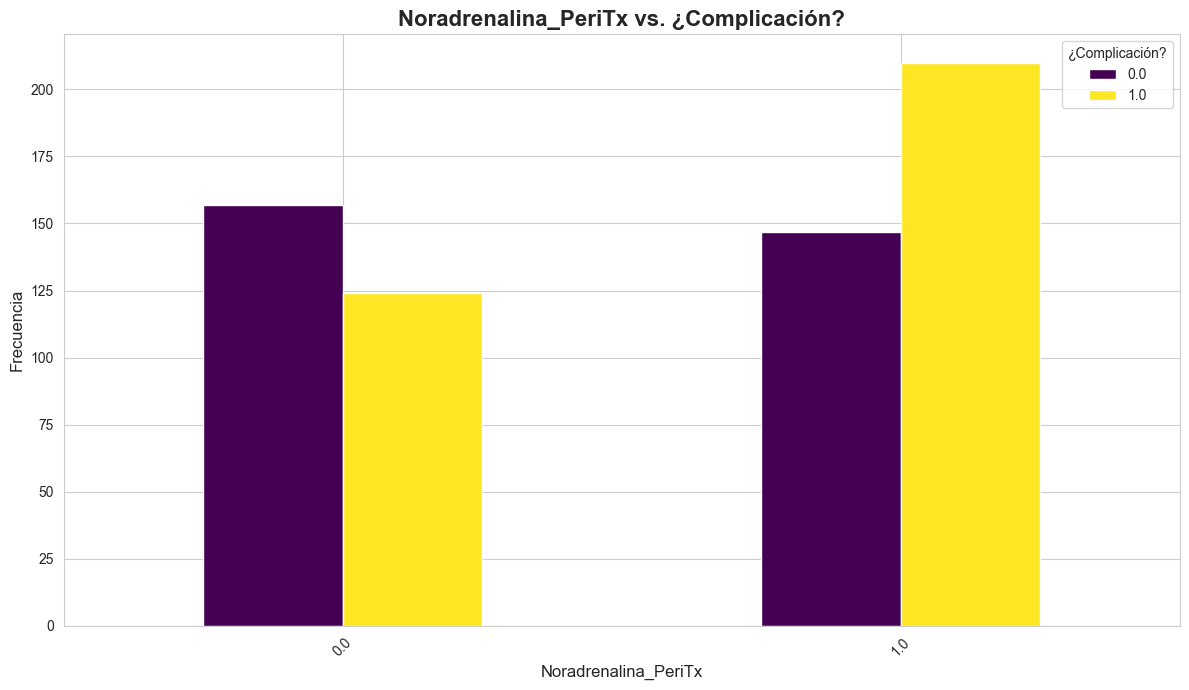


📈 Resultados de Chi-cuadrado:
   Chi² = 13.0298
   p-valor = 0.0003
   Grados de libertad = 1

💡 Interpretación:
   ✓ ASOCIACIÓN SIGNIFICATIVA (p=0.0003 < 0.05)
   Existe relación estadística entre 'Noradrenalina_PeriTx' y '¿Complicación?'

Análisis CATEGÓRICO: 'Adrenalina_PeriTx' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?     0.0  1.0
Adrenalina_PeriTx          
0.0                288  299
1.0                 17   36


<Figure size 1200x700 with 0 Axes>

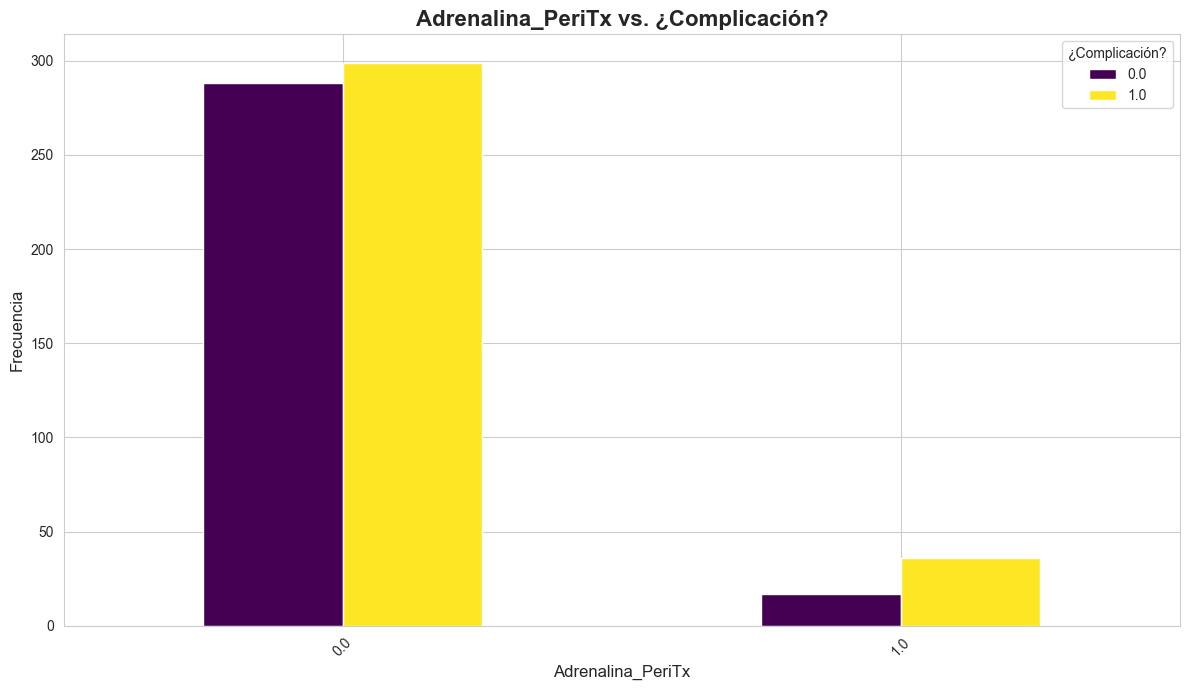


📈 Resultados de Chi-cuadrado:
   Chi² = 4.9632
   p-valor = 0.0259
   Grados de libertad = 1

💡 Interpretación:
   ✓ ASOCIACIÓN SIGNIFICATIVA (p=0.0259 < 0.05)
   Existe relación estadística entre 'Adrenalina_PeriTx' y '¿Complicación?'

Análisis CATEGÓRICO: 'Vasopresina_PeriTx' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?      0.0  1.0
Vasopresina_PeriTx          
0.0                 302  305
1.0                   3   30


<Figure size 1200x700 with 0 Axes>

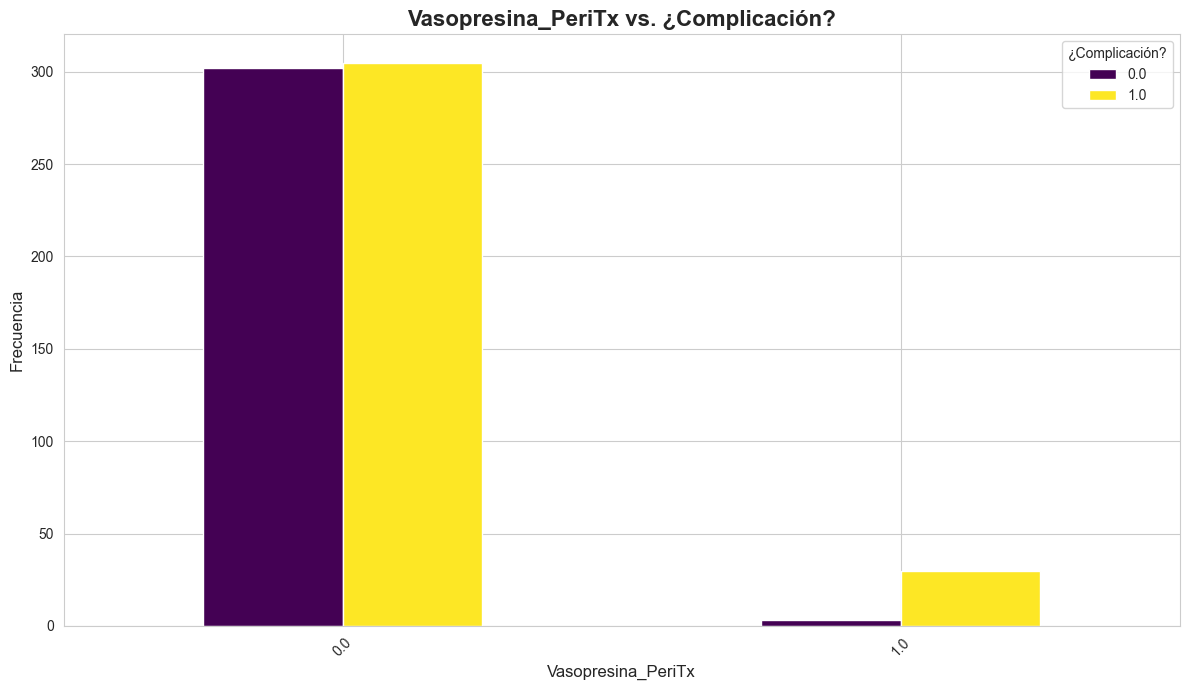


📈 Resultados de Chi-cuadrado:
   Chi² = 19.1470
   p-valor = 0.0000
   Grados de libertad = 1

💡 Interpretación:
   ✓ ASOCIACIÓN SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe relación estadística entre 'Vasopresina_PeriTx' y '¿Complicación?'

Análisis CATEGÓRICO: 'Dopamina_PeriTx' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?   0.0  1.0
Dopamina_PeriTx          
0.0              271  283
1.0               33   52


<Figure size 1200x700 with 0 Axes>

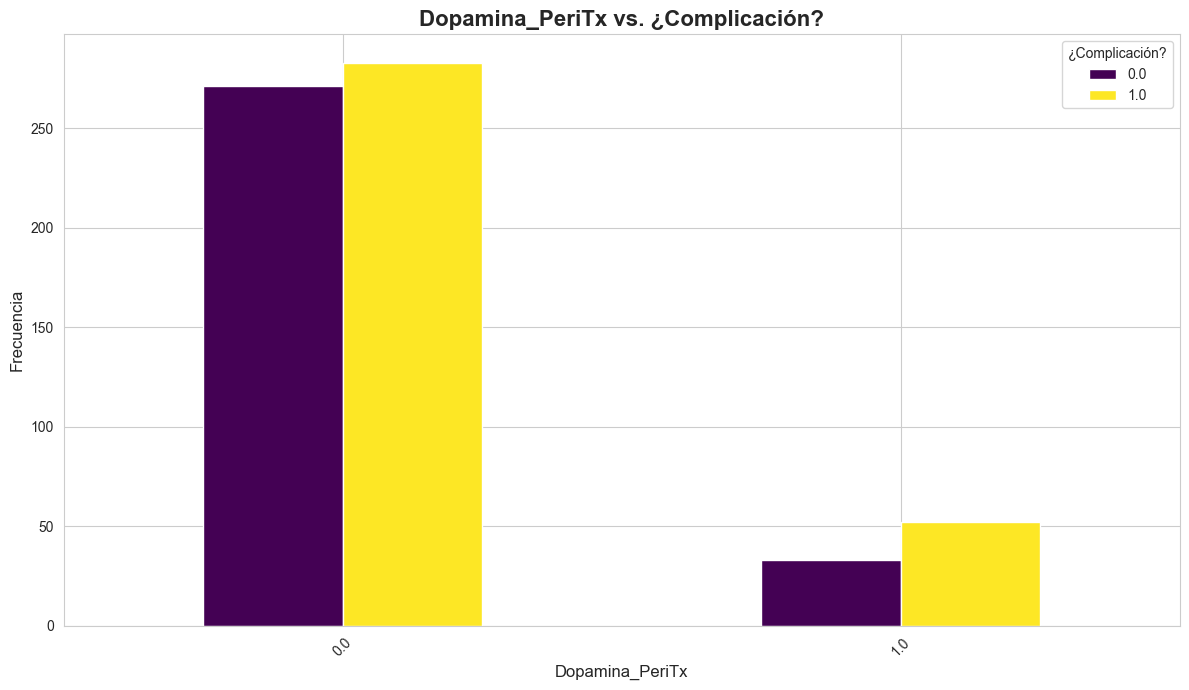


📈 Resultados de Chi-cuadrado:
   Chi² = 2.6191
   p-valor = 0.1056
   Grados de libertad = 1

💡 Interpretación:
   ✗ No significativo (p=0.1056 ≥ 0.05)
   No hay evidencia de asociación entre las variables

Análisis CATEGÓRICO: 'Amiodarona_PeriTx' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?     0.0  1.0
Amiodarona_PeriTx          
0.0                297  313
1.0                  7   22


<Figure size 1200x700 with 0 Axes>

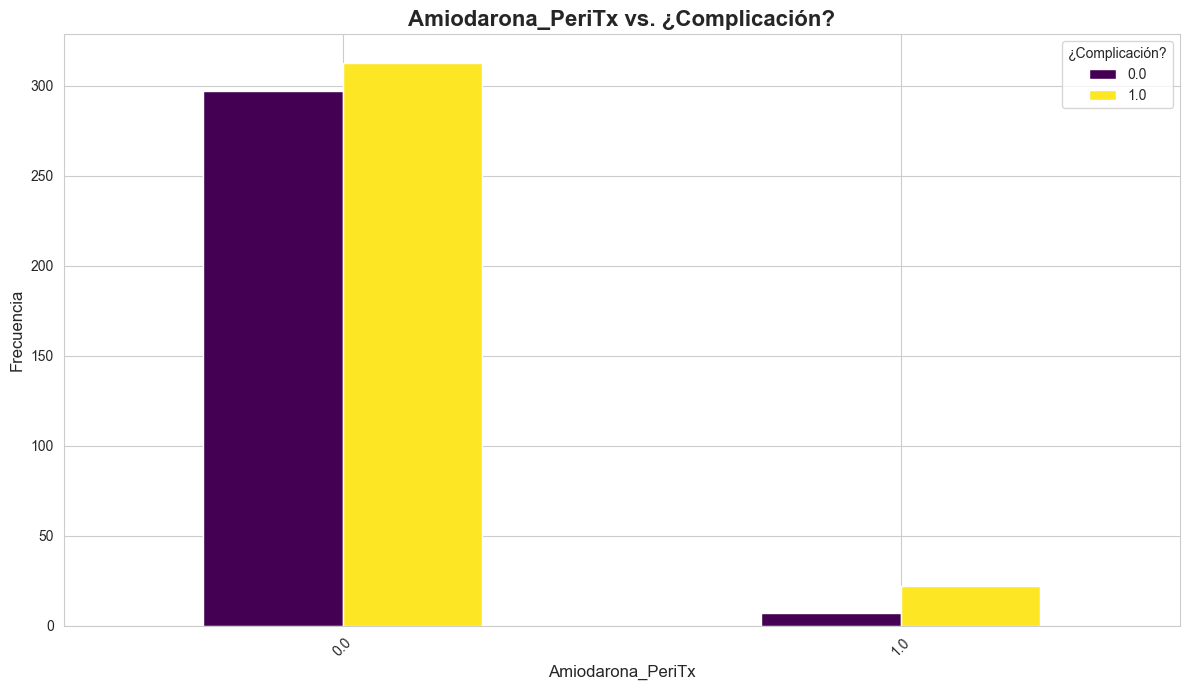


📈 Resultados de Chi-cuadrado:
   Chi² = 5.7420
   p-valor = 0.0166
   Grados de libertad = 1

💡 Interpretación:
   ✓ ASOCIACIÓN SIGNIFICATIVA (p=0.0166 < 0.05)
   Existe relación estadística entre 'Amiodarona_PeriTx' y '¿Complicación?'

Análisis CATEGÓRICO: 'Rechazo_Agudo' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?  0.0  1.0
Rechazo_Agudo           
0.0             257  275
1.0              54   79


<Figure size 1200x700 with 0 Axes>

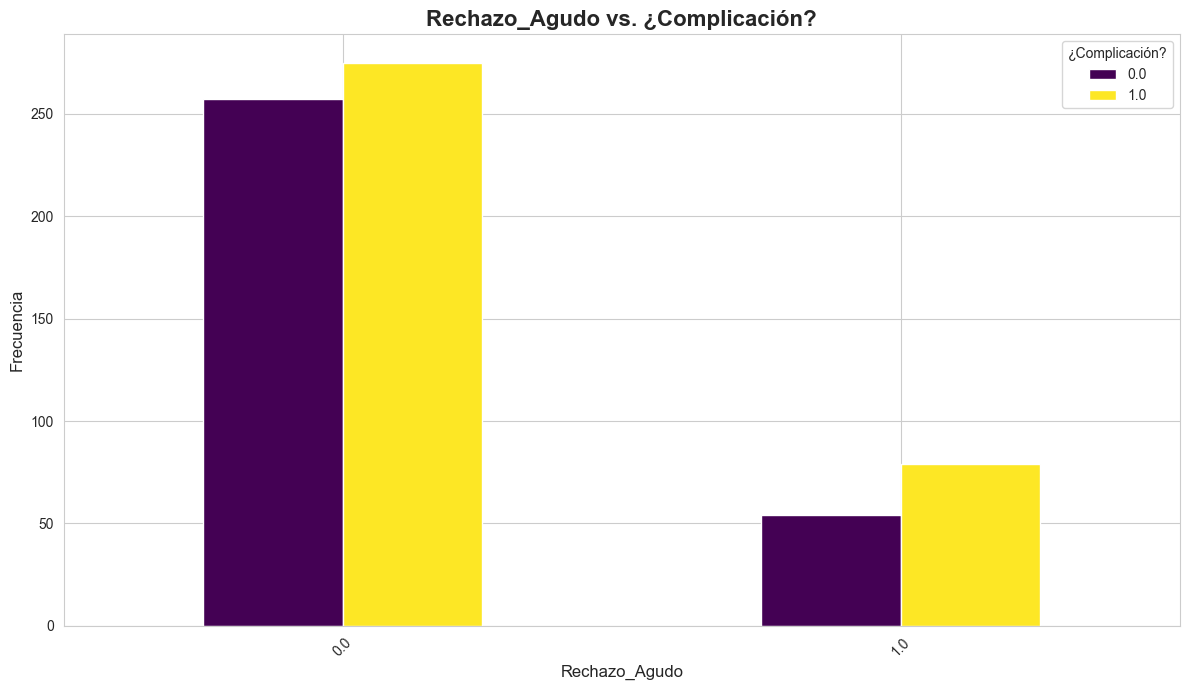


📈 Resultados de Chi-cuadrado:
   Chi² = 2.2383
   p-valor = 0.1346
   Grados de libertad = 1

💡 Interpretación:
   ✗ No significativo (p=0.1346 ≥ 0.05)
   No hay evidencia de asociación entre las variables

Análisis CATEGÓRICO: 'Rechazo_Crónico' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?   0.0  1.0
Rechazo_Crónico          
0.0              309  351
1.0                1    3


<Figure size 1200x700 with 0 Axes>

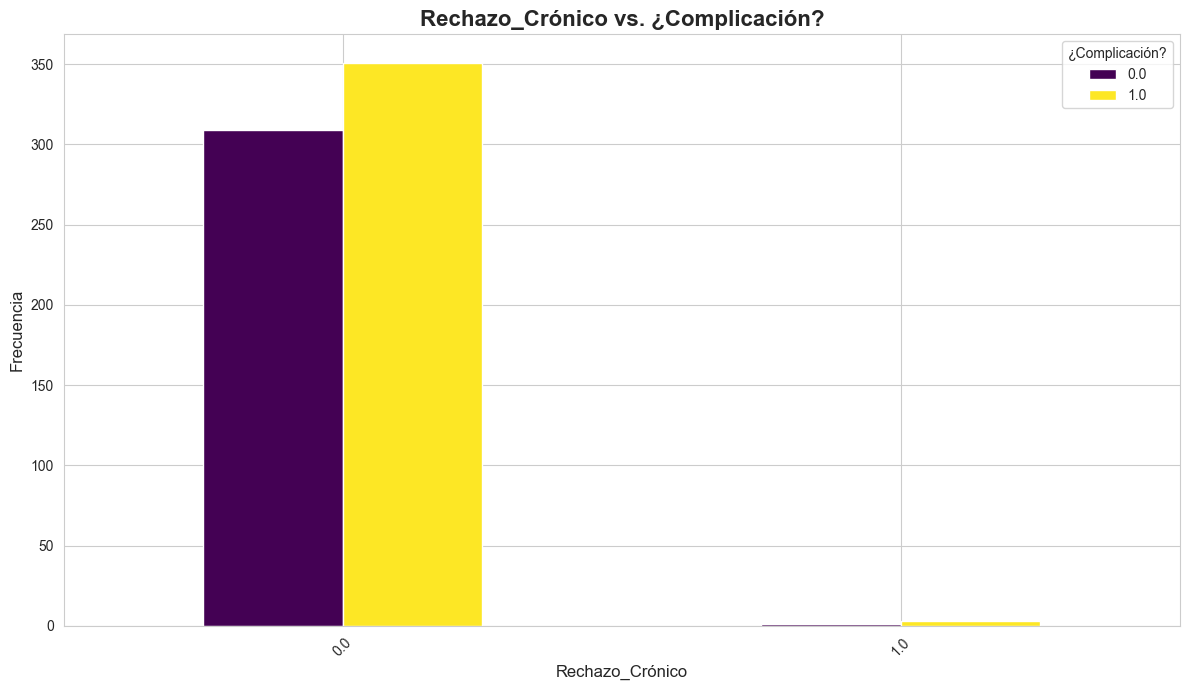


📈 Resultados de Chi-cuadrado:
   Chi² = 0.1365
   p-valor = 0.7118
   Grados de libertad = 1

⚠️ Advertencia: 50.0% de celdas tienen frecuencia esperada < 5
   Los resultados pueden no ser confiables.

🔬 Prueba Exacta de Fisher (alternativa para muestras pequeñas):
   Odds Ratio = 2.6410
   p-valor (Fisher) = 0.6272

💡 Interpretación (Fisher):
   ✗ No significativo (p=0.6272 ≥ 0.05)
   No hay evidencia de asociación entre las variables

💡 Interpretación:
   ✗ No significativo (p=0.7118 ≥ 0.05)
   No hay evidencia de asociación entre las variables

Análisis CATEGÓRICO: 'Infección_POP' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?  0.0  1.0
Infección_POP           
0.0             209  195
1.0              53   96


<Figure size 1200x700 with 0 Axes>

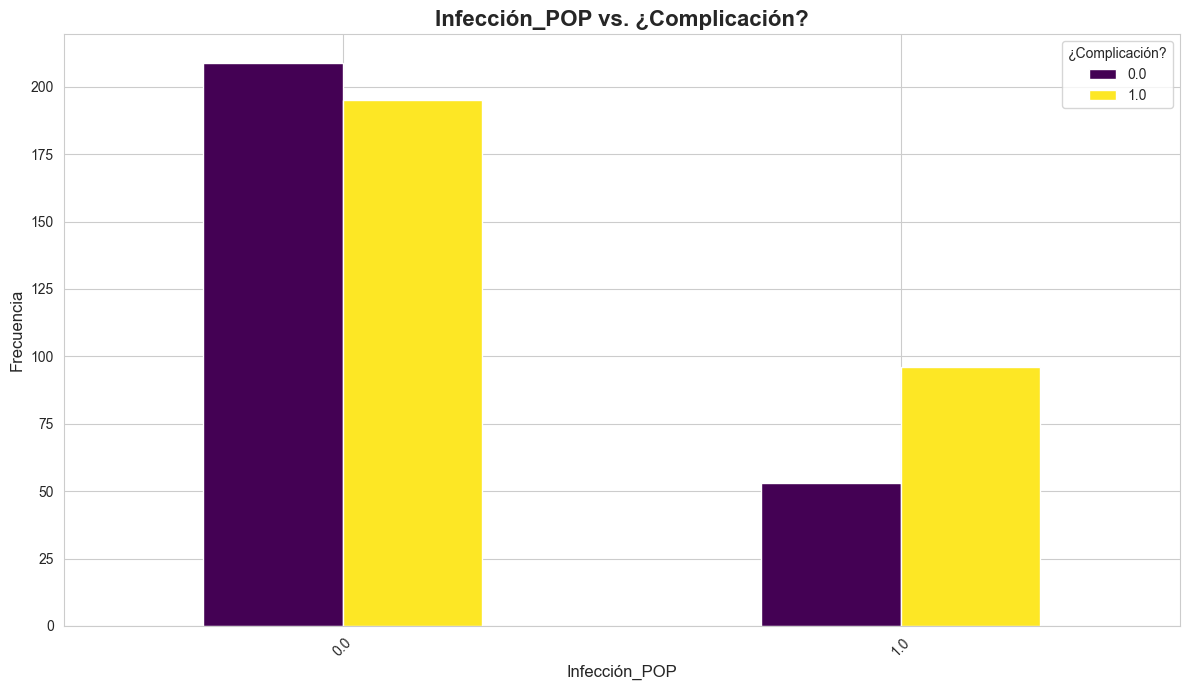


📈 Resultados de Chi-cuadrado:
   Chi² = 10.7661
   p-valor = 0.0010
   Grados de libertad = 1

💡 Interpretación:
   ✓ ASOCIACIÓN SIGNIFICATIVA (p=0.0010 < 0.05)
   Existe relación estadística entre 'Infección_POP' y '¿Complicación?'

Análisis CATEGÓRICO: 'Stent' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?  0.0  1.0
Stent                   
0.0             270  267
1.0              27   83


<Figure size 1200x700 with 0 Axes>

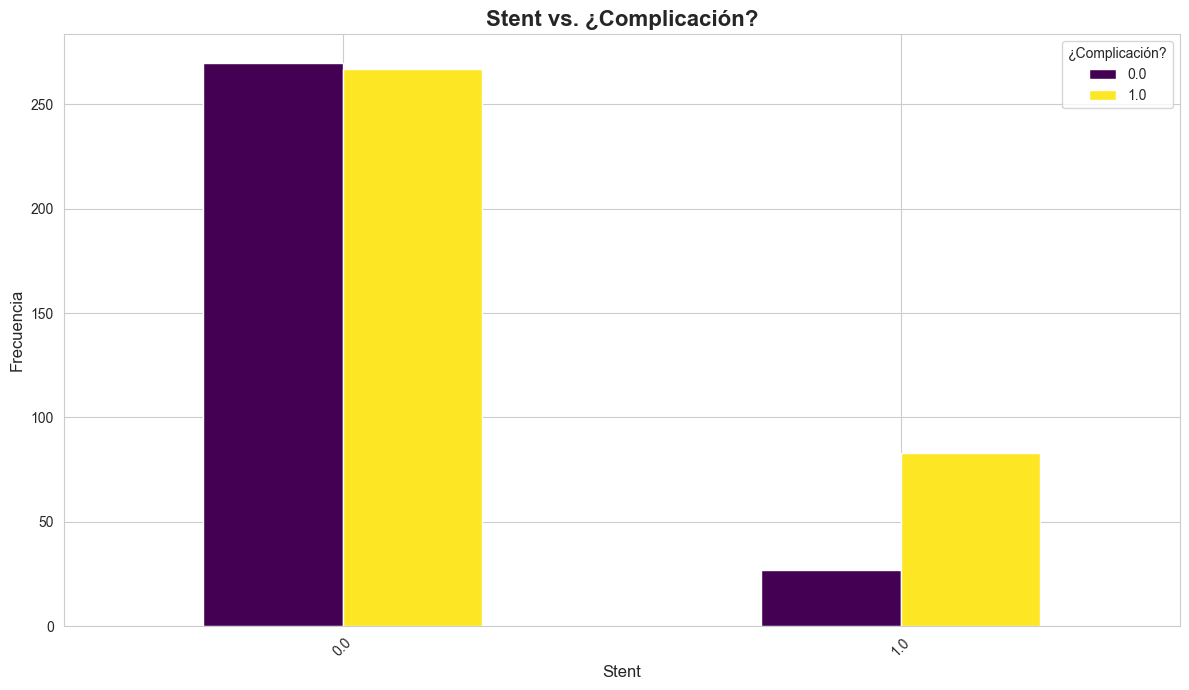


📈 Resultados de Chi-cuadrado:
   Chi² = 23.3224
   p-valor = 0.0000
   Grados de libertad = 1

💡 Interpretación:
   ✓ ASOCIACIÓN SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe relación estadística entre 'Stent' y '¿Complicación?'

Análisis CATEGÓRICO: 'Requirió_Reconstrucción_Biliar' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?                  0.0  1.0
Requirió_Reconstrucción_Biliar          
0.0                             290  328
1.0                               7   22


<Figure size 1200x700 with 0 Axes>

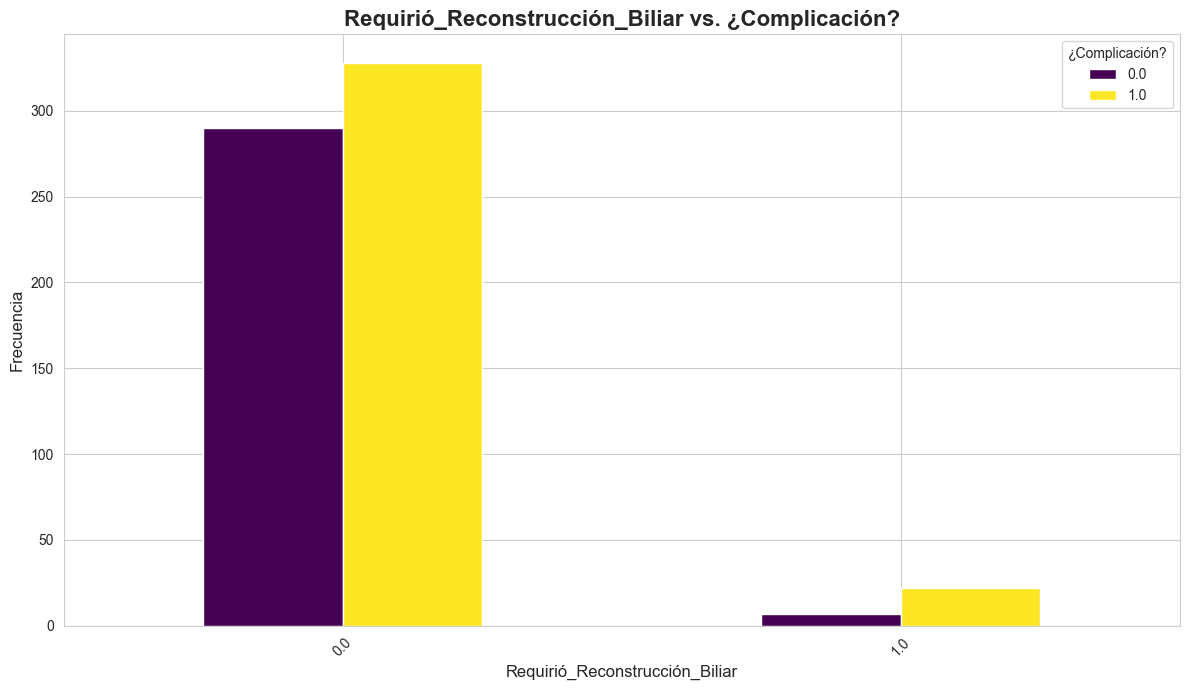


📈 Resultados de Chi-cuadrado:
   Chi² = 4.9112
   p-valor = 0.0267
   Grados de libertad = 1

💡 Interpretación:
   ✓ ASOCIACIÓN SIGNIFICATIVA (p=0.0267 < 0.05)
   Existe relación estadística entre 'Requirió_Reconstrucción_Biliar' y '¿Complicación?'

Análisis CATEGÓRICO: 'Profilaxis_Antitrombótica' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?             0.0  1.0
Profilaxis_Antitrombótica          
0.0                          6   20
1.0                        247  254


<Figure size 1200x700 with 0 Axes>

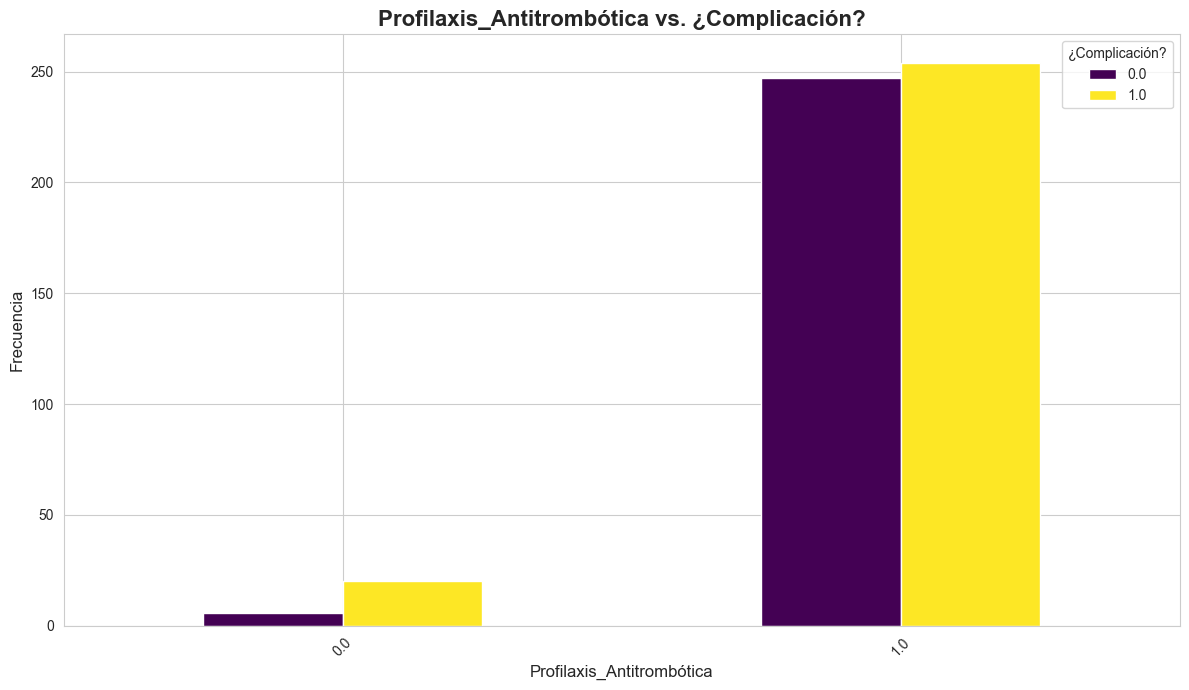


📈 Resultados de Chi-cuadrado:
   Chi² = 5.8001
   p-valor = 0.0160
   Grados de libertad = 1

💡 Interpretación:
   ✓ ASOCIACIÓN SIGNIFICATIVA (p=0.0160 < 0.05)
   Existe relación estadística entre 'Profilaxis_Antitrombótica' y '¿Complicación?'

Análisis CATEGÓRICO: 'Fast_Track' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?  0.0  1.0
Fast_Track              
0.0             285  340
1.0              29   20


<Figure size 1200x700 with 0 Axes>

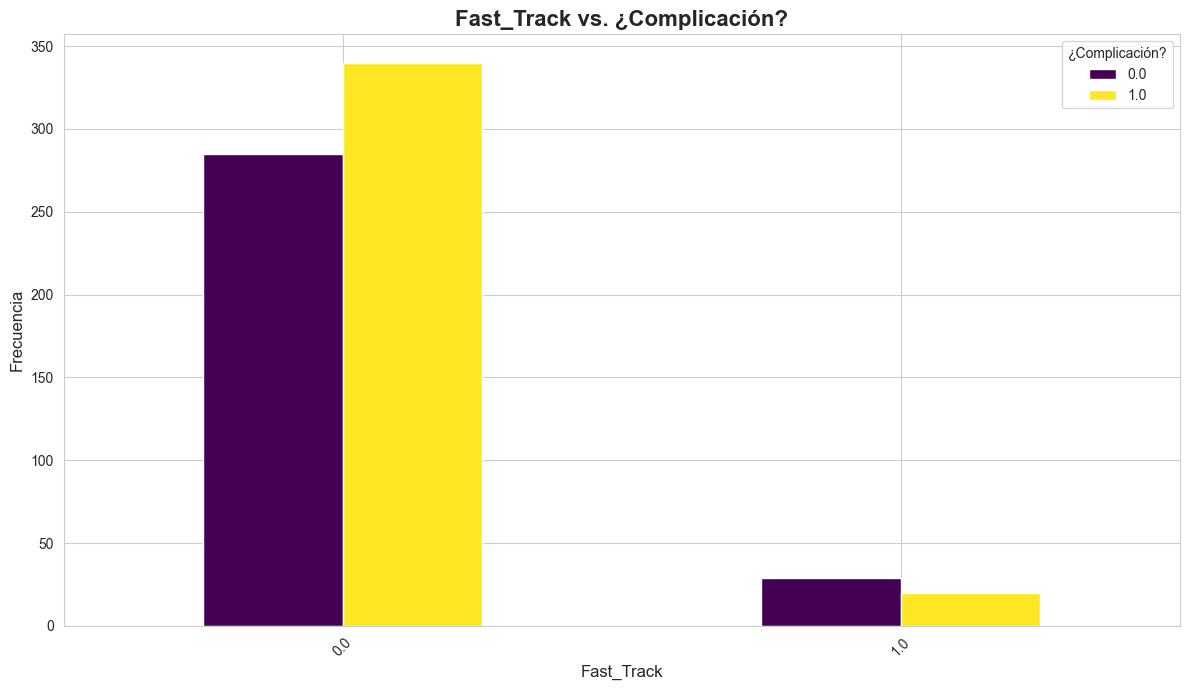


📈 Resultados de Chi-cuadrado:
   Chi² = 2.8455
   p-valor = 0.0916
   Grados de libertad = 1

💡 Interpretación:
   ✗ No significativo (p=0.0916 ≥ 0.05)
   No hay evidencia de asociación entre las variables


In [211]:
for variable in variables_categoricas:
    print(f"\n{'='*60}")
    print(f"Análisis CATEGÓRICO: '{variable}' vs. '{variable_objetivo}'")
    print(f"{'='*60}")

    if variable not in df.columns or variable_objetivo not in df.columns:
        print(f"⚠️ Columna '{variable}' o '{variable_objetivo}' no encontrada. Omitiendo.")
        continue

    df_limpio = df[[variable, variable_objetivo]].dropna()

    if df_limpio.empty:
        print("⚠️ No hay datos válidos después de eliminar valores nulos.")
        continue

    tabla_contingencia = pd.crosstab(df_limpio[variable], df_limpio[variable_objetivo])

    if tabla_contingencia.shape[0] < 2 or tabla_contingencia.shape[1] < 2:
        print("⚠️ Tabla de contingencia insuficiente (necesita al menos 2x2).")
        continue

    print("\n📊 Tabla de Contingencia:")
    print(tabla_contingencia)

    plt.figure()
    tabla_contingencia.plot(kind='bar', rot=45, colormap='viridis')
    plt.title(f'{variable} vs. {variable_objetivo}', fontsize=16, fontweight='bold')
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(title=variable_objetivo, title_fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close()

    try:
        chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

        celdas_invalidas = (expected < 5).sum()
        porcentaje_invalido = (celdas_invalidas / expected.size) * 100

        print("\n📈 Resultados de Chi-cuadrado:")
        print(f"   Chi² = {chi2:.4f}")
        print(f"   p-valor = {p_value:.4f}")
        print(f"   Grados de libertad = {dof}")

        if porcentaje_invalido > 20:
            print(f"\n⚠️ Advertencia: {porcentaje_invalido:.1f}% de celdas tienen frecuencia esperada < 5")
            print("   Los resultados pueden no ser confiables.")

            # Realizar prueba de Fisher si es tabla 2x2
            if tabla_contingencia.shape == (2, 2):
                try:
                    oddsratio, fisher_p = fisher_exact(tabla_contingencia)
                    print("\n🔬 Prueba Exacta de Fisher (alternativa para muestras pequeñas):")
                    print(f"   Odds Ratio = {oddsratio:.4f}")
                    print(f"   p-valor (Fisher) = {fisher_p:.4f}")

                    alpha = 0.05
                    print("\n💡 Interpretación (Fisher):")
                    if fisher_p < alpha:
                        print(f"   ✓ ASOCIACIÓN SIGNIFICATIVA (p={fisher_p:.4f} < {alpha})")
                        print(f"   Existe relación estadística entre '{variable}' y '{variable_objetivo}'")
                    else:
                        print(f"   ✗ No significativo (p={fisher_p:.4f} ≥ {alpha})")
                        print(f"   No hay evidencia de asociación entre las variables")
                except Exception as e:
                    print(f"\n❌ Error en Prueba de Fisher: {e}")
            else:
                print("   ℹ️ Prueba de Fisher solo disponible para tablas 2x2.")

        alpha = 0.05
        print("\n💡 Interpretación:")
        if p_value < alpha:
            print(f"   ✓ ASOCIACIÓN SIGNIFICATIVA (p={p_value:.4f} < {alpha})")
            print(f"   Existe relación estadística entre '{variable}' y '{variable_objetivo}'")
        else:
            print(f"   ✗ No significativo (p={p_value:.4f} ≥ {alpha})")
            print(f"   No hay evidencia de asociación entre las variables")
    except Exception as e:
        print(f"\n❌ Error en Chi-cuadrado: {e}")

### Variables ordinales


Análisis ORDINAL: 'Tipo_De_Complicación_1' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?          0.0  1.0
Tipo_De_Complicación_1          
0.0                     199   57
1.0                       0   69
2.0                       0   12
3.0                       0   18
4.0                       0   35
5.0                       0   16
6.0                       0    5
7.0                       0    3
8.0                       0    2
9.0                       0   23
11.0                      0    1
12.0                      0    1
13.0                      0    1
14.0                      0    8
15.0                      0   30
16.0                      0    1
17.0                      0    3
18.0                      0   16
19.0                      0    3
20.0                      0    2
21.0                      0    2
22.0                      0    4
24.0                      0    3
25.0                      0    2
26.0                      0    2
27.0              

<Figure size 1200x700 with 0 Axes>

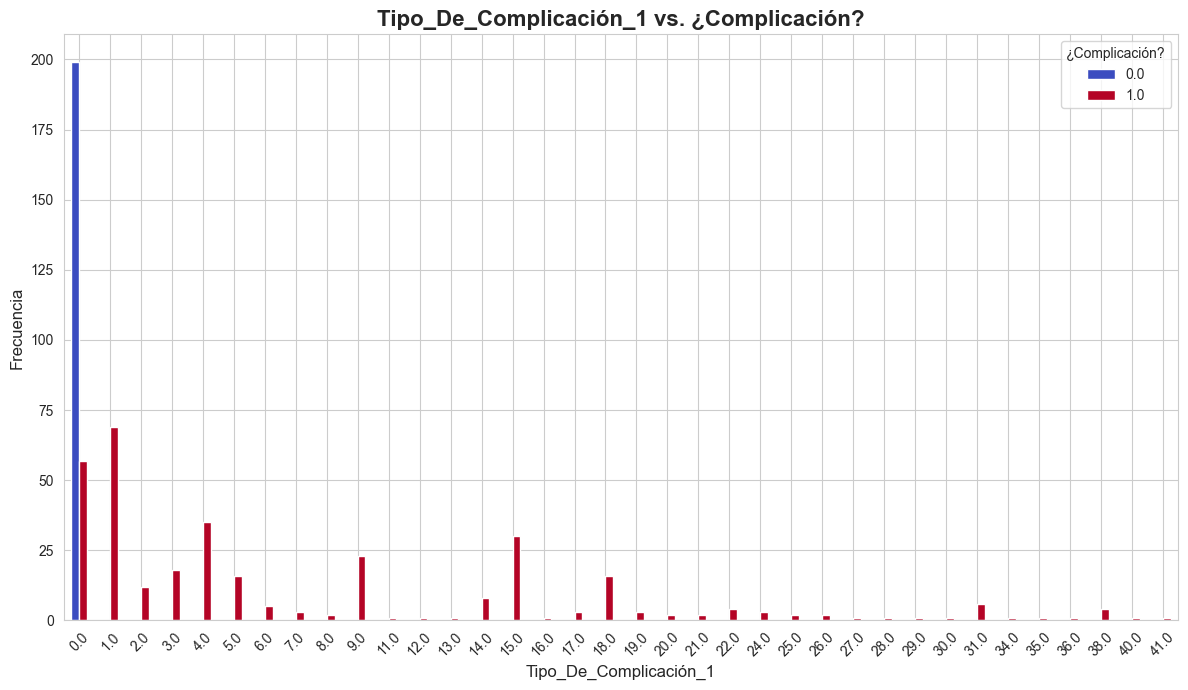


📈 Resultados de Chi-cuadrado:
   Chi² = 347.0380
   p-valor = 0.0000
   Grados de libertad = 35

⚠️ Advertencia: 75.0% de celdas tienen frecuencia esperada < 5
   ℹ️ Prueba de Fisher solo disponible para tablas 2x2.

💡 Interpretación:
   ✓ ASOCIACIÓN SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe relación estadística entre 'Tipo_De_Complicación_1' y '¿Complicación?'

Análisis ORDINAL: 'Severidad_Rechazo_Agudo' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?           0.0  1.0
Severidad_Rechazo_Agudo          
0.0                      250  269
1.0                        6   10
2.0                       34   53
3.0                       14   14
4.0                        1    0


<Figure size 1200x700 with 0 Axes>

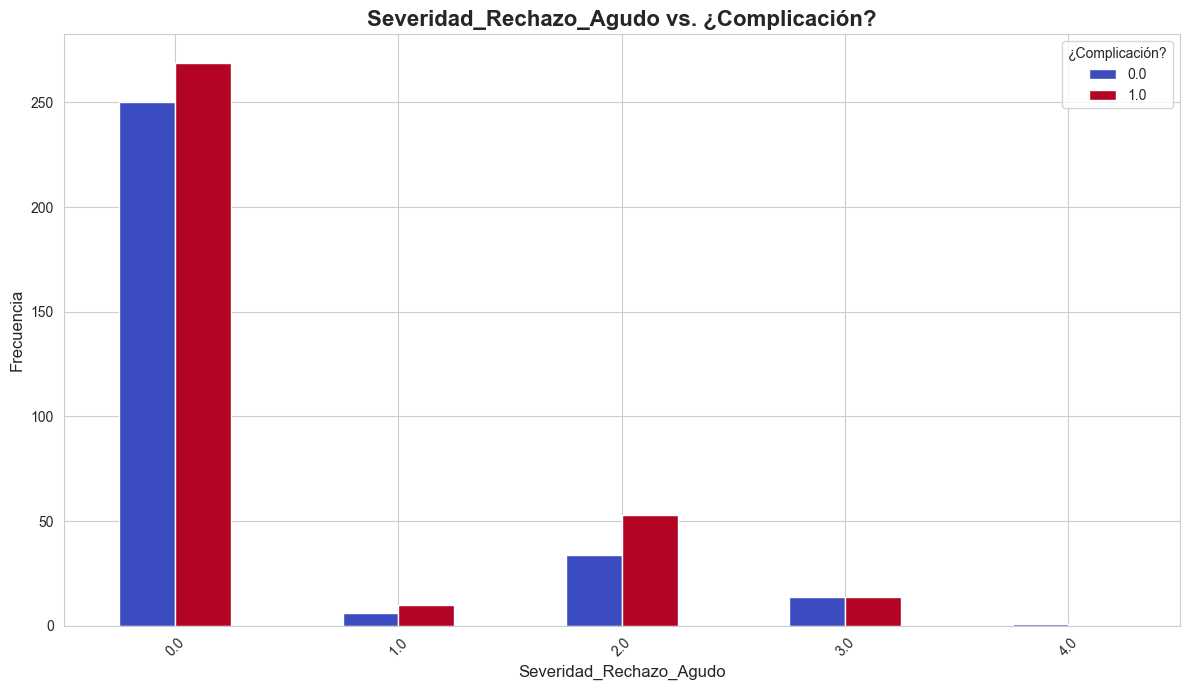


📈 Resultados de Chi-cuadrado:
   Chi² = 4.2798
   p-valor = 0.3695
   Grados de libertad = 4

💡 Interpretación:
   ✗ No significativo (p=0.3695 ≥ 0.05)
   No hay evidencia de asociación entre las variables

Análisis ORDINAL: 'Tipo_Infección_1' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?    0.0  1.0
Tipo_Infección_1          
0.0                28   70
1.0                 3   14
2.0                23   27
3.0                 3   11
4.0                 1    2
5.0                 5    5
6.0                 1    3
7.0                 1    1
8.0                 6    4
9.0                 0    1
10.0                6   16
11.0                0    8
13.0                0    1
16.0                2    0
17.0                0    1
18.0                1    1
19.0                1    1


<Figure size 1200x700 with 0 Axes>

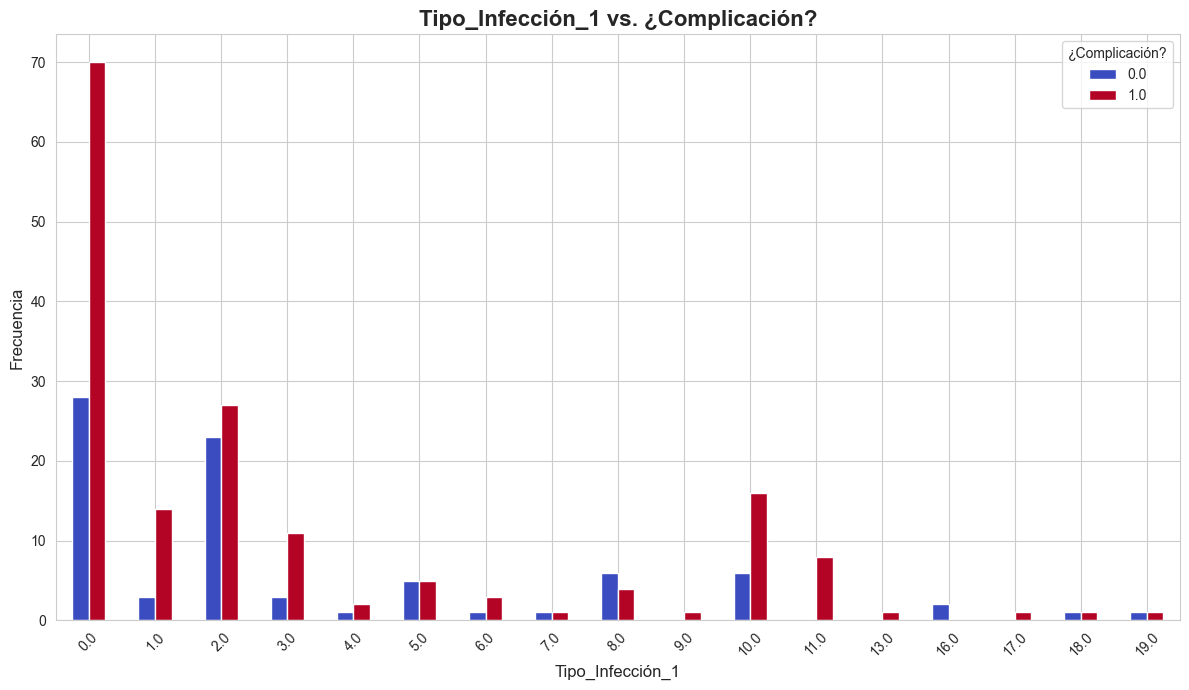


📈 Resultados de Chi-cuadrado:
   Chi² = 22.7285
   p-valor = 0.1212
   Grados de libertad = 16

⚠️ Advertencia: 64.7% de celdas tienen frecuencia esperada < 5
   ℹ️ Prueba de Fisher solo disponible para tablas 2x2.

💡 Interpretación:
   ✗ No significativo (p=0.1212 ≥ 0.05)
   No hay evidencia de asociación entre las variables

Análisis ORDINAL: 'Germen_1' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?  0.0  1.0
Germen_1                
0.0              28   56
1.0               6   19
2.0               1    3
3.0               2    2
4.0               1    0
6.0               1    1
7.0              12   15
8.0               0    1
9.0               0    1
10.0              3    3
12.0              1    1
14.0              5    1
16.0              0    6
17.0              6    2
18.0              0    1
19.0              2    0
22.0              1    0
23.0              1    1
24.0              0    2
26.0              0    2
27.0              0    1
28.0              1

<Figure size 1200x700 with 0 Axes>

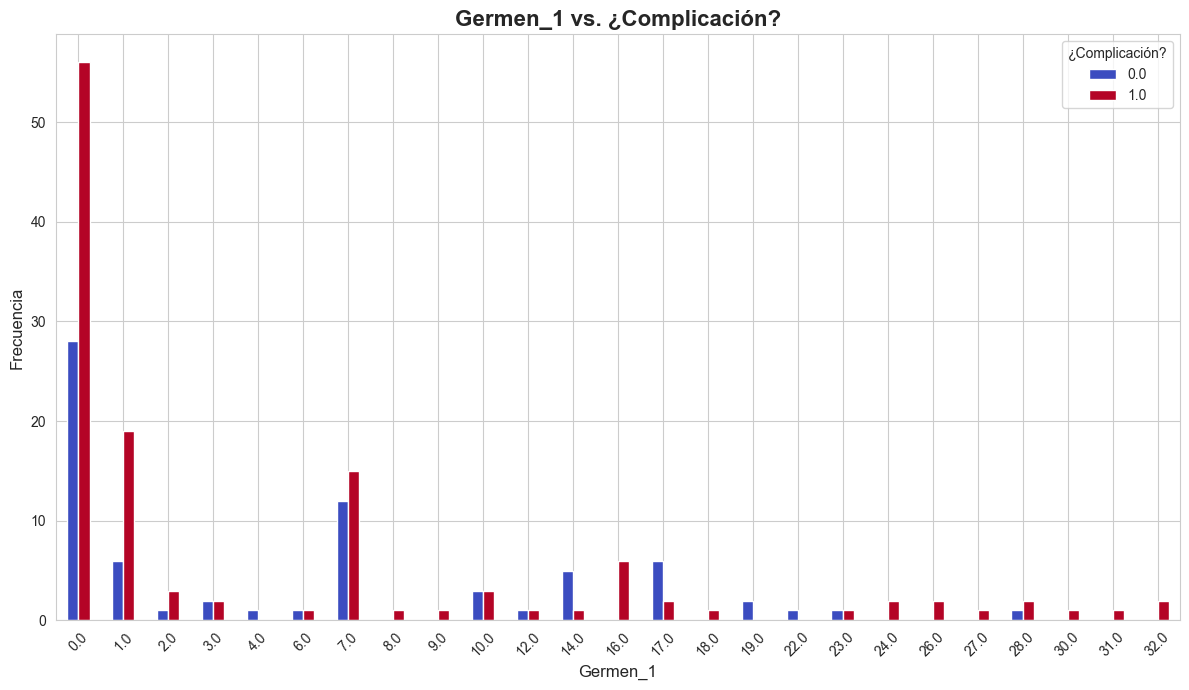


📈 Resultados de Chi-cuadrado:
   Chi² = 32.4162
   p-valor = 0.1170
   Grados de libertad = 24

⚠️ Advertencia: 86.0% de celdas tienen frecuencia esperada < 5
   ℹ️ Prueba de Fisher solo disponible para tablas 2x2.

💡 Interpretación:
   ✗ No significativo (p=0.1170 ≥ 0.05)
   No hay evidencia de asociación entre las variables

Análisis ORDINAL: '#_De_Complicaciones' vs. '¿Complicación?'

📊 Tabla de Contingencia:
¿Complicación?       0.0  1.0
#_De_Complicaciones          
0.0                   47   80
1.0                   86   53
2.0                   73  122
3.0                    0    1
4.0                    0   10
5.0                    0    2
8.0                    0    2
9.0                    0    1
18.0                   0    6
19.0                   0    1
20.0                   0    2
32.0                   0    1
33.0                   0    1
34.0                   0    1
37.0                   0    1


<Figure size 1200x700 with 0 Axes>

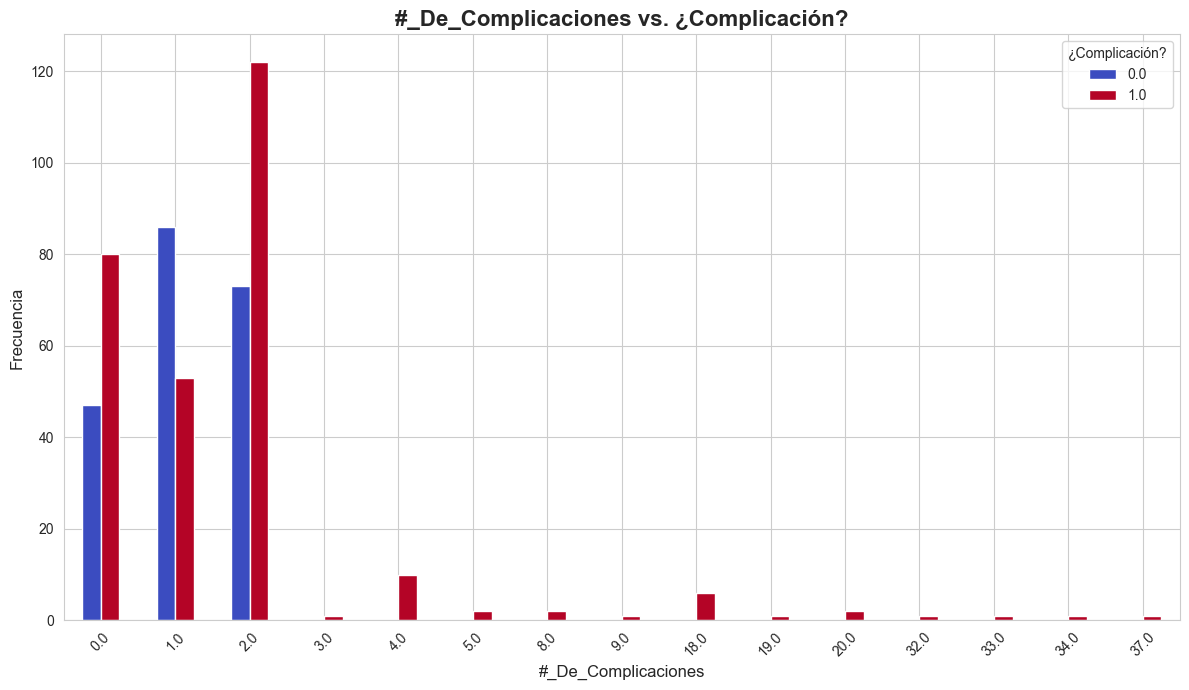


📈 Resultados de Chi-cuadrado:
   Chi² = 46.4837
   p-valor = 0.0000
   Grados de libertad = 14

⚠️ Advertencia: 76.7% de celdas tienen frecuencia esperada < 5
   ℹ️ Prueba de Fisher solo disponible para tablas 2x2.

💡 Interpretación:
   ✓ ASOCIACIÓN SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe relación estadística entre '#_De_Complicaciones' y '¿Complicación?'


In [212]:

for variable in variables_ordinales:
    print(f"\n{'='*60}")
    print(f"Análisis ORDINAL: '{variable}' vs. '{variable_objetivo}'")
    print(f"{'='*60}")

    if variable not in df.columns or variable_objetivo not in df.columns:
        print(f"⚠️ Columna '{variable}' o '{variable_objetivo}' no encontrada. Omitiendo.")
        continue

    df_limpio = df[[variable, variable_objetivo]].dropna()

    if df_limpio.empty:
        print("⚠️ No hay datos válidos después de eliminar valores nulos.")
        continue

    if len(df_limpio[variable_objetivo].unique()) < 2:
        print("⚠️ No hay suficiente variabilidad en la variable objetivo.")
        continue

    tabla_contingencia = pd.crosstab(df_limpio[variable], df_limpio[variable_objetivo])

    if tabla_contingencia.shape[0] < 2 or tabla_contingencia.shape[1] < 2:
        print("⚠️ Tabla de contingencia insuficiente.")
        continue

    print("\n📊 Tabla de Contingencia:")
    print(tabla_contingencia)

    plt.figure()
    tabla_contingencia.plot(kind='bar', rot=45, colormap='coolwarm')
    plt.title(f'{variable} vs. {variable_objetivo}', fontsize=16, fontweight='bold')
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(title=variable_objetivo, title_fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close()

    try:
        chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

        celdas_invalidas = (expected < 5).sum()
        porcentaje_invalido = (celdas_invalidas / expected.size) * 100

        print("\n📈 Resultados de Chi-cuadrado:")
        print(f"   Chi² = {chi2:.4f}")
        print(f"   p-valor = {p_value:.4f}")
        print(f"   Grados de libertad = {dof}")

        if porcentaje_invalido > 20:
            print(f"\n⚠️ Advertencia: {porcentaje_invalido:.1f}% de celdas tienen frecuencia esperada < 5")

            # Realizar prueba de Fisher si es tabla 2x2
            if tabla_contingencia.shape == (2, 2):
                try:
                    oddsratio, fisher_p = fisher_exact(tabla_contingencia)
                    print("\n🔬 Prueba Exacta de Fisher (alternativa para muestras pequeñas):")
                    print(f"   Odds Ratio = {oddsratio:.4f}")
                    print(f"   p-valor (Fisher) = {fisher_p:.4f}")

                    alpha = 0.05
                    print("\n💡 Interpretación (Fisher):")
                    if fisher_p < alpha:
                        print(f"   ✓ ASOCIACIÓN SIGNIFICATIVA (p={fisher_p:.4f} < {alpha})")
                        print(f"   Existe relación estadística entre '{variable}' y '{variable_objetivo}'")
                    else:
                        print(f"   ✗ No significativo (p={fisher_p:.4f} ≥ {alpha})")
                        print(f"   No hay evidencia de asociación entre las variables")
                except Exception as e:
                    print(f"\n❌ Error en Prueba de Fisher: {e}")
            else:
                print("   ℹ️ Prueba de Fisher solo disponible para tablas 2x2.")

        alpha = 0.05
        print("\n💡 Interpretación:")
        if p_value < alpha:
            print(f"   ✓ ASOCIACIÓN SIGNIFICATIVA (p={p_value:.4f} < {alpha})")
            print(f"   Existe relación estadística entre '{variable}' y '{variable_objetivo}'")
        else:
            print(f"   ✗ No significativo (p={p_value:.4f} ≥ {alpha})")
            print(f"   No hay evidencia de asociación entre las variables")
    except Exception as e:
        print(f"\n❌ Error en Chi-cuadrado: {e}")

### Fechas


📊 Rango de fechas en Fecha_Egreso_UCI:
   Mínima: 2004-08-14 00:00:00
   Máxima: 2025-03-05 00:00:00
   Total registros: 100


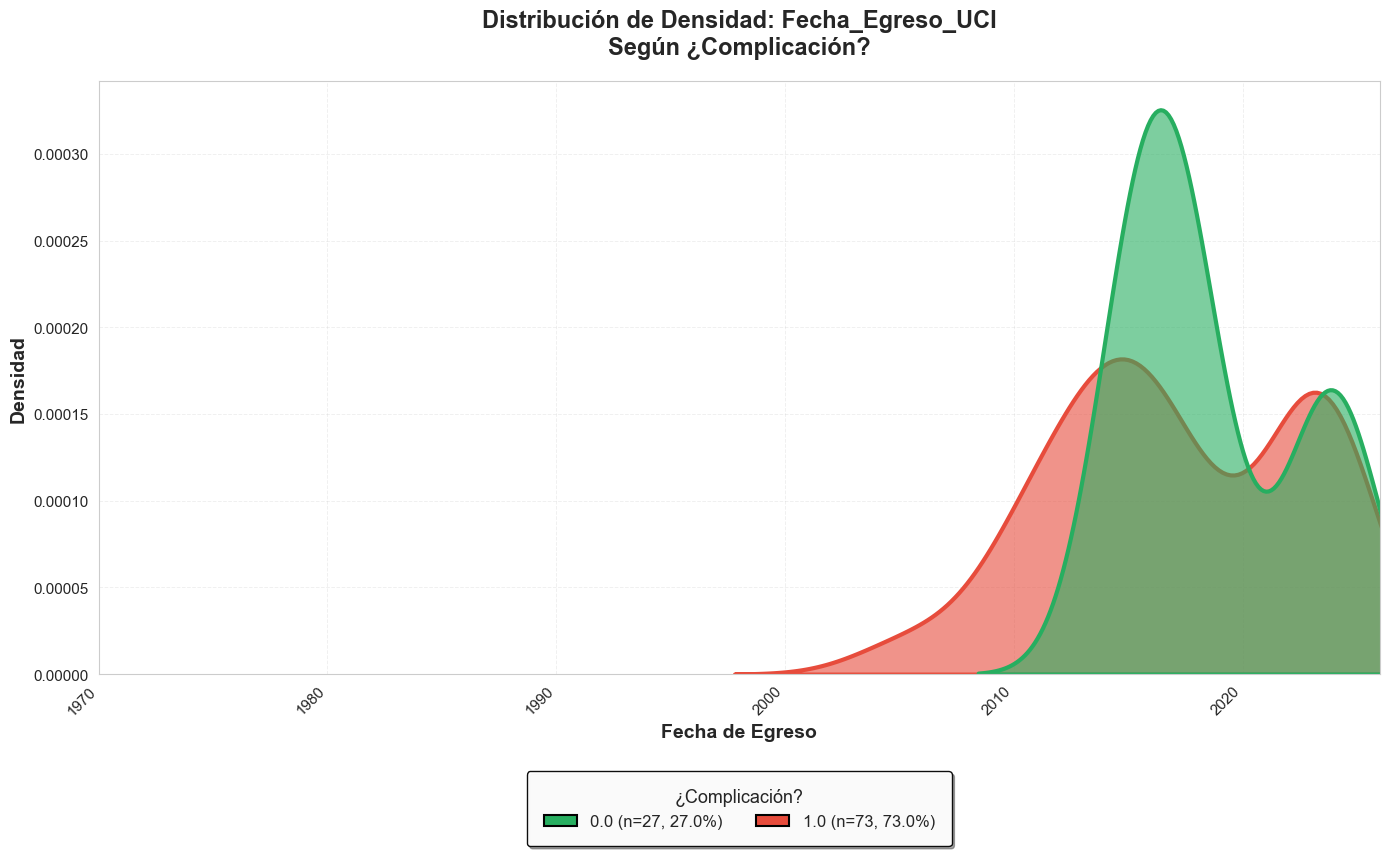


📊 Rango de fechas en Fecha_Egreso_Hospitalario:
   Mínima: 2004-08-14 00:00:00
   Máxima: 2025-03-13 00:00:00
   Total registros: 137


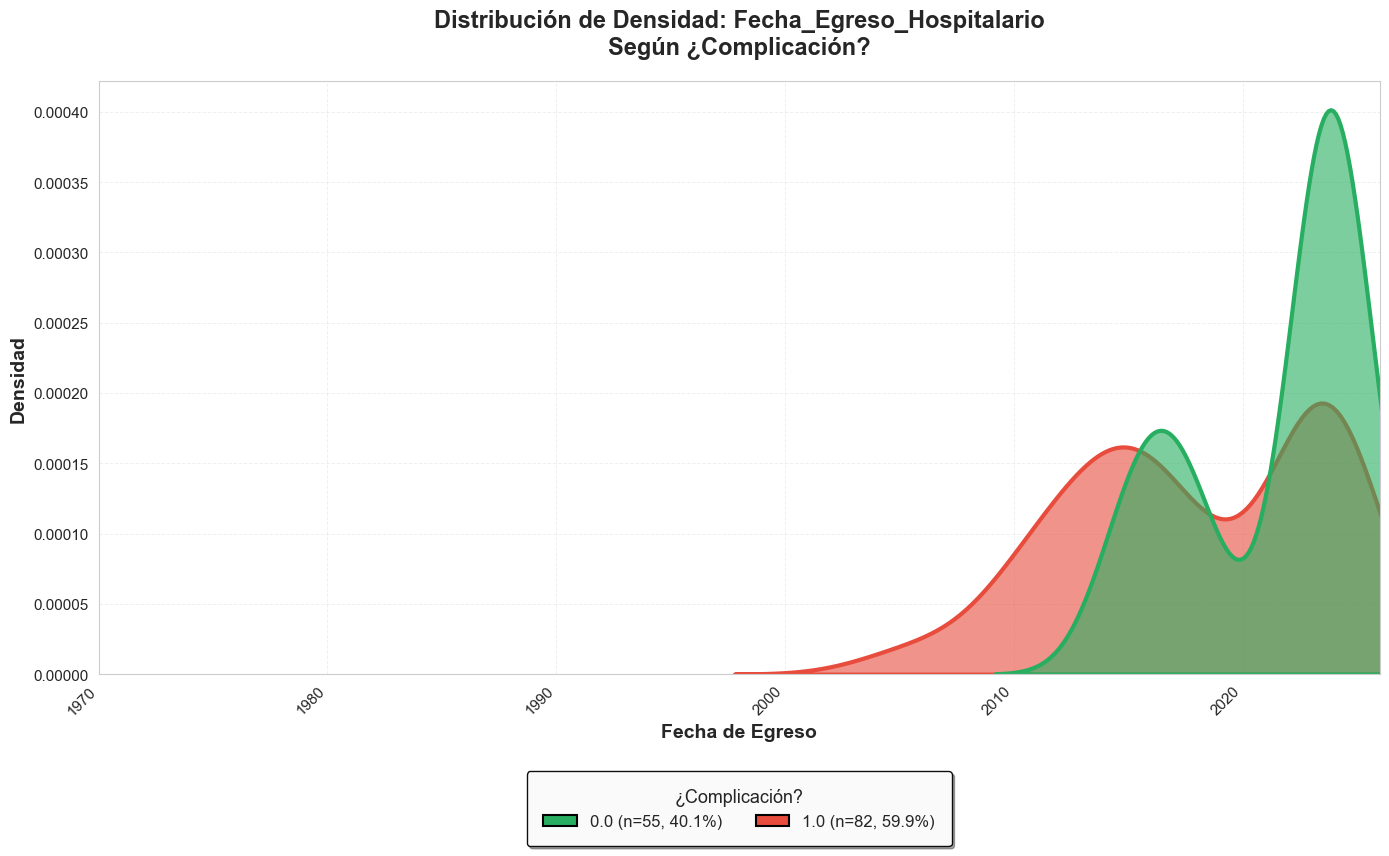

In [214]:
from matplotlib.patches import Patch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 9)

variables_fechas = [
    'Fecha_Egreso_UCI', 'Fecha_Egreso_Hospitalario'
]

variable_objetivo = '¿Complicación?'

colores_personalizados = ['#27ae60', '#e74c3c', '#3498db', '#f39c12']
palette = sns.color_palette(colores_personalizados)

for variable in variables_fechas:

    if variable not in df.columns or variable_objetivo not in df.columns:
        print(f"⚠️ Columna no encontrada.")
        continue

    df_plot = df[[variable, variable_objetivo]].copy()
    df_plot[variable] = pd.to_datetime(df_plot[variable], errors='coerce')
    df_plot.dropna(inplace=True)

    fecha_minima = pd.Timestamp('1970-01-01')
    fecha_maxima = pd.Timestamp('2025-12-31')
    df_plot = df_plot[
        (df_plot[variable] >= fecha_minima) &
        (df_plot[variable] <= fecha_maxima)
    ]

    if df_plot.empty:
        print("⚠️ No hay datos válidos después de filtrar.")
        continue

    print(f"\n📊 Rango de fechas en {variable}:")
    print(f"   Mínima: {df_plot[variable].min()}")
    print(f"   Máxima: {df_plot[variable].max()}")
    print(f"   Total registros: {len(df_plot)}")

    categorias = sorted(df_plot[variable_objetivo].unique())
    palette_ajustada = palette[:len(categorias)]

    fig, ax = plt.subplots(figsize=(14, 8))

    sns.kdeplot(
        data=df_plot,
        x=variable,
        hue=variable_objetivo,
        fill=True,
        common_norm=False,
        alpha=0.6,
        linewidth=3,
        palette=palette_ajustada,
        ax=ax
    )

    legend_elements = []
    for i, cat in enumerate(categorias):
        count = (df_plot[variable_objetivo] == cat).sum()
        pct = (count / len(df_plot)) * 100
        legend_elements.append(
            Patch(
                facecolor=palette_ajustada[i],
                edgecolor='black',
                linewidth=1.5,
                label=f'{cat} (n={count}, {pct:.1f}%)'
            )
        )

    ax.legend(
        handles=legend_elements,
        title=f'{variable_objetivo}',
        title_fontsize=13,
        fontsize=12,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=len(categorias),
        frameon=True,
        shadow=True,
        fancybox=True,
        framealpha=0.95,
        edgecolor='black',
        borderpad=1
    )

    plt.title(
        f'Distribución de Densidad: {variable}\nSegún {variable_objetivo}',
        fontsize=17,
        fontweight='bold',
        pad=20
    )
    plt.xlabel('Fecha de Egreso', fontsize=14, fontweight='bold')
    plt.ylabel('Densidad', fontsize=14, fontweight='bold')

    ax.set_xlim(fecha_minima, fecha_maxima)

    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)

    plt.show()
    plt.close()

En la variable "Fecha_Egreso_UCI", entre los años 2010 y 2025, se observa una mayor cantidad de casos de complicaciones.

### Variables de tiempo


📊 Estadísticas Descriptivas:
   Sin complicación (n=174): Media=7.01, DE=6.45
   Con complicación (n=214): Media=8.43, DE=7.90


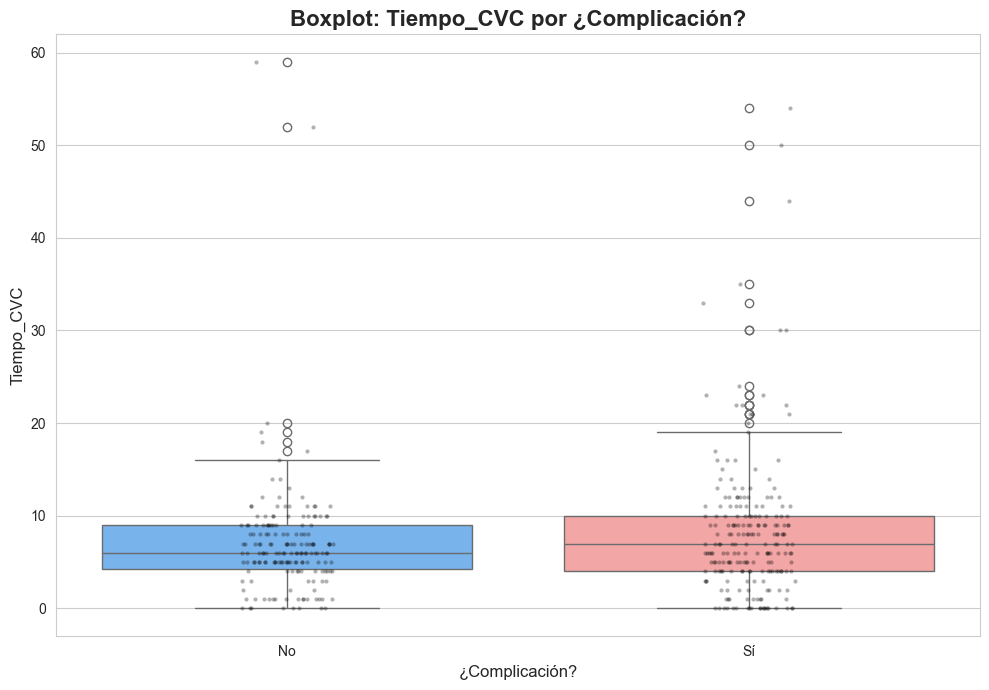


📈 Resultados de la Prueba T:
   Estadístico T: 1.9086
   P-valor: 0.0571

💡 Interpretación:
   ✗ No significativo (p=0.0571 ≥ 0.05)
   No hay evidencia de diferencia significativa en 'Tiempo_CVC' entre grupos.

📊 Estadísticas Descriptivas:
   Sin complicación (n=241): Media=6.67, DE=8.40
   Con complicación (n=228): Media=6.46, DE=9.25


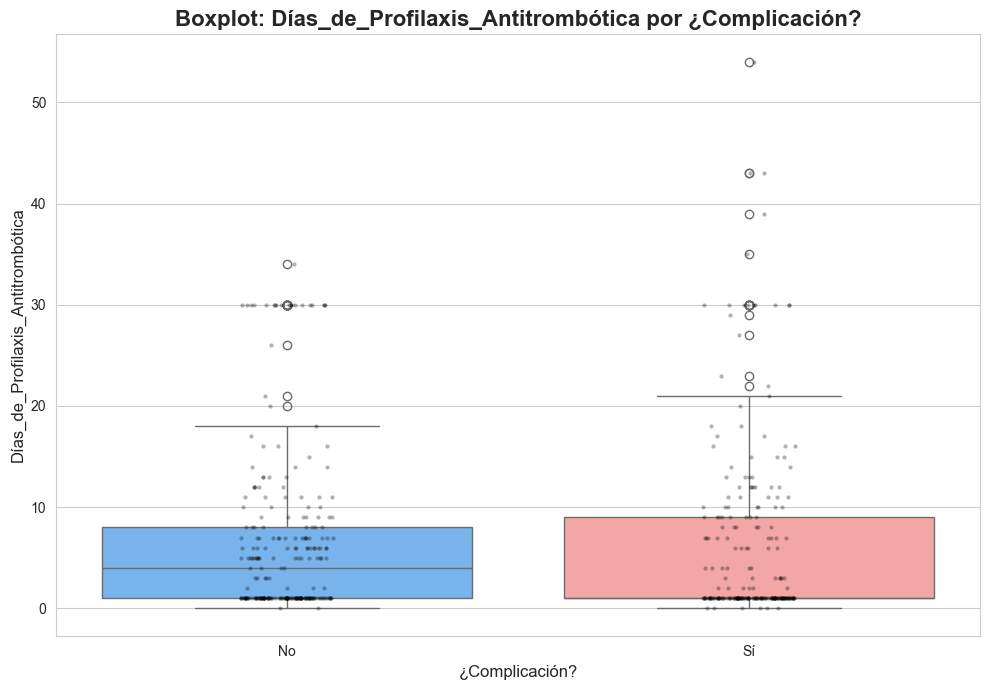


📈 Resultados de la Prueba T:
   Estadístico T: -0.2547
   P-valor: 0.7991

💡 Interpretación:
   ✗ No significativo (p=0.7991 ≥ 0.05)
   No hay evidencia de diferencia significativa en 'Días_de_Profilaxis_Antitrombótica' entre grupos.

📊 Estadísticas Descriptivas:
   Sin complicación (n=314): Media=2.51, DE=2.68
   Con complicación (n=361): Media=6.51, DE=11.23


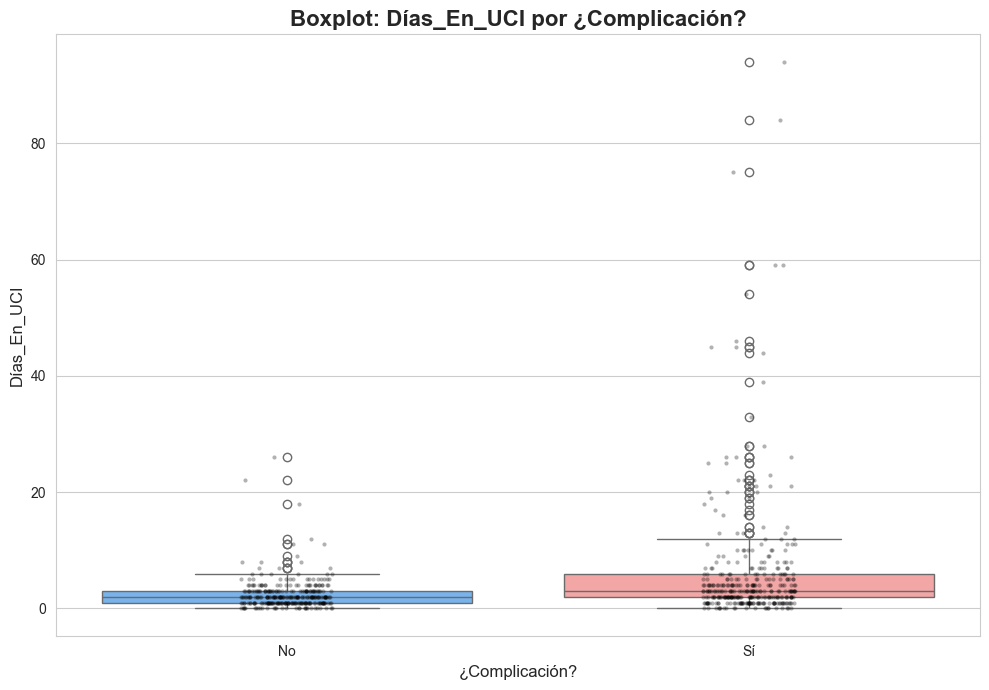


📈 Resultados de la Prueba T:
   Estadístico T: 6.1655
   P-valor: 0.0000

💡 Interpretación:
   ✓ DIFERENCIA SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe diferencia estadísticamente significativa en 'Días_En_UCI' entre grupos.

📊 Estadísticas Descriptivas:
   Sin complicación (n=313): Media=7.37, DE=5.36
   Con complicación (n=361): Media=10.52, DE=11.73


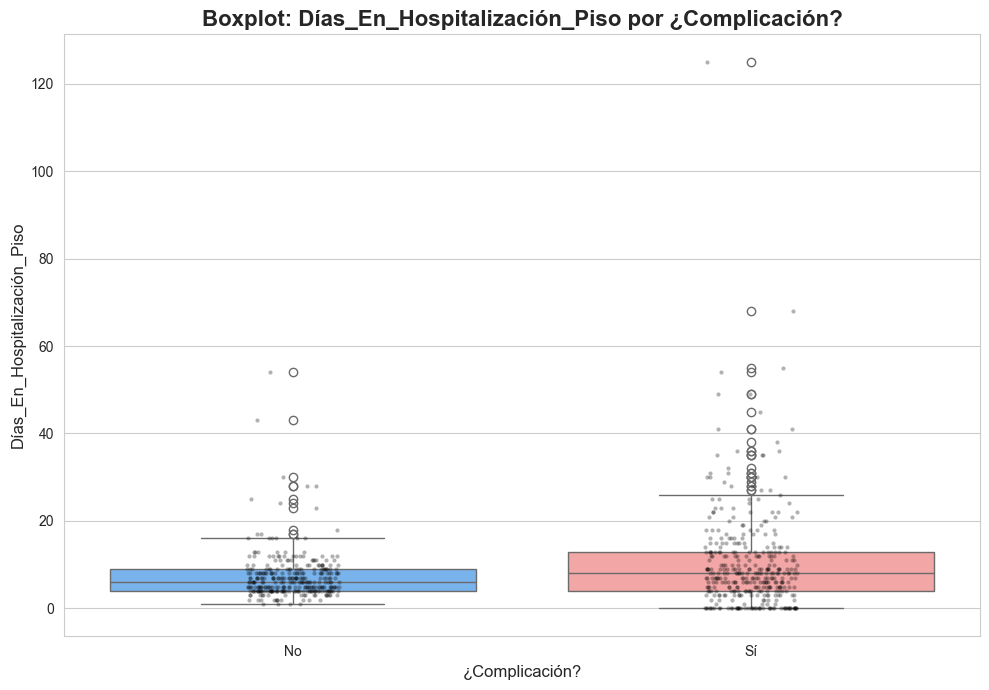


📈 Resultados de la Prueba T:
   Estadístico T: 4.3772
   P-valor: 0.0000

💡 Interpretación:
   ✓ DIFERENCIA SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe diferencia estadísticamente significativa en 'Días_En_Hospitalización_Piso' entre grupos.

📊 Estadísticas Descriptivas:
   Sin complicación (n=313): Media=9.74, DE=6.84
   Con complicación (n=361): Media=16.55, DE=16.69


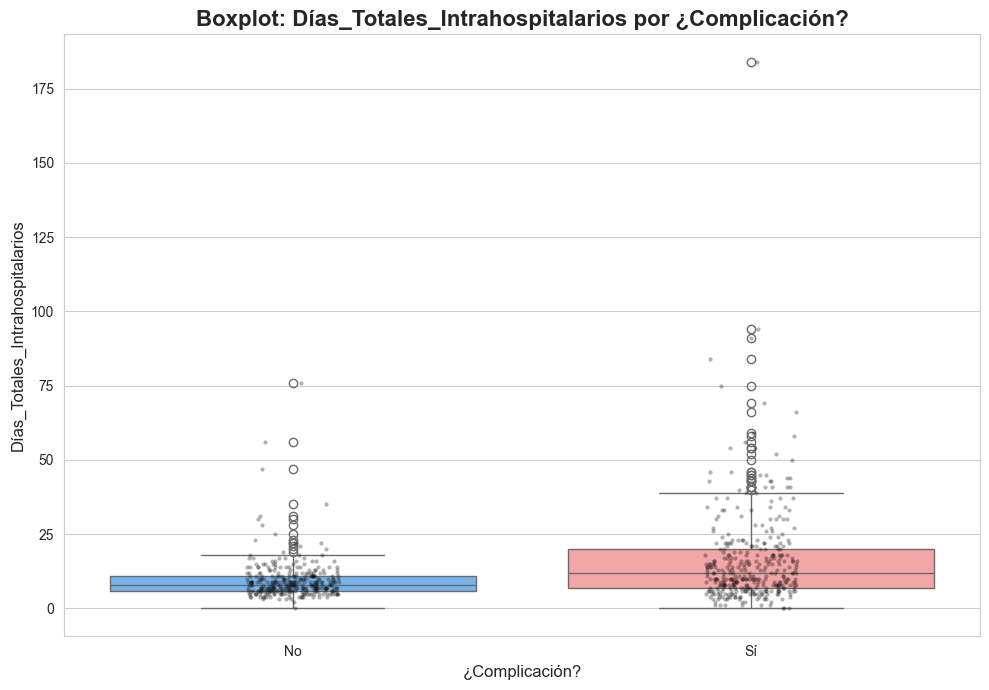


📈 Resultados de la Prueba T:
   Estadístico T: 6.7415
   P-valor: 0.0000

💡 Interpretación:
   ✓ DIFERENCIA SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe diferencia estadísticamente significativa en 'Días_Totales_Intrahospitalarios' entre grupos.


In [217]:
from scipy.stats import ttest_ind

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 7)


variables_cuantitativas = [
    'Tiempo_CVC', 'Días_de_Profilaxis_Antitrombótica',
    'Días_En_UCI', 'Días_En_Hospitalización_Piso', 'Días_Totales_Intrahospitalarios'
]

variable_objetivo = '¿Complicación?'

for variable in variables_cuantitativas:

    if variable not in df.columns or variable_objetivo not in df.columns:
        print(f"⚠️ Advertencia: Columna no encontrada. Omitiendo análisis.")
        continue

    df_limpio = df[[variable, variable_objetivo]].dropna().copy()
    df_limpio = df_limpio.reset_index(drop=True)

    if df_limpio.empty:
        print("⚠️ No hay datos válidos después de eliminar valores nulos.")
        continue

    grupo_con_complicacion = df_limpio[df_limpio[variable_objetivo] == 1][variable]
    grupo_sin_complicacion = df_limpio[df_limpio[variable_objetivo] == 0][variable]

    if grupo_con_complicacion.empty or grupo_sin_complicacion.empty:
        print("⚠️ Uno de los grupos está vacío. Omitiendo análisis.")
        continue

    print(f"\n📊 Estadísticas Descriptivas:")
    print(f"   Sin complicación (n={len(grupo_sin_complicacion)}): Media={grupo_sin_complicacion.mean():.2f}, DE={grupo_sin_complicacion.std():.2f}")
    print(f"   Con complicación (n={len(grupo_con_complicacion)}): Media={grupo_con_complicacion.mean():.2f}, DE={grupo_con_complicacion.std():.2f}")


    plt.figure(figsize=(10, 7))
    sns.boxplot(
        data=df_limpio,
        x=variable_objetivo,
        y=variable,
        hue=variable_objetivo,
        palette=['#66b3ff', '#ff9999'],
        legend=False
    )


    sns.stripplot(
        data=df_limpio,
        x=variable_objetivo,
        y=variable,
        color='black',
        alpha=0.3,
        jitter=True,
        size=3
    )

    plt.title(f'Boxplot: {variable} por {variable_objetivo}', fontsize=16, fontweight='bold')
    plt.xlabel(variable_objetivo, fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.xticks([0, 1], ['No', 'Sí'])
    plt.tight_layout()
    plt.show()
    plt.close()


    try:
        t_stat, p_value = ttest_ind(grupo_con_complicacion, grupo_sin_complicacion)

        print("\n📈 Resultados de la Prueba T:")
        print(f"   Estadístico T: {t_stat:.4f}")
        print(f"   P-valor: {p_value:.4f}")

        alpha = 0.05
        print("\n💡 Interpretación:")
        if p_value < alpha:
            print(f"   ✓ DIFERENCIA SIGNIFICATIVA (p={p_value:.4f} < {alpha})")
            print(f"   Existe diferencia estadísticamente significativa en '{variable}' entre grupos.")
        else:
            print(f"   ✗ No significativo (p={p_value:.4f} ≥ {alpha})")
            print(f"   No hay evidencia de diferencia significativa en '{variable}' entre grupos.")

    except Exception as e:
        print(f"\n❌ Error en Prueba T: {e}")

## Hepatocarcinoma vs Complicaciones

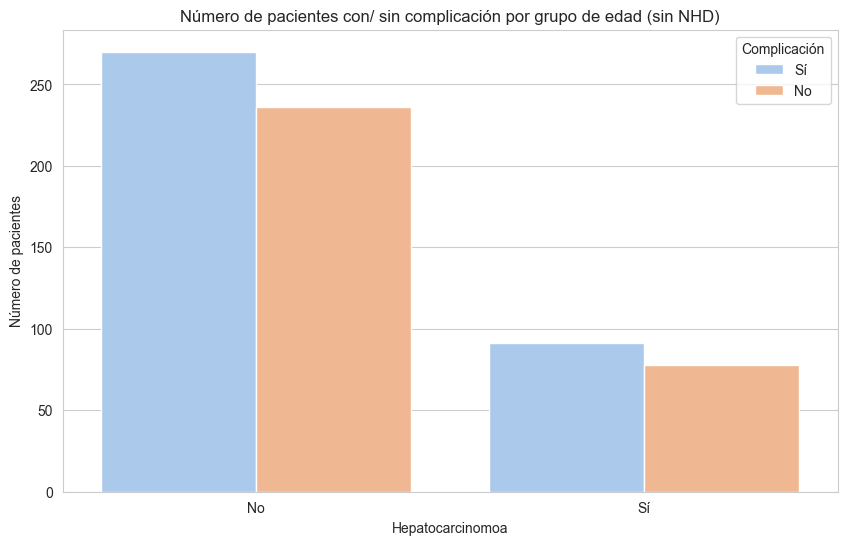

In [231]:
hepatocarcinoma_nom = df['Hepatocarcinoma'].replace({0: "No", 1: "Sí"})
complicaciones2 = df['¿Complicación?'].replace({0: "No", 1: "Sí"})
mask = complicaciones2.notna()

plt.figure(figsize=(10,6))
sns.countplot(
    data=df.loc[mask],
    x=hepatocarcinoma_nom[mask],
    hue=complicaciones1[mask],  # Sí / No
    palette="pastel"
)

plt.title("Número de pacientes con/ sin complicación por grupo de edad (sin NHD)")
plt.xlabel("Hepatocarcinomoa")
plt.ylabel("Número de pacientes")
plt.legend(title="Complicación")
plt.show()

# Conclusiones

A pesar de que las variables Trombosis_Porta_Tumoral, Tuvo_Inmunosupresión_con_Anticuerpos, αFP_Al_Dx, Grado_HCC y Estadio no presentaron relevancia estadisticamente significativa, cabe aclarar que esto no implica que la relación no sea real. 

Se resalta que variables como Grado_HCC y Estadio presentan una tendencia significatica al presentar mayor proporción de complicaciones conforme aumenta su grado. 

Se plantea continuar con un analisis multivariado que permita identificar combinaciones de factores que puedan influir en las complicaciones, con eso se podrá tratar el efecto aislado que presentamos aqui de cada variable

* En el caso de la variable "Soporte Vasopresor PeriTx", se observa una relación estadística con nuestra variable objetivo "Complicaciones". Además, en el gráfico de barras se puede apreciar que hay una mayor cantidad de casos de complicaciones cuando se requirió soporte vasopresor postoperatorio.
* En el caso de la variable "Levosimendan_PeriTx" (uso perioperatorio de levosimendan), se observa una mayor cantidad de casos en los que no se requirió soporte con levosimendan, aunque también existe una buena cantidad de complicaciones cuando no se utilizó. Por otro lado, en los casos en que fue necesario su uso, se registraron más complicaciones. Ademas, por los pocos casos que se uso la tecnica, se implemento la prueba de fisher sin embargo no es un dato confiable por la poca cantidad de paciente, que puede generar sesgos.
* En el caso de la variable "Noradrenalina_PeriTx" , se observa una mayor cantidad de casos de complicaciones cuando se requirió soporte con noradrenalina, y esta variable presenta una relación estadística con la variable objetivo.
* En el caso de la variable "Adrenalina_PeriTx" (uso perioperatorio de adrenalina), se observa una mayor cantidad de casos en los que no se utilizó. Sin embargo, en los casos en que sí se usó, hay una mayor cantidad de complicaciones, y esta variable presenta una relación estadística con la variable objetivo.

Además, en todas las demás variables se observa un patrón similar, excepto en "Profilaxis Antitrombótica", donde hay una mayor cantidad de casos en los que sí se utilizó profilaxis antitrombótica. No obstante, también se registran casos de complicaciones en este grupo, y lo interesante es que el grupo con complicaciones es considerablemente alto.
* En el caso de la variable "Número de Complicaciones", se observa que cuando hay 2 complicaciones, existe una mayor cantidad de casos de complicaciones, y esta variable presenta una relación estadística con la variable objetivo

Todas las variables "Tiempo_CVC", "Días_de_Profilaxis_Antitrombótica", "Días_En_UCI", "Días_En_Hospitalización_Piso" y "Días_Totales_Intrahospitalarios" presentan una diferencia estadísticamente significativa entre grupos, y los datos son más variables e impredecibles en pacientes con complicaciones.